# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Hilmi Gema Hidayatullah
- **Email:** great.hilmi@gmail.com
- **ID Dicoding:** hilmi_g

## Notes & Assumptions:

- Saya menggunakan air quality dataset yang telah diberikan (Sumber: https://github.com/marceloreis/HTI/tree/master).
- Setelah saya telusuri, air quality dataset tersebut merupakan hasil dari monitoring yang dilakukan di Kota Beijing, China, di berbagai lokasi. (Sumber: https://jovian.com/vincent-kizza/project-2-chinese-air-quality & https://www.kaggle.com/datasets/sid321axn/beijing-multisite-airquality-data-set).

## Menentukan Pertanyaan Bisnis

- Dimana 3 lokasi di Kota Beijing yang mengandung rata-rata AQI PM2.5 terburuk pada tahun 2015?
- Berapa besar perbedaan AQI PM2.5 antara lokasi dengan AQI tertinggi dengan lokasi dengan AQI terendah di kota Beijing pada tahun 2015?
- Bulan kapan terjadi AQI PM2.5 tertinggi di kota Beijing pada tahun 2015?
- Apa rata-rata status kualitas udara di Kota Beijing?

## Import Semua Packages/Library yang Digunakan

Pertama, install seluruh package yang dibutuhkan seperti berikut:

In [1]:
pip install geopandas matplotlib shapely contextily

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Setelah berhasil melakukan install, import semua package yang dibutuhkan untuk memulai program

In [2]:
import pandas as pd
import requests
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os
import geopandas as gpd
import shapely
import contextily as ctx
import numpy as np
import matplotlib.dates as mdates


from shapely.geometry import Point
from io import StringIO

## Data Wrangling

### Gathering Data

Setelah persiapan selesai, masuk ke tahapan data wrangling. Awal dari tahapan ini adalah 'Gathering Data'. Sesuai dengan namanya, tahapan ini dilakukan untuk mengambil data yang ingin diolah. Saya memilih air quality dataset untuk menganalisis kualitas udara. Awalnya dengan mengambil data dari github reference dan memasukkannya ke 'dataframes' dictionary.

In [3]:
# List of CSV files you want to load
file_names = [
    "PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "PRSA_Data_Dingling_20130301-20170228.csv",
    "PRSA_Data_Dongsi_20130301-20170228.csv",
    "PRSA_Data_Guanyuan_20130301-20170228.csv",
    "PRSA_Data_Gucheng_20130301-20170228.csv",
    "PRSA_Data_Huairou_20130301-20170228.csv",
    "PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "PRSA_Data_Shunyi_20130301-20170228.csv",
    "PRSA_Data_Tiantan_20130301-20170228.csv",
    "PRSA_Data_Wanliu_20130301-20170228.csv",
    "PRSA_Data_Wanshouxigong_20130301-20170228.csv"
]

# Base URL for the repository
base_url = "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/"

# Directory to save the CSV files
output_directory = 'raw_data'

# Create the directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Dictionary to store dataframes
dataframes = {}

# Loop through the file names and load each into a dataframe
for file_name in file_names:
    # Construct the full URL
    url = base_url + file_name

    # Fetch the data
    response = requests.get(url)

    # Extract the location name from the file name, ex: Dingling, Dongsi, etc.
    location_name = file_name.split('_')[2]

    # Load the data into a dataframe
    df = pd.read_csv(StringIO(response.text))

    # Store the dataframe in the dictionary
    dataframes[location_name] = df

    # Save the dataframe to a CSV file in the specified directory
    output_file_path = os.path.join(output_directory, f"{location_name}.csv")
    df.to_csv(output_file_path, index=False)

Setelah selesai dimasukkan, saya cek isi dari masing-masing dataframenya menggunakan function head seperti berikut:

In [4]:
# Loop through the dataframes and display the first few rows for each
for location, df in dataframes.items():
    print(f"Dataframe for {location}:")
    display(df.head())
    print("\n")

Dataframe for Aotizhongxin:


No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin



Dataframe for Dingling:


No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling



Dataframe for Dongsi:


No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi



Dataframe for Guanyuan:


No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4  1025.2 -19.5   0.0    N   2.0  Guanyuan



Dataframe for Gucheng:


No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng



Dataframe for Huairou:


No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
1   2  2013      3    1     1    4.0   4.0  3.0  NaN  100.0  92.0  -2.7   
2   3  2013      3    1     2    4.0   4.0  NaN  NaN  100.0  91.0  -3.2   
3   4  2013      3    1     3    3.0   3.0  3.0  2.0    NaN   NaN  -3.3   
4   5  2013      3    1     4    3.0   3.0  7.0  NaN  300.0  86.0  -4.1   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1  1020.8 -20.5   0.0  NNW   1.5  Huairou  
2  1020.6 -21.4   0.0   NW   1.8  Huairou  
3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
4  1022.1 -22.7   0.0  NNW   2.2  Huairou



Dataframe for Nongzhanguan:


No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan  
1  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  
2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan  
3  1026.2 -25.5   0.0    N   4.9  Nongzhanguan  
4  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan



Dataframe for Shunyi:


No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi



Dataframe for Tiantan:


No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3  1026.2 -25.5   0.0    N   4.9  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan



Dataframe for Wanliu:


No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4  1025.2 -19.5   0.0    N   2.0  Wanliu



Dataframe for Wanshouxigong:


No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong

### Assessing Data

Setelah data berhasil di-load, data akan dilihat dan di-assess terlebih dahulu pada tahapan 'Assessing Data'. Salah satu functionnya adalah info() seperti berikut:

In [5]:
# Loop through the dataframes and display the first few rows for each
for location, df in dataframes.items():
    print(f"Dataframe Info for {location}:")
    display(df.info())
    print("\n")

Dataframe Info for Aotizhongxin:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None



Dataframe Info for Dingling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None



Dataframe Info for Dongsi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None



Dataframe Info for Guanyuan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None



Dataframe Info for Gucheng:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None



Dataframe Info for Huairou:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None



Dataframe Info for Nongzhanguan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None



Dataframe Info for Shunyi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None



Dataframe Info for Tiantan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None



Dataframe Info for Wanliu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None



Dataframe Info for Wanshouxigong:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None

Terlihat bahwa setiap dataframe memiliki 17 column dengan berbagai jenis valuenya seperti float, int, dll. Row-nya juga terlihat banyak, yaitu sebanyak 35064 entry. Jika dilihat lebih jauh, terlihat bahwa terdapat beberapa row yang memilki non-null count yang kurang dari jumlah seluruh entry. Ini berarti ada beberapa row yang mempunyai null yang harus diselesaikan pada tahap-tahapan selanjutnya.

Untuk mengecek null, terdapat function yang dapat digunakan, yaitu isna() dengan tambahan .sum() untuk menjumlahkan semua hasil 'True' pada pengecekan isna(). Berikut adalah hasilnya:

In [6]:
# Loop through the dataframes and display the first few rows for each
for location, df in dataframes.items():
    print(f"Dataframe Null Info for {location}:")
    display(df.isna().sum())
    print("\n")

Dataframe Null Info for Aotizhongxin:


No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64



Dataframe Null Info for Dingling:


No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64



Dataframe Null Info for Dongsi:


No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64



Dataframe Null Info for Guanyuan:


No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64



Dataframe Null Info for Gucheng:


No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64



Dataframe Null Info for Huairou:


No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64



Dataframe Null Info for Nongzhanguan:


No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64



Dataframe Null Info for Shunyi:


No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64



Dataframe Null Info for Tiantan:


No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64



Dataframe Null Info for Wanliu:


No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64



Dataframe Null Info for Wanshouxigong:


No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

Terlihat dari hasil, secara konsisten, ada beberapa beberapa kolom yang memiliki nilai null, yaitu PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM. Kolom ini perlu dicatat karena akan dilakukan proses pada tahapan selanjutnya.

Selain null, saya juga mengecek dataframe tersebut dari kemungkinan adanya duplicate dengan function duplicated() ditambah .sum() seperti berikut:

In [7]:
# Loop through the dataframes and display the first few rows for each
for location, df in dataframes.items():
    print(f"Dataframe Data Duplicate Count for {location}:")
    display(df.duplicated().sum())
    print("\n")

Dataframe Data Duplicate Count for Aotizhongxin:


0



Dataframe Data Duplicate Count for Dingling:


0



Dataframe Data Duplicate Count for Dongsi:


0



Dataframe Data Duplicate Count for Guanyuan:


0



Dataframe Data Duplicate Count for Gucheng:


0



Dataframe Data Duplicate Count for Huairou:


0



Dataframe Data Duplicate Count for Nongzhanguan:


0



Dataframe Data Duplicate Count for Shunyi:


0



Dataframe Data Duplicate Count for Tiantan:


0



Dataframe Data Duplicate Count for Wanliu:


0



Dataframe Data Duplicate Count for Wanshouxigong:


0

Ternyata hasilnya 0 di semua dataframe yang berarti tidak ada duplikat

Kemudian, saya juga akan melakukan asesmen pada data dengan pendekatan statistika menggunakan function describe(). Berikut adalah hasilnya:

In [8]:
# Loop through the dataframes and display the first few rows for each
for location, df in dataframes.items():
    print(f"Dataframe Statistics for {location}:")
    display(df.describe())
    print("\n")

Dataframe Statistics for Aotizhongxin:


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     22.823017     37.116200   1221.436236   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    155.000000     21.000000     82.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33345.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      56.353358     13.584607   1011.846920      3.123062      0.067421   
std       57.916327     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        8.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       42.000000     14.500000   1011.400000      3.800000      0.000000   
75%       82.000000     23.300000   1020.100000     15.600000      0.000000   
max      423.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000



Dataframe Statistics for Dingling:


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34285.000000  34408.000000  34334.000000  33830.000000  33052.000000   
mean      65.989497     83.739723     11.749650     27.585467    904.896073   
std       72.267723     79.541685     15.519259     26.383882    903.306220   
min        3.000000      2.000000      0.285600      1.026500    100.000000   
25%       14.000000     26.000000      2.000000      9.000000    300.000000   
50%       41.000000     60.000000      5.000000     19.000000    600.000000   
75%       93.000000    117.000000     15.000000     38.000000   1200.000000   
max      881.000000    905.000000    156.000000    205.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33850.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      68.548371     13.686111   1007.760278      1.505495      0.060366   
std       53.764424     11.365313     10.225664     13.822099      0.752899   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       31.000000      3.400000    999.300000    -10.200000      0.000000   
50%       61.000000     14.700000   1007.400000      1.800000      0.000000   
75%       90.000000     23.300000   1016.000000     14.200000      0.000000   
max      500.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35021.000000  
mean       1.853836  
std        1.309808  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000



Dataframe Statistics for Dongsi:


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34314.000000  34511.000000  34401.000000  33463.000000  31867.000000   
mean      86.194297    110.336742     18.531107     53.699443   1330.069131   
std       86.575127     98.219860     22.905655     33.959230   1191.305887   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      4.000000     27.000000    600.000000   
50%       61.000000     86.000000     10.000000     47.000000   1000.000000   
75%      119.000000    151.000000     24.000000     73.000000   1700.000000   
max      737.000000    955.000000    300.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34400.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      57.210637     13.671490   1012.547419      2.447535      0.064020   
std       58.033275     11.458418     10.266059     13.810696      0.786282   
min        0.642600    -16.800000    987.100000    -35.300000      0.000000   
25%       12.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       44.125200     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max     1071.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000



Dataframe Statistics for Guanyuan:


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34448.000000  34635.000000  34590.000000  34405.000000  33311.000000   
mean      82.933372    109.023303     17.590941     57.901643   1271.294377   
std       80.933497     91.573709     23.600367     35.150857   1164.854945   
min        2.000000      2.000000      1.000000      2.000000    100.000000   
25%       23.000000     40.000000      3.000000     31.000000    500.000000   
50%       59.000000     89.000000      8.000000     51.000000    900.000000   
75%      115.000000    149.000000     22.000000     78.000000   1600.000000   
max      680.000000    999.000000    293.000000    270.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33891.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      55.795044     13.584607   1011.846920      3.123062      0.067421   
std       57.436983     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        7.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       41.000000     14.500000   1011.400000      3.800000      0.000000   
75%       81.000000     23.300000   1020.100000     15.600000      0.000000   
max      415.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000



Dataframe Statistics for Gucheng:


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34418.000000  34683.000000  34557.000000  34396.000000  33663.000000   
mean      83.852089    118.861978     15.366162     55.871075   1323.974423   
std       82.796445     96.742626     21.204526     36.473860   1208.957772   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       24.000000     45.000000      2.000000     26.000000    600.000000   
50%       60.000000     99.000000      7.000000     50.000000    900.000000   
75%      115.750000    167.000000     20.000000     79.000000   1600.000000   
max      770.000000    994.000000    500.000000    276.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34335.000000  35013.000000  35014.000000  35013.000000  35021.000000   
mean      57.694879     13.864524   1008.829592      2.610442      0.064453   
std       57.019587     11.292857     10.103256     13.782991      0.838654   
min        0.214200    -15.600000    984.000000    -34.600000      0.000000   
25%       10.000000      3.600000   1000.500000     -8.900000      0.000000   
50%       45.000000     14.800000   1008.500000      3.000000      0.000000   
75%       83.000000     23.500000   1017.000000     15.300000      0.000000   
max      450.000000     41.600000   1038.100000     27.400000     41.900000   

               WSPM  
count  35022.000000  
mean       1.343310  
std        1.151064  
min        0.000000  
25%        0.600000  
50%        1.000000  
75%        1.800000  
max       12.000000



Dataframe Statistics for Huairou:


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34111.000000  34287.000000  34084.000000  33425.000000  33642.000000   
mean      69.626367     91.482690     12.121553     32.497250   1022.554545   
std       71.224916     83.289578     18.896912     26.489531    898.738241   
min        2.000000      2.000000      0.285600      1.026500    100.000000   
25%       17.000000     28.000000      2.000000     12.000000    400.000000   
50%       47.000000     69.000000      4.000000     25.000000    800.000000   
75%       98.000000    131.000000     14.000000     46.000000   1300.000000   
max      762.000000    993.000000    315.000000    231.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33913.000000  35013.000000  35011.000000  35011.000000  35009.000000   
mean      59.824713     12.445426   1007.598568      2.238619      0.067940   
std       54.605746     11.751103     10.022101     14.052541      0.849046   
min        0.214200    -19.900000    982.800000    -43.400000      0.000000   
25%       18.000000      2.100000    999.300000     -9.600000      0.000000   
50%       49.000000     13.600000   1007.300000      2.700000      0.000000   
75%       83.000000     22.300000   1015.500000     15.300000      0.000000   
max      444.000000     40.300000   1036.500000     29.100000     45.900000   

               WSPM  
count  35015.000000  
mean       1.652021  
std        1.199143  
min        0.000000  
25%        0.900000  
50%        1.300000  
75%        2.000000  
max       12.900000



Dataframe Statistics for Nongzhanguan:


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34436.000000  34624.000000  34618.000000  34372.000000  33858.000000   
mean      84.838483    108.991096     18.689242     58.097172   1324.350198   
std       86.225344     95.341177     24.280665     36.297740   1245.166124   
min        2.000000      2.000000      0.571200      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     29.000000    500.000000   
50%       59.000000     85.000000      9.000000     51.000000    900.000000   
75%      116.000000    149.000000     23.000000     80.000000   1600.000000   
max      844.000000    995.000000    257.000000    273.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34558.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      58.534682     13.671490   1012.547419      2.447535      0.064020   
std       58.401448     11.458418     10.266059     13.810696      0.786282   
min        0.214200    -16.800000    987.100000    -35.300000      0.000000   
25%       10.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       45.000000     14.600000   1012.200000      3.000000      0.000000   
75%       84.000000     23.500000   1020.900000     15.000000      0.000000   
max      390.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000



Dataframe Statistics for Shunyi:


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34151.000000  34516.000000  33768.000000  33699.000000  32886.000000   
mean      79.491602     98.737026     13.572039     43.908865   1187.063979   
std       81.231739     89.143718     19.572068     30.996828   1156.374102   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       19.000000     31.000000      2.000000     19.000000    400.000000   
50%       55.000000     77.000000      5.000000     37.000000    800.000000   
75%      112.000000    138.000000     17.000000     62.000000   1500.000000   
max      941.000000    999.000000    239.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33575.000000  35013.000000  35013.000000  35010.000000  35013.000000   
mean      55.201321     13.387969   1013.061938      2.465036      0.061094   
std       54.873726     11.483588     10.177339     13.726622      0.761668   
min        0.214200    -16.800000    988.000000    -36.000000      0.000000   
25%       10.000000      3.000000   1004.700000     -8.800000      0.000000   
50%       43.000000     14.400000   1012.700000      3.100000      0.000000   
75%       77.000000     23.200000   1021.000000     15.100000      0.000000   
max      351.716400     40.600000   1042.800000     27.500000     37.300000   

               WSPM  
count  35020.000000  
mean       1.807533  
std        1.287817  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       12.800000



Dataframe Statistics for Tiantan:


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34387.000000  34467.000000  33946.000000  34320.000000  33938.000000   
mean      82.164911    106.363672     14.367615     53.162646   1298.303318   
std       80.921384     89.700157     20.144631     31.946224   1170.593297   
min        3.000000      2.000000      0.571200      2.000000    100.000000   
25%       22.000000     41.000000      3.000000     28.000000    500.000000   
50%       59.000000     85.000000      7.000000     47.000000    900.000000   
75%      113.000000    144.000000     17.000000     71.000000   1600.000000   
max      821.000000    988.000000    273.000000    241.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34221.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      55.984297     13.671490   1012.547419      2.447535      0.064020   
std       59.081528     11.458418     10.266059     13.810696      0.786282   
min        0.428400    -16.800000    987.100000    -35.300000      0.000000   
25%        8.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       40.000000     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max      674.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000



Dataframe Statistics for Wanliu:


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34682.000000  34780.000000  34489.000000  33994.000000  33252.000000   
mean      83.374716    110.464618     18.376481     65.258789   1319.353513   
std       81.905568     92.795065     22.609648     37.996088   1268.114331   
min        2.000000      2.000000      0.285600      1.642400    100.000000   
25%       23.000000     40.000000      4.000000     36.000000    500.000000   
50%       59.000000     88.000000     10.000000     60.000000    900.000000   
75%      116.000000    153.000000     23.000000     88.000000   1600.000000   
max      957.000000    951.000000    282.000000    264.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  32957.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      48.873614     13.428865   1011.097536      3.266588      0.068263   
std       55.111740     11.346931     10.355247     13.678060      0.896726   
min        0.214200    -15.800000    985.900000    -34.900000      0.000000   
25%        4.000000      3.200000   1002.500000     -8.100000      0.000000   
50%       32.000000     14.300000   1010.800000      4.000000      0.000000   
75%       73.000000     22.900000   1019.400000     15.800000      0.000000   
max      364.000000     40.500000   1040.300000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.501215  
std        1.104472  
min        0.000000  
25%        0.800000  
50%        1.200000  
75%        2.000000  
max       11.200000



Dataframe Statistics for Wanshouxigong:


No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2          NO2            CO  \
count  34368.000000  34580.000000  34395.000000  34310.00000  33767.000000   
mean      85.024136    112.223459     17.148603     55.52956   1370.395031   
std       85.975981     97.593210     23.940834     35.80805   1223.139114   
min        3.000000      2.000000      0.285600      2.00000    100.000000   
25%       23.000000     39.000000      3.000000     28.00000    600.000000   
50%       60.000000     91.000000      8.000000     49.00000   1000.000000   
75%      116.000000    154.000000     21.000000     77.00000   1700.000000   
max      999.000000    961.000000    411.000000    251.00000   9800.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33986.000000  35045.000000  35045.000000  35045.000000  35045.000000   
mean      56.229904     13.784477   1011.511804      2.707442      0.064320   
std       57.082710     11.385156     10.570928     13.704139      0.796981   
min        0.214200    -16.800000    985.100000    -35.300000      0.000000   
25%        8.000000      3.400000   1002.800000     -8.500000      0.000000   
50%       42.000000     14.800000   1011.000000      3.300000      0.000000   
75%       82.000000     23.500000   1020.000000     15.200000      0.000000   
max      358.000000     40.600000   1042.000000     28.500000     46.400000   

               WSPM  
count  35051.000000  
mean       1.745314  
std        1.206355  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.300000  
max       13.200000

Setelah saya lihat, tidak ada kesalahan yang ada di data. Biasanya yang sering terjadi adalah masalah waktu atau penanggalan, tetapi terlihat bahwa year, month, dan day angkanya benar. Untuk value lain terlihat masih normal saja.

### Cleaning Data

Setelah data selesai ditinjau, saatnya melakukan 'cleaning' data. Cleaning data dilakukan agar data bersih dari masalah-masalah value yang dapat mengurangi efektivitas decision making pada hasil analisis.

Sebagai awalan, saya memilih untuk membuat plot histogram untuk melihat persebaran value dan apakah ada kecondongan pada data. Library yang digunakan adalah matplotlib seperti berikut:

In [9]:
def plot_histograms(df, location_name):
    fig, axs = plt.subplots(6, 2, figsize=(12, 10))
    fig.suptitle(f'Histograms for {location_name}', fontsize=16)

    # Flatten the axs array for easier iteration
    axs = axs.flatten()

    # Columns to plot
    Columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']

    # Create histograms
    for i, Column in enumerate(Columns):
        axs[i].hist(df[Column].dropna(), bins=50, alpha=0.7, color='blue', edgecolor='black')
        axs[i].set_title(f'Histogram of {Column}')
        axs[i].set_xlabel(Column)
        axs[i].set_ylabel('Frequency')
        axs[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout and display the plot
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

Setelah function berhasil dibuat, saatnya implementasi pada data yang sudah dibersihkan sebelumnya seperti berikut:

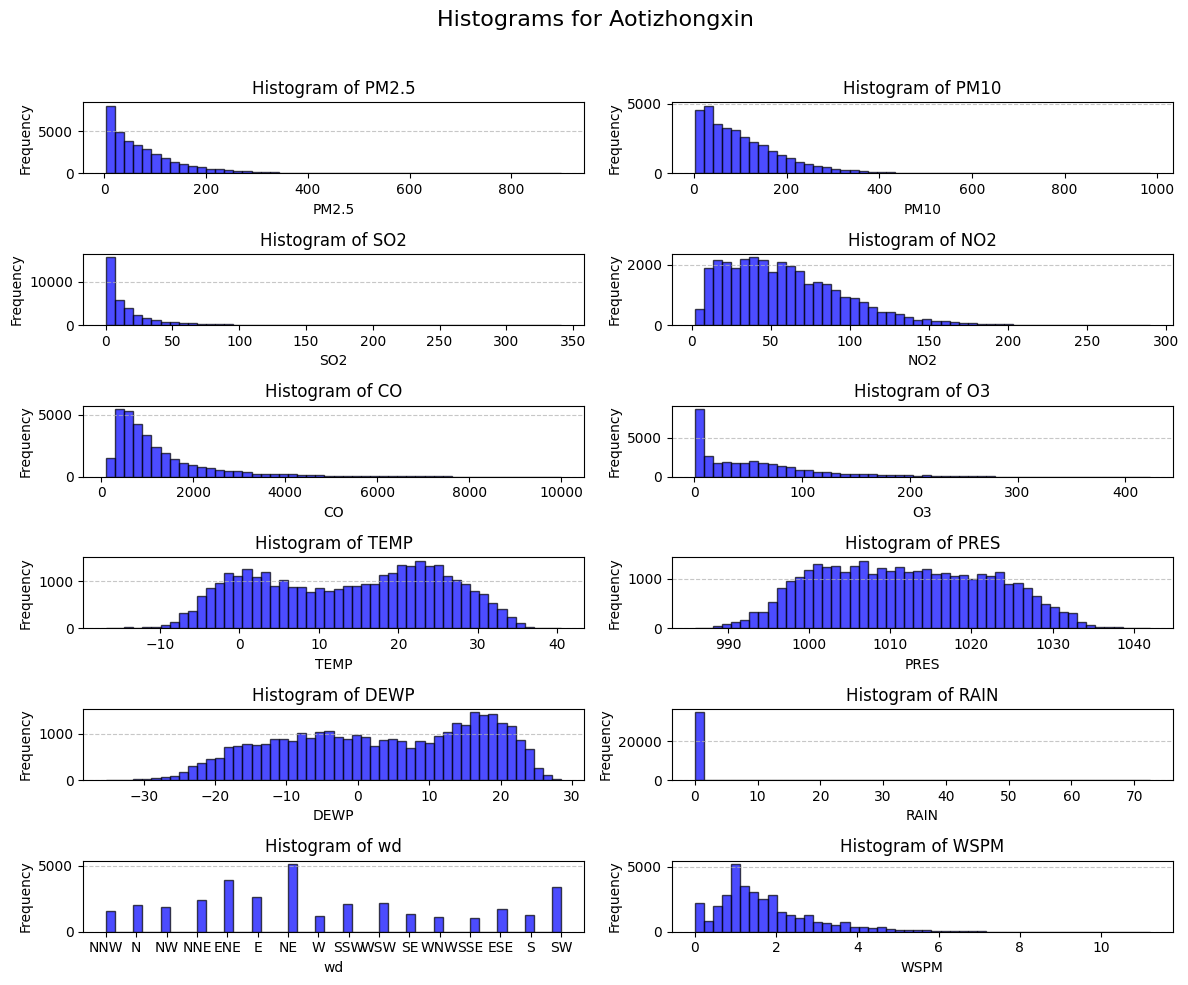

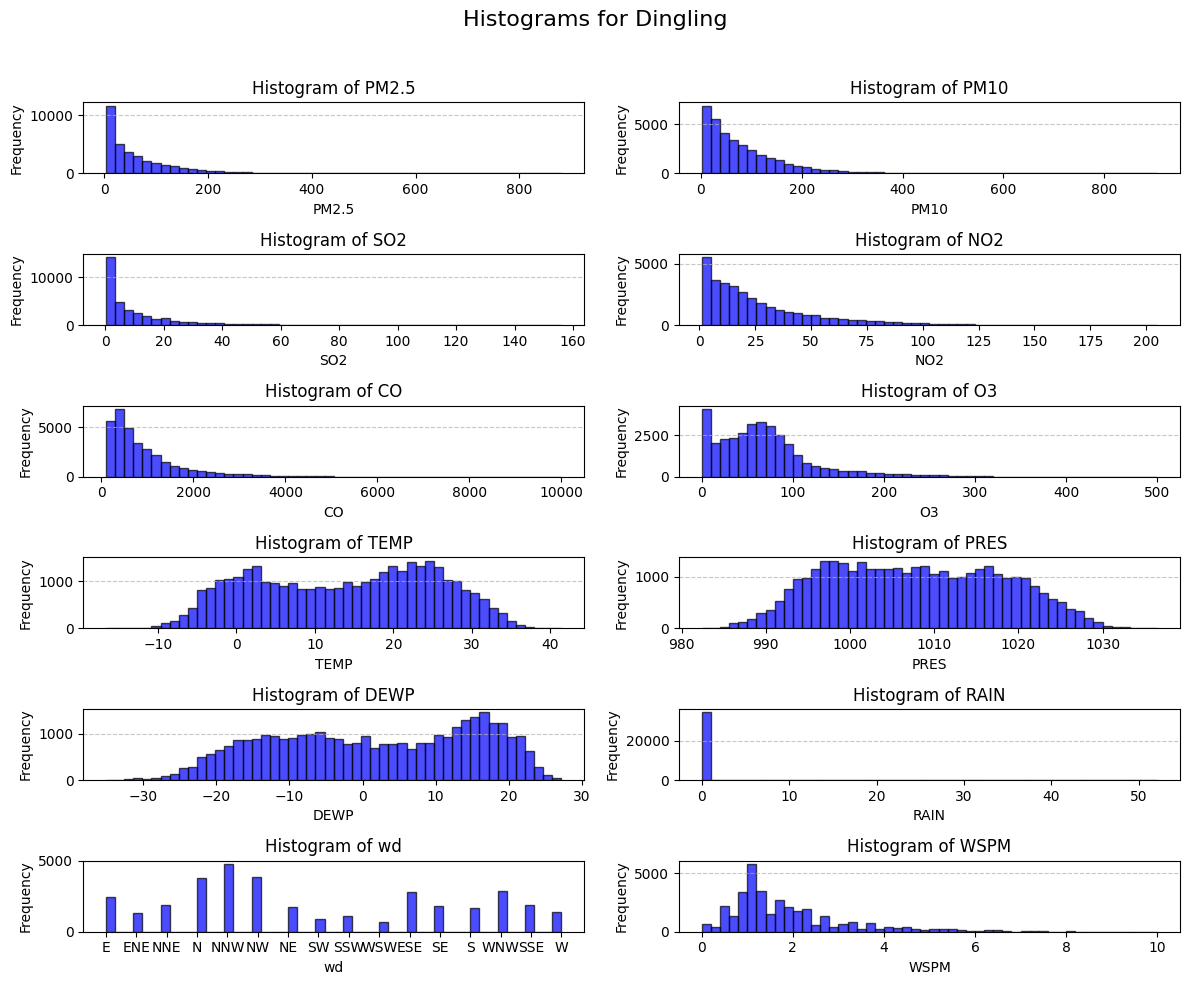

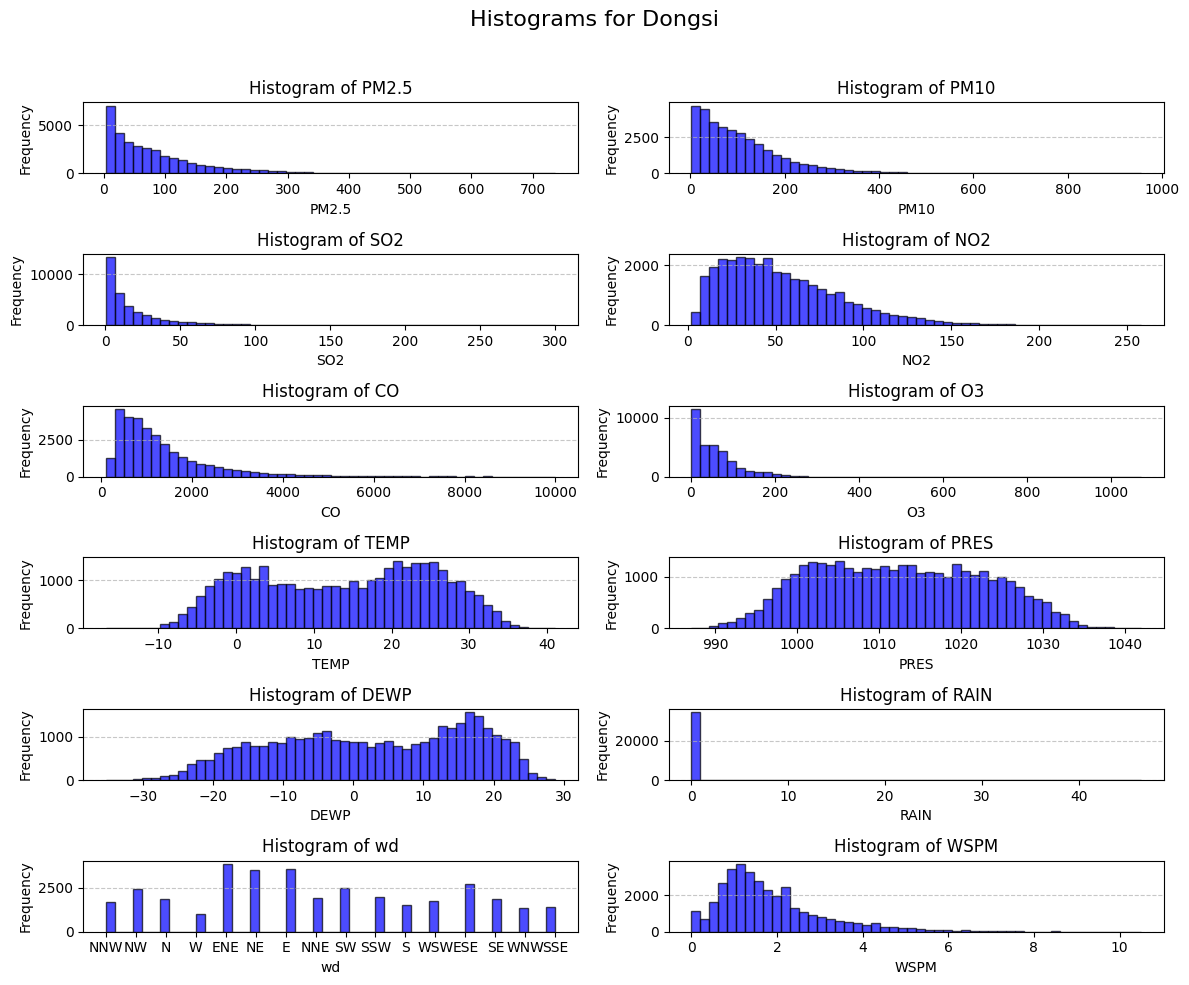

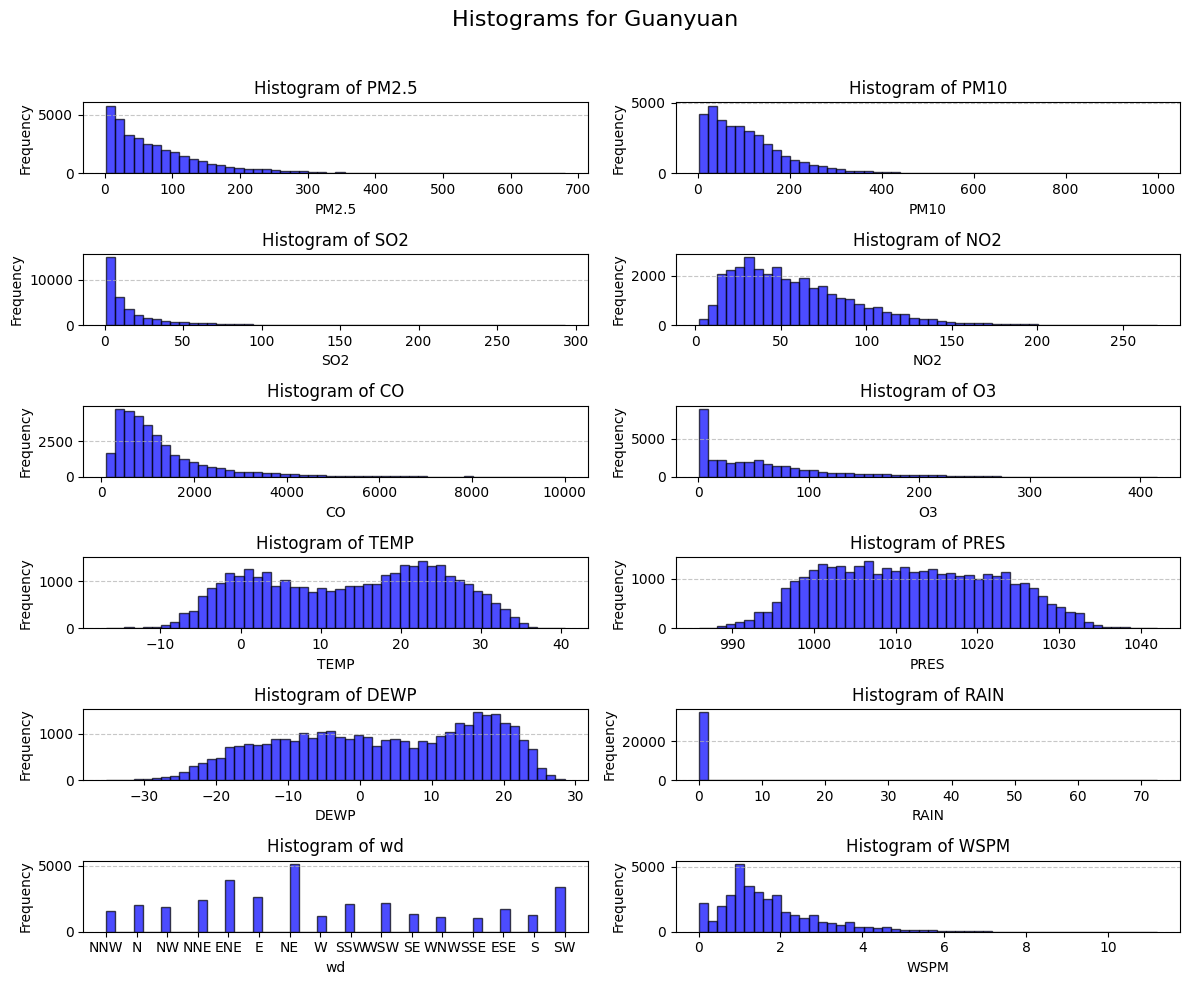

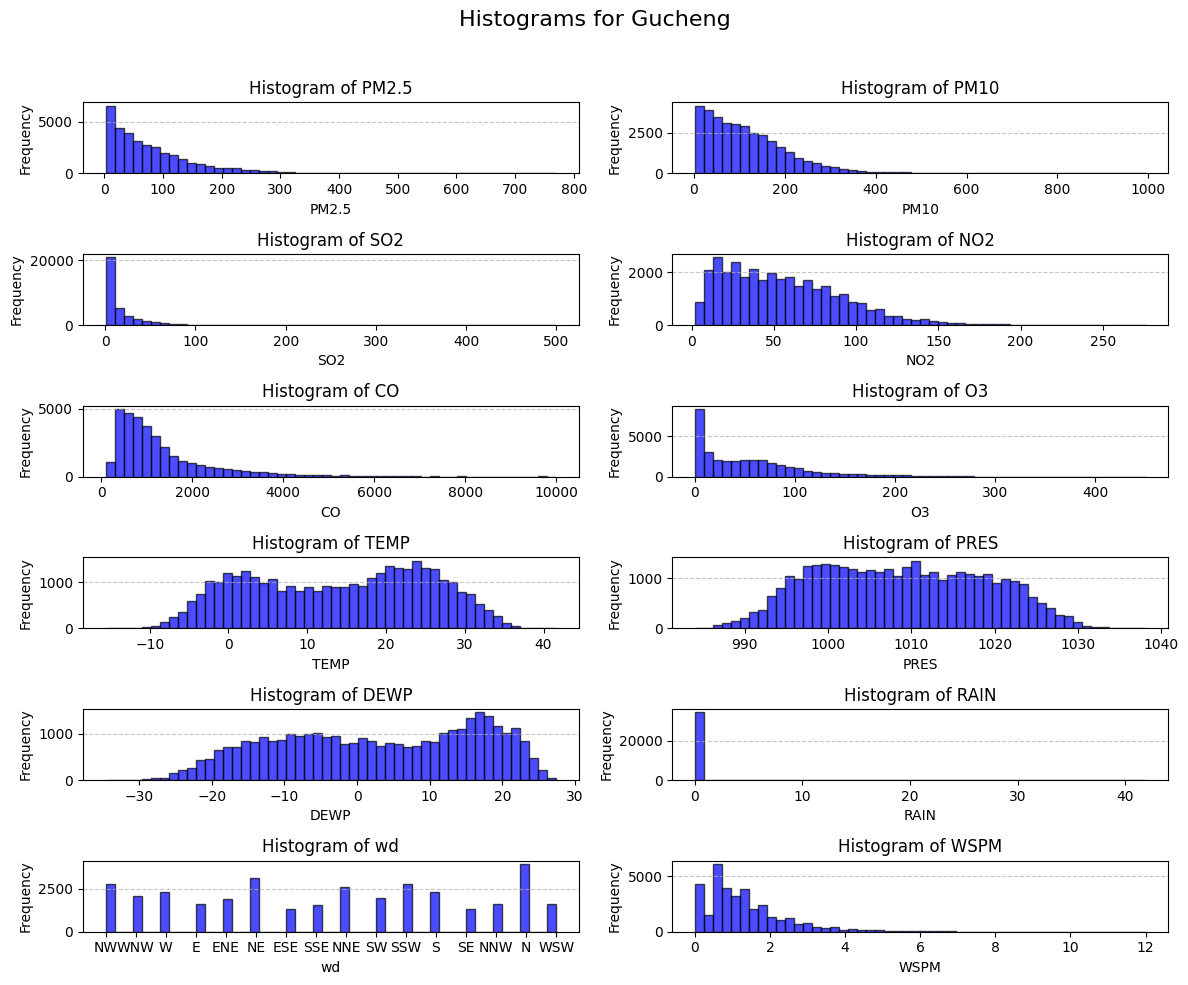

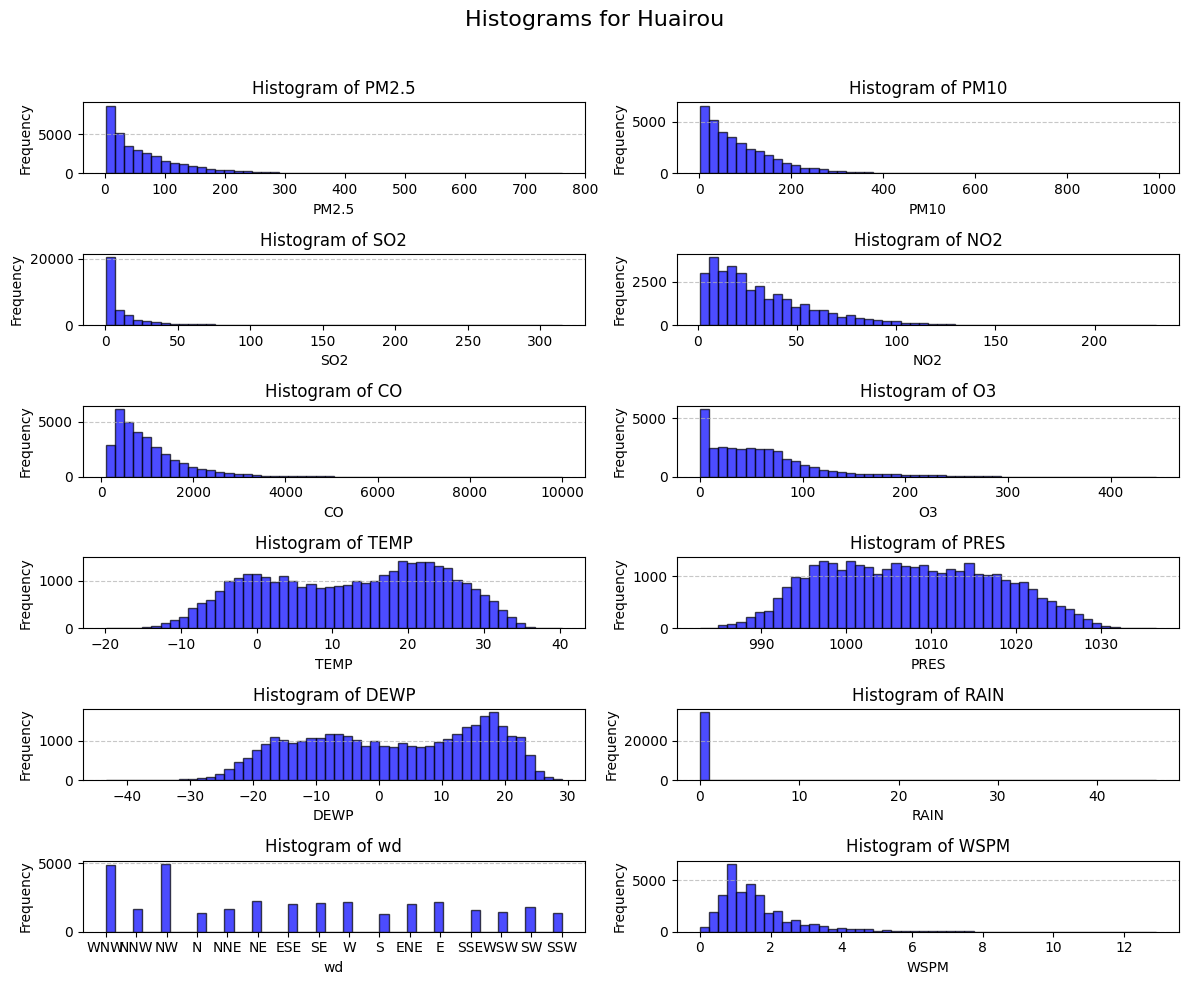

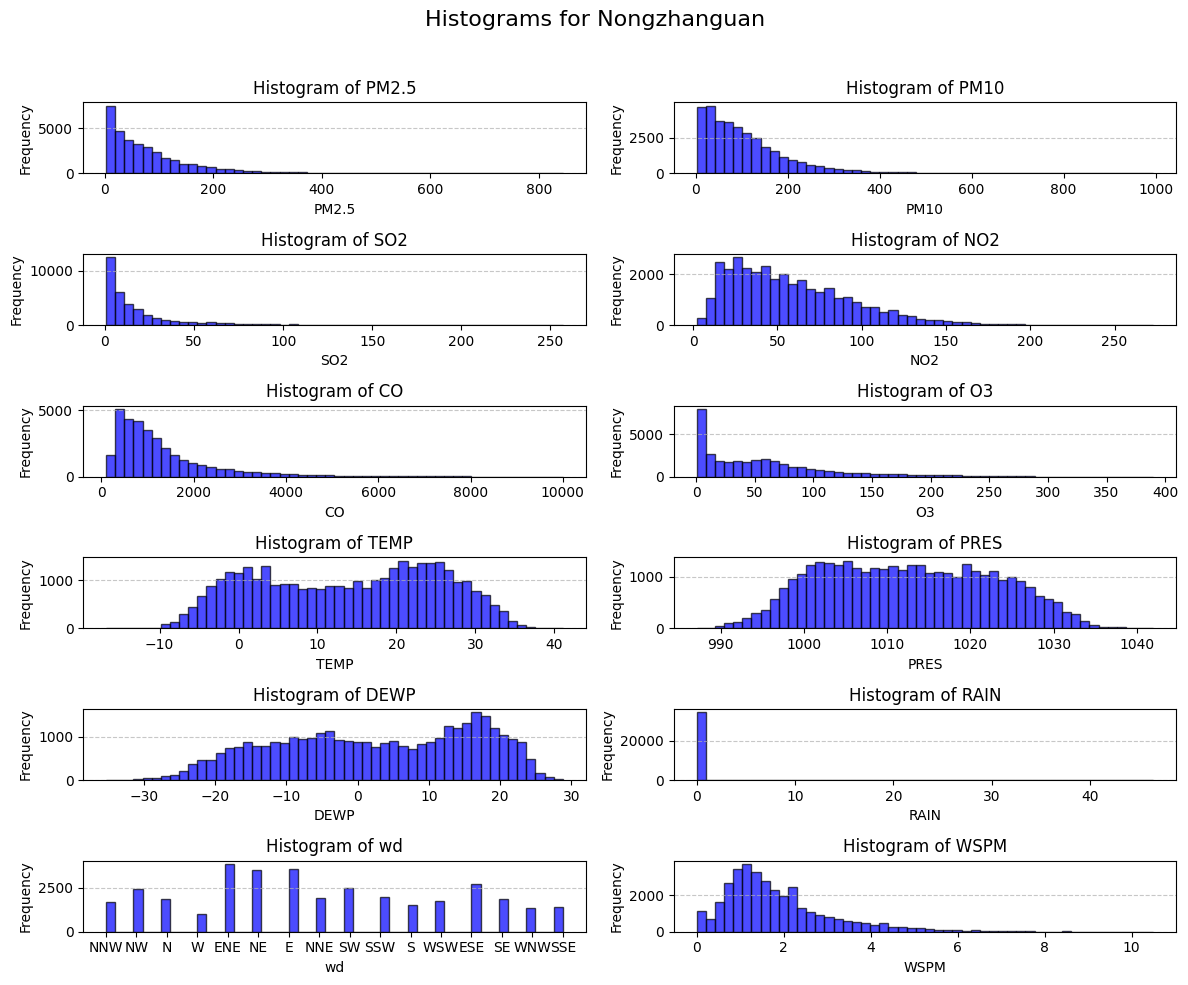

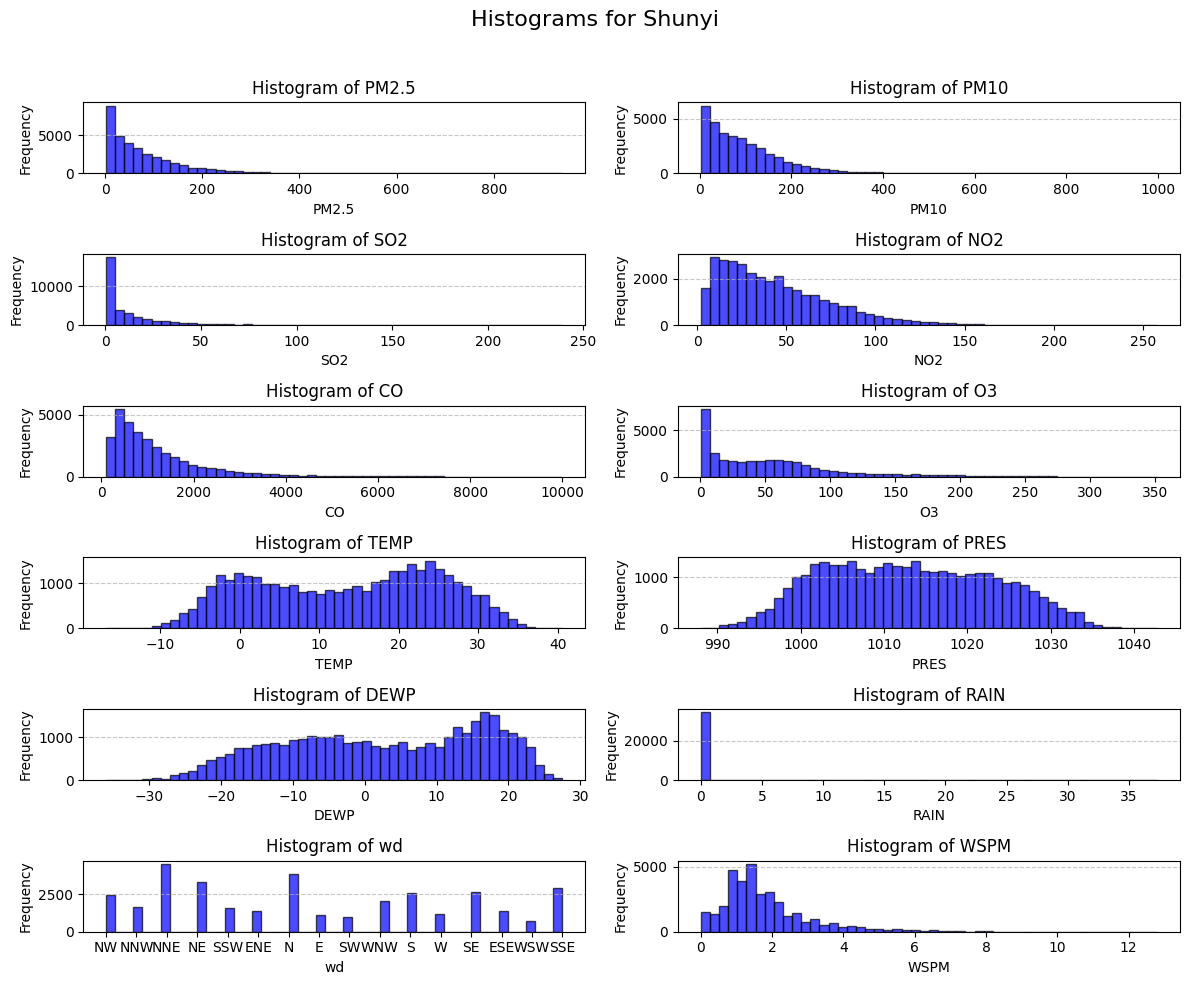

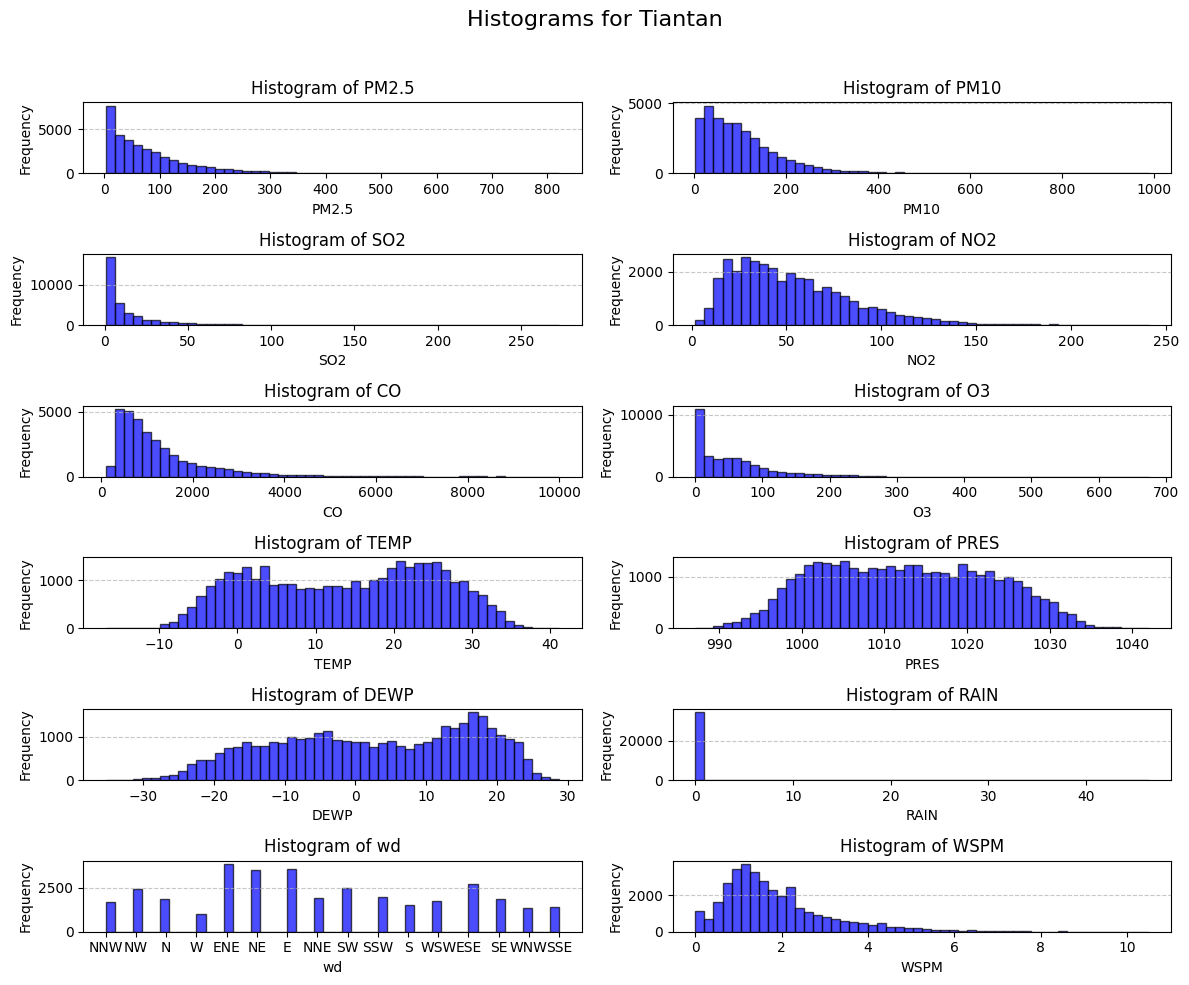

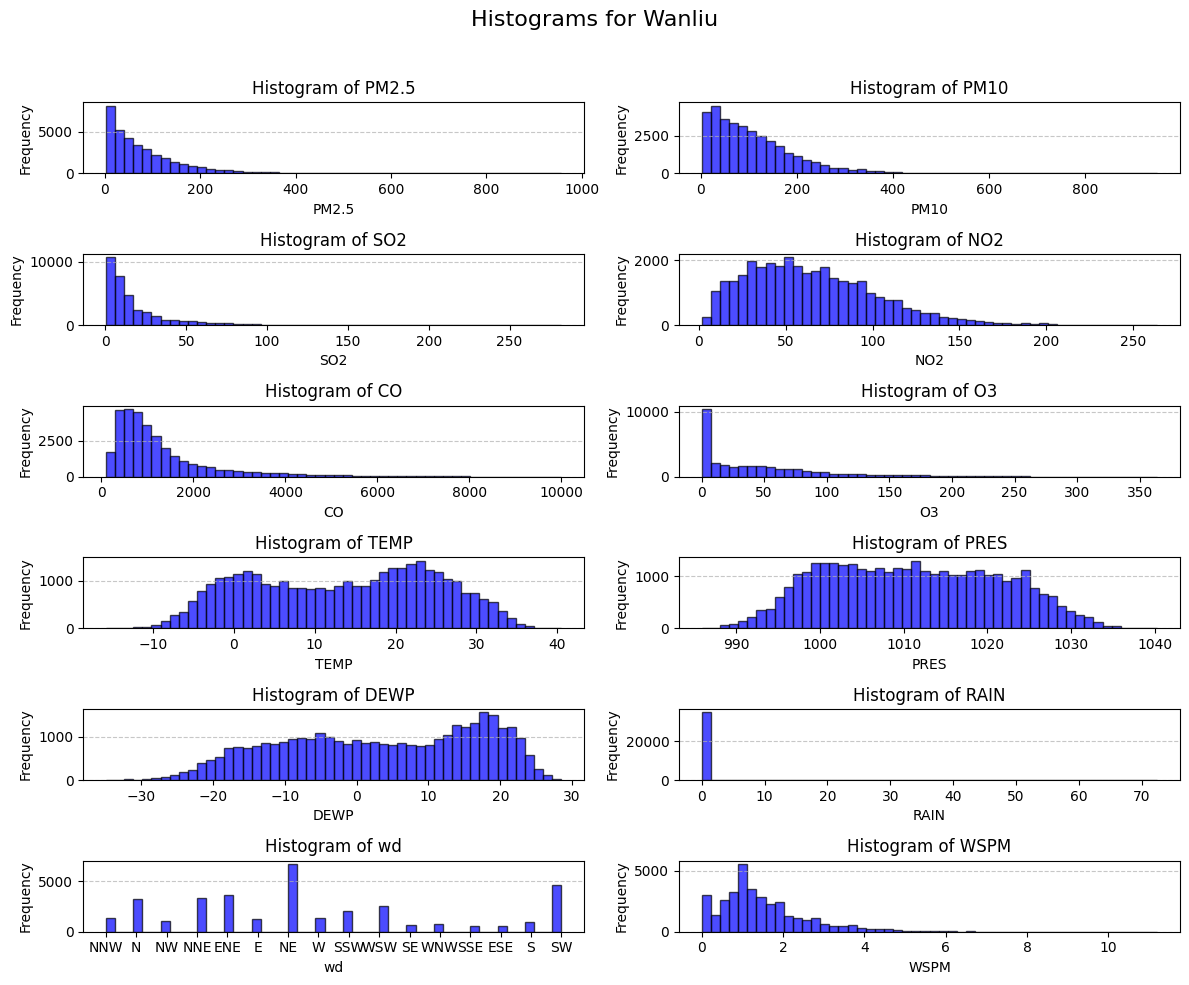

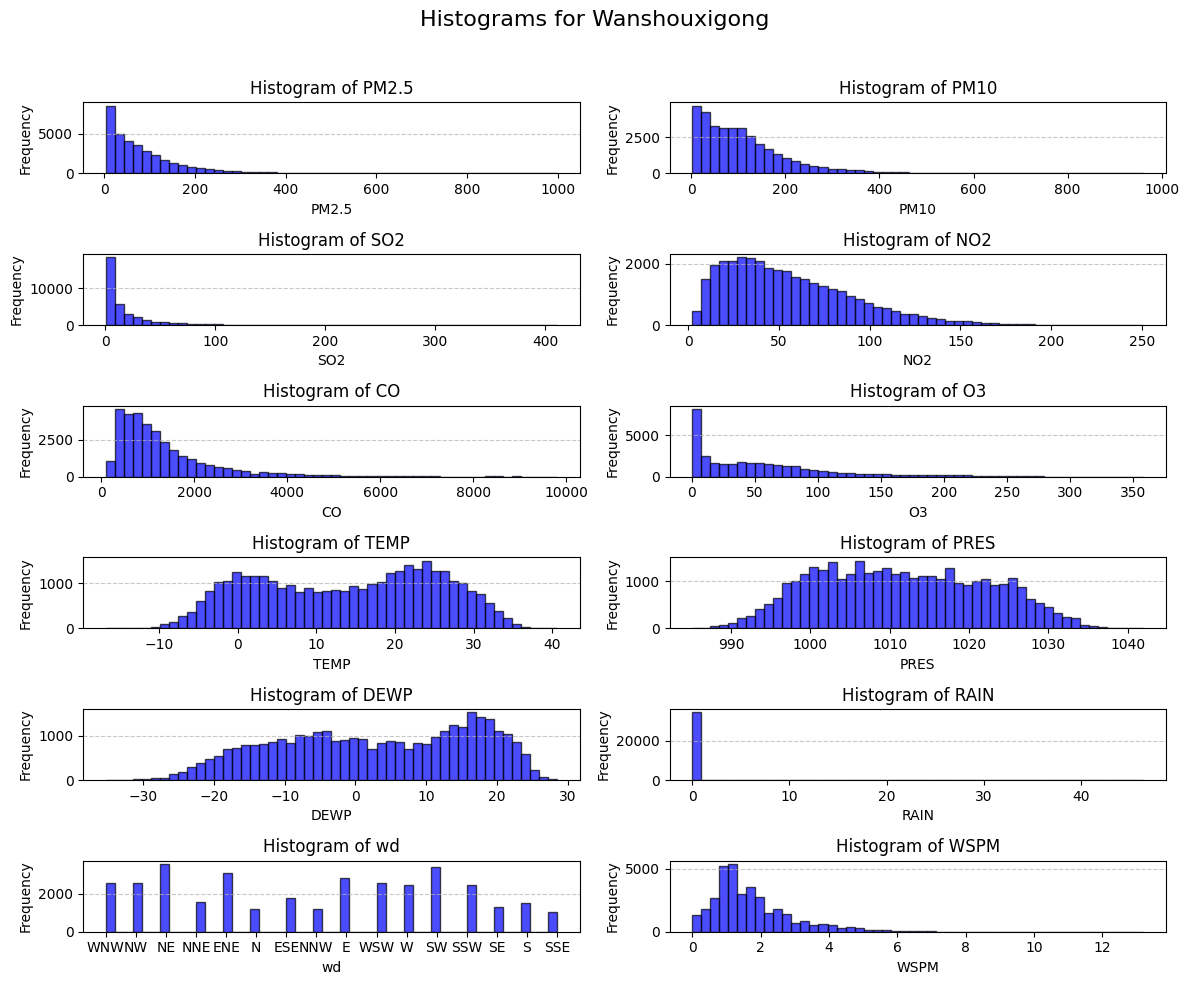

In [10]:
# Assuming dataframes is a dictionary with keys as location names and values as dataframes
for location_name, df in dataframes.items():
    plot_histograms(df, location_name)

Dari hasil histogram, terlihat ada beberapa poin yang dapat diambil:
- Value pada polutan udara (PM2.5, PM10, SO2, NO2, CO, dan O3) dan WSPM (Wind speed) cenderung miring/skewed ke arah kanan. Hal ini menunjukkan ada kemungkinan adanya outlier, terutama karena tail yang terlihat panjang.
- Value pada entitas/kondisi udara (Temp, PRES, dan DEWP) memiliki persebaran yang cukup normal sehingga aman untuk proses kedepannya.
- Value pada rain terlihat kumpul dengan persebaran yang kecil.
- Value pada wd (wind direction) adalah catagorical dan bukan numerical

Setelah melihat masing-masing, saatnya untuk melihat perbedaannya dengan pengelompokan berdasarkan kolom agar lebih mudah dicek. Berikut adalah functionnya:

In [11]:
def plot_histograms_grouped_by_pollutant(dataframes):
    # Columns to plot
    Columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']

    # Loop through each pollutant
    for Column in Columns:
        fig, axs = plt.subplots(4, 3, figsize=(15, 12))  # Adjust the grid size to accommodate all locations
        fig.suptitle(f'Histograms of {Column} Across Locations', fontsize=16)

        # Flatten the axs array for easier iteration
        axs = axs.flatten()

        # Loop through each location and plot the pollutant data
        for i, (location_name, df) in enumerate(dataframes.items()):
            axs[i].hist(df[Column].dropna(), bins=50, alpha=0.7, color='blue', edgecolor='black')
            axs[i].set_title(f'{location_name}')
            axs[i].set_xlabel(Column)
            axs[i].set_ylabel('Frequency')
            axs[i].grid(axis='y', linestyle='--', alpha=0.7)

        # Adjust layout and display the plot
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
        plt.show()

Setelah function selesai dibuat, saatnya implementasi pada data yang dipersiapkan sebelumnya seperti berikut:

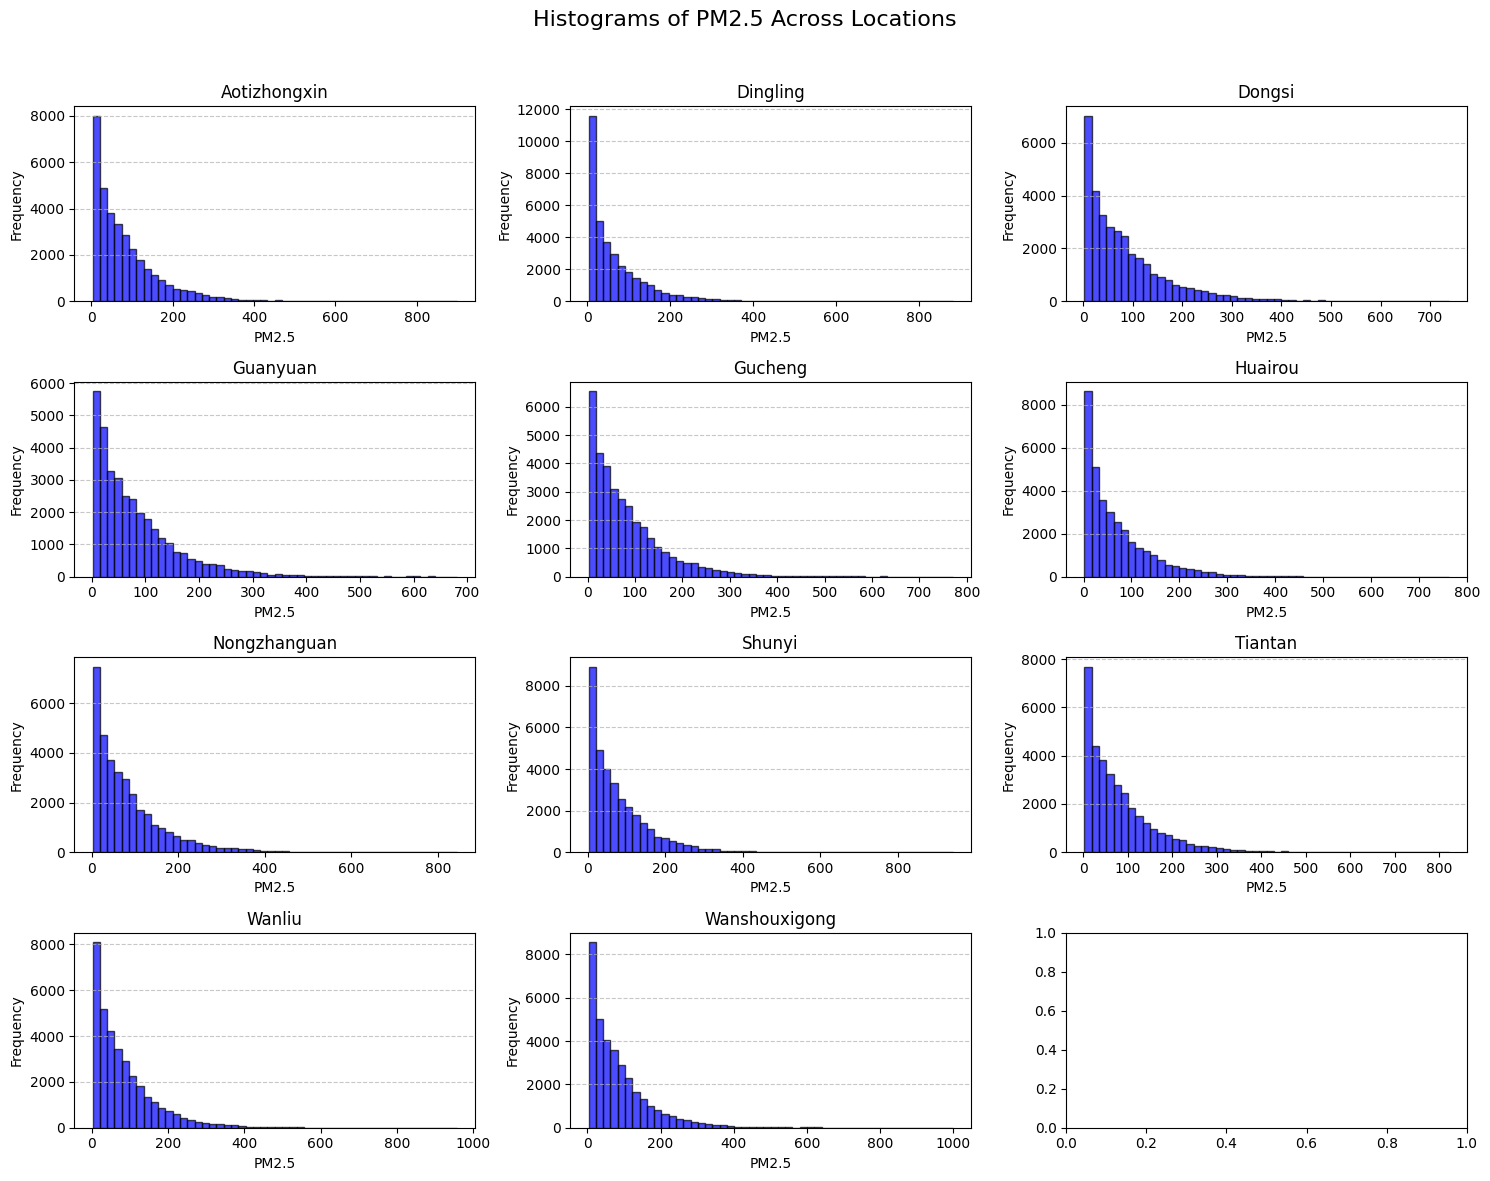

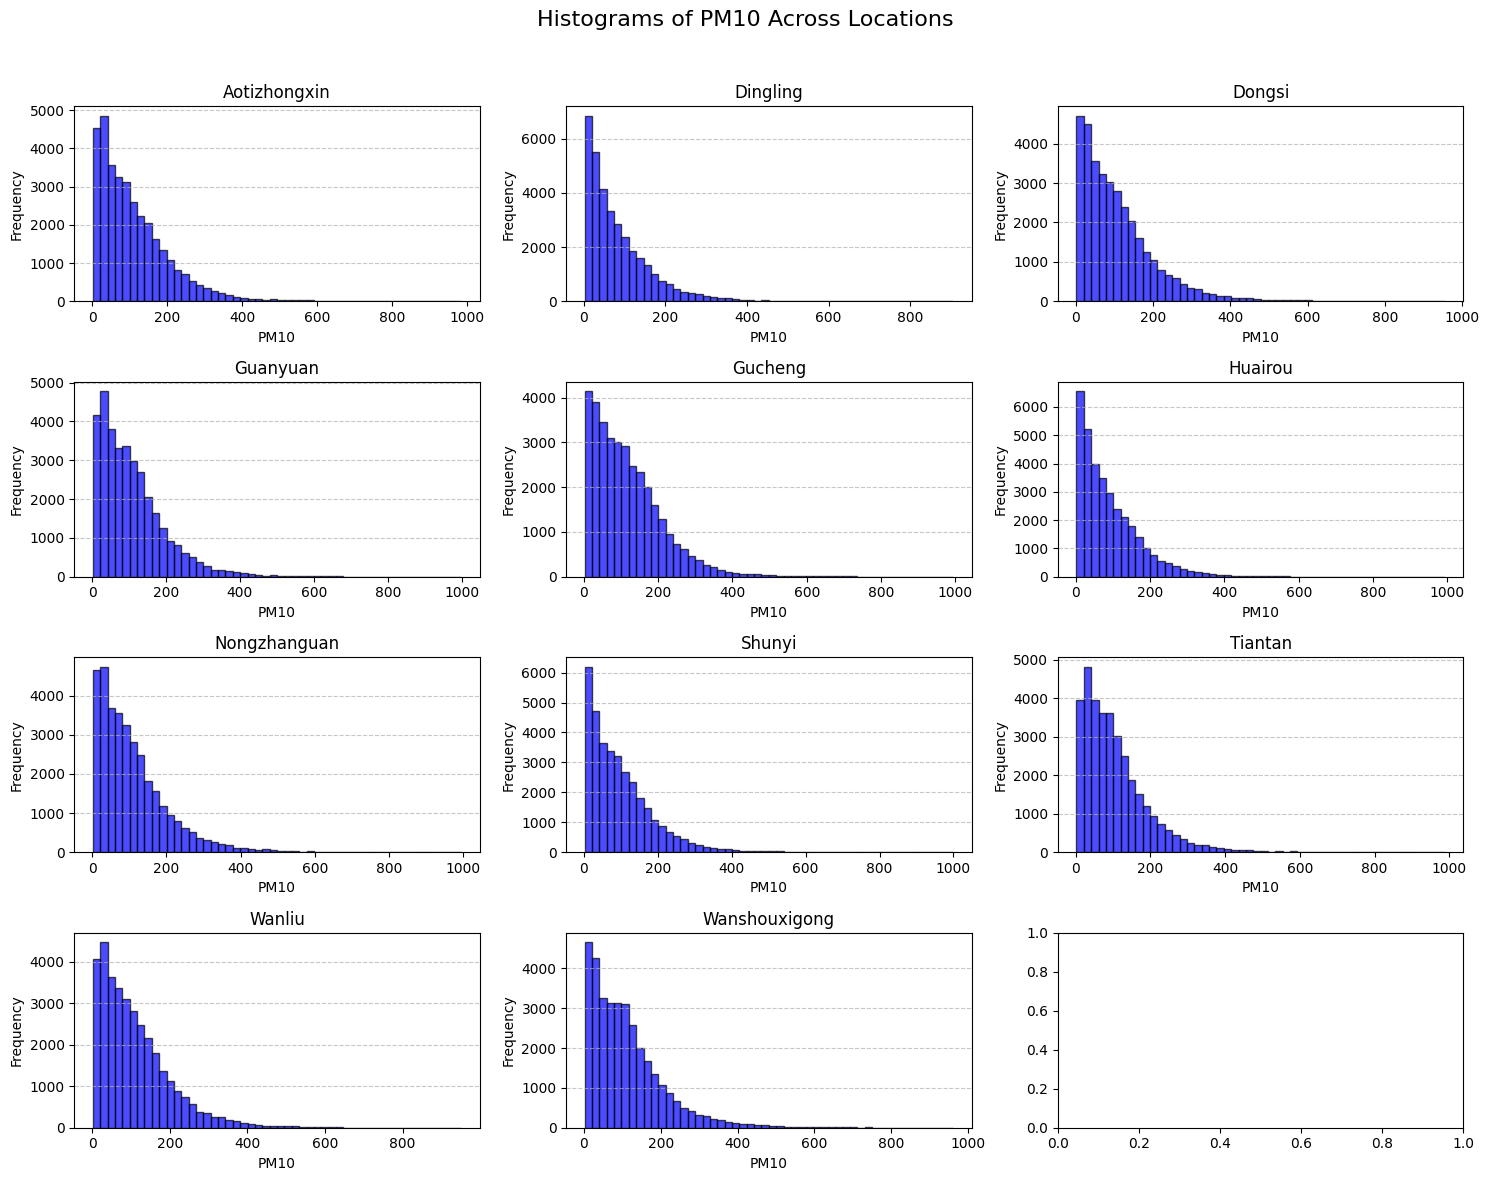

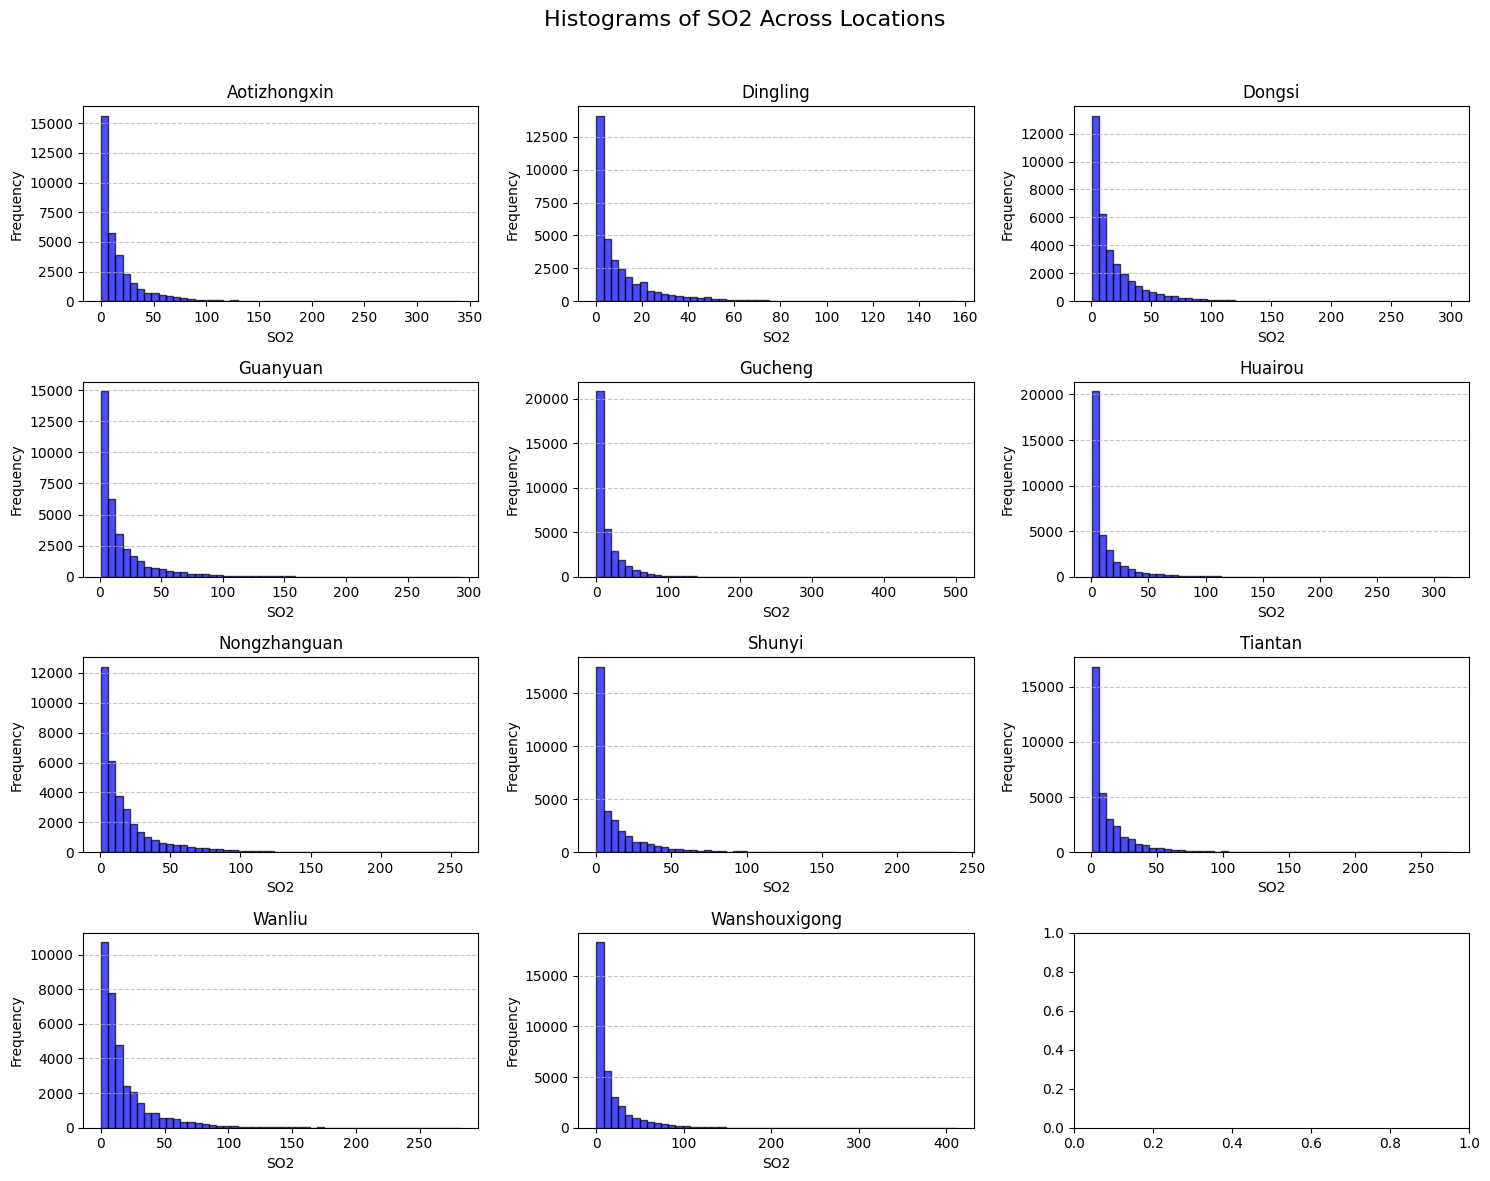

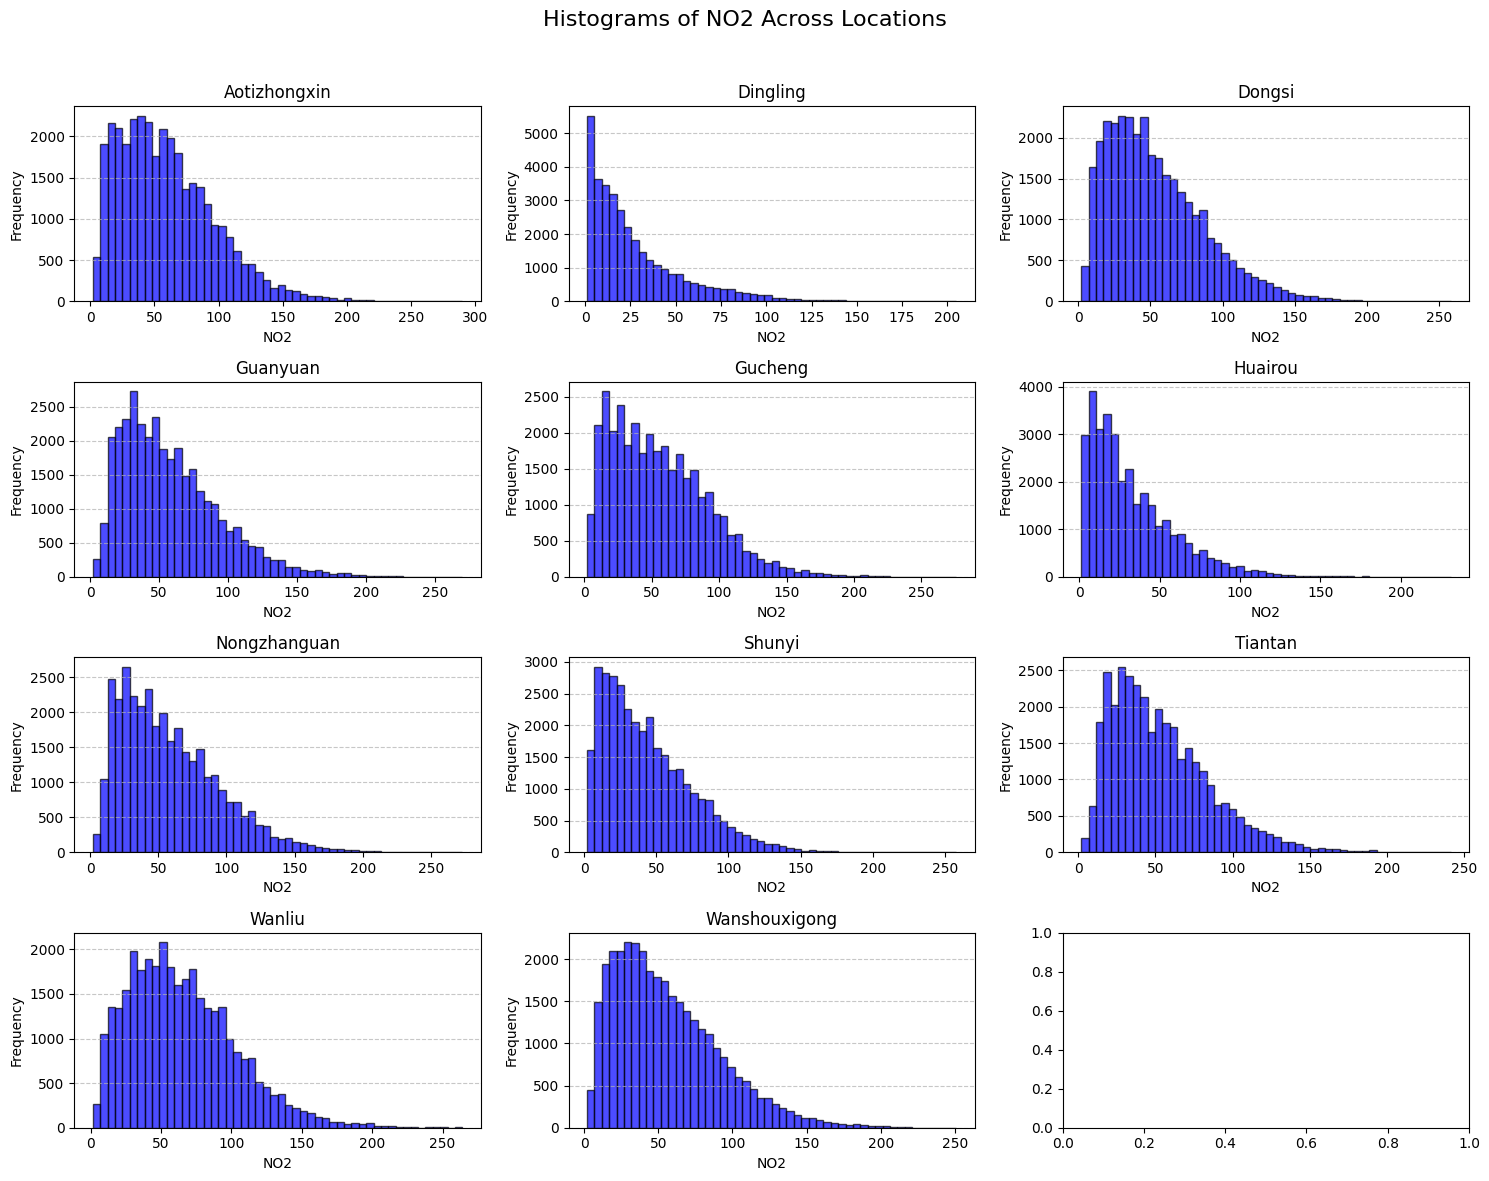

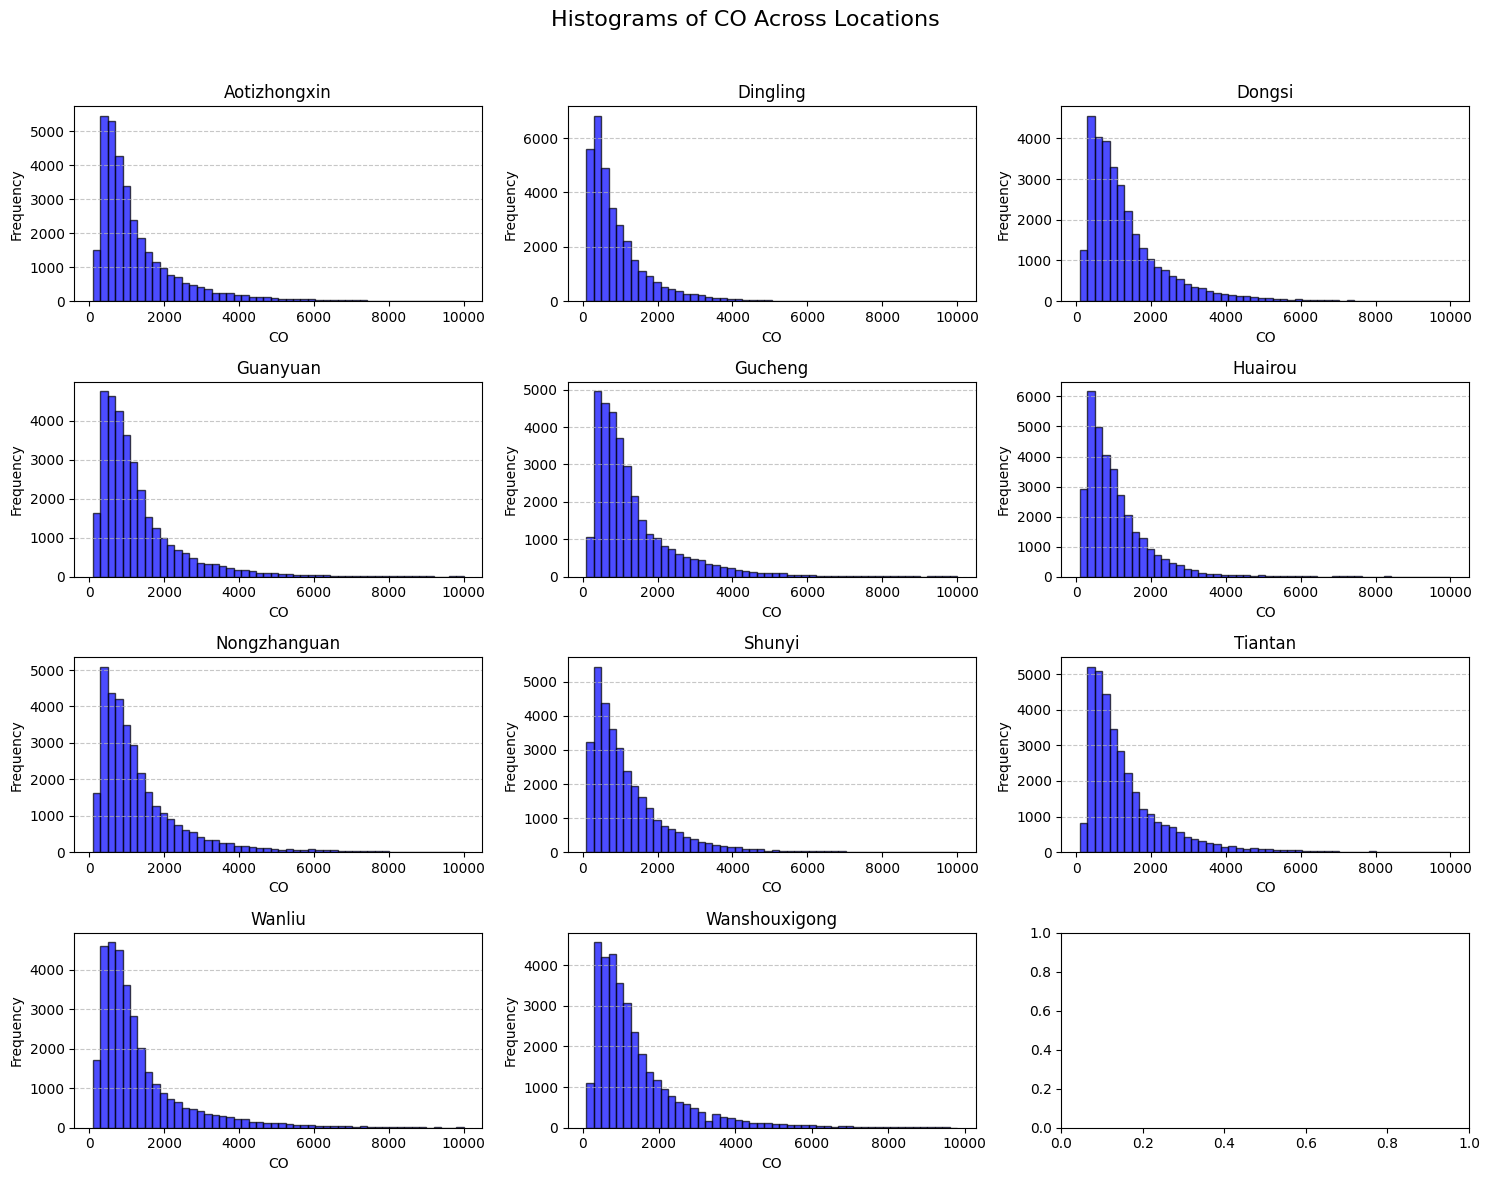

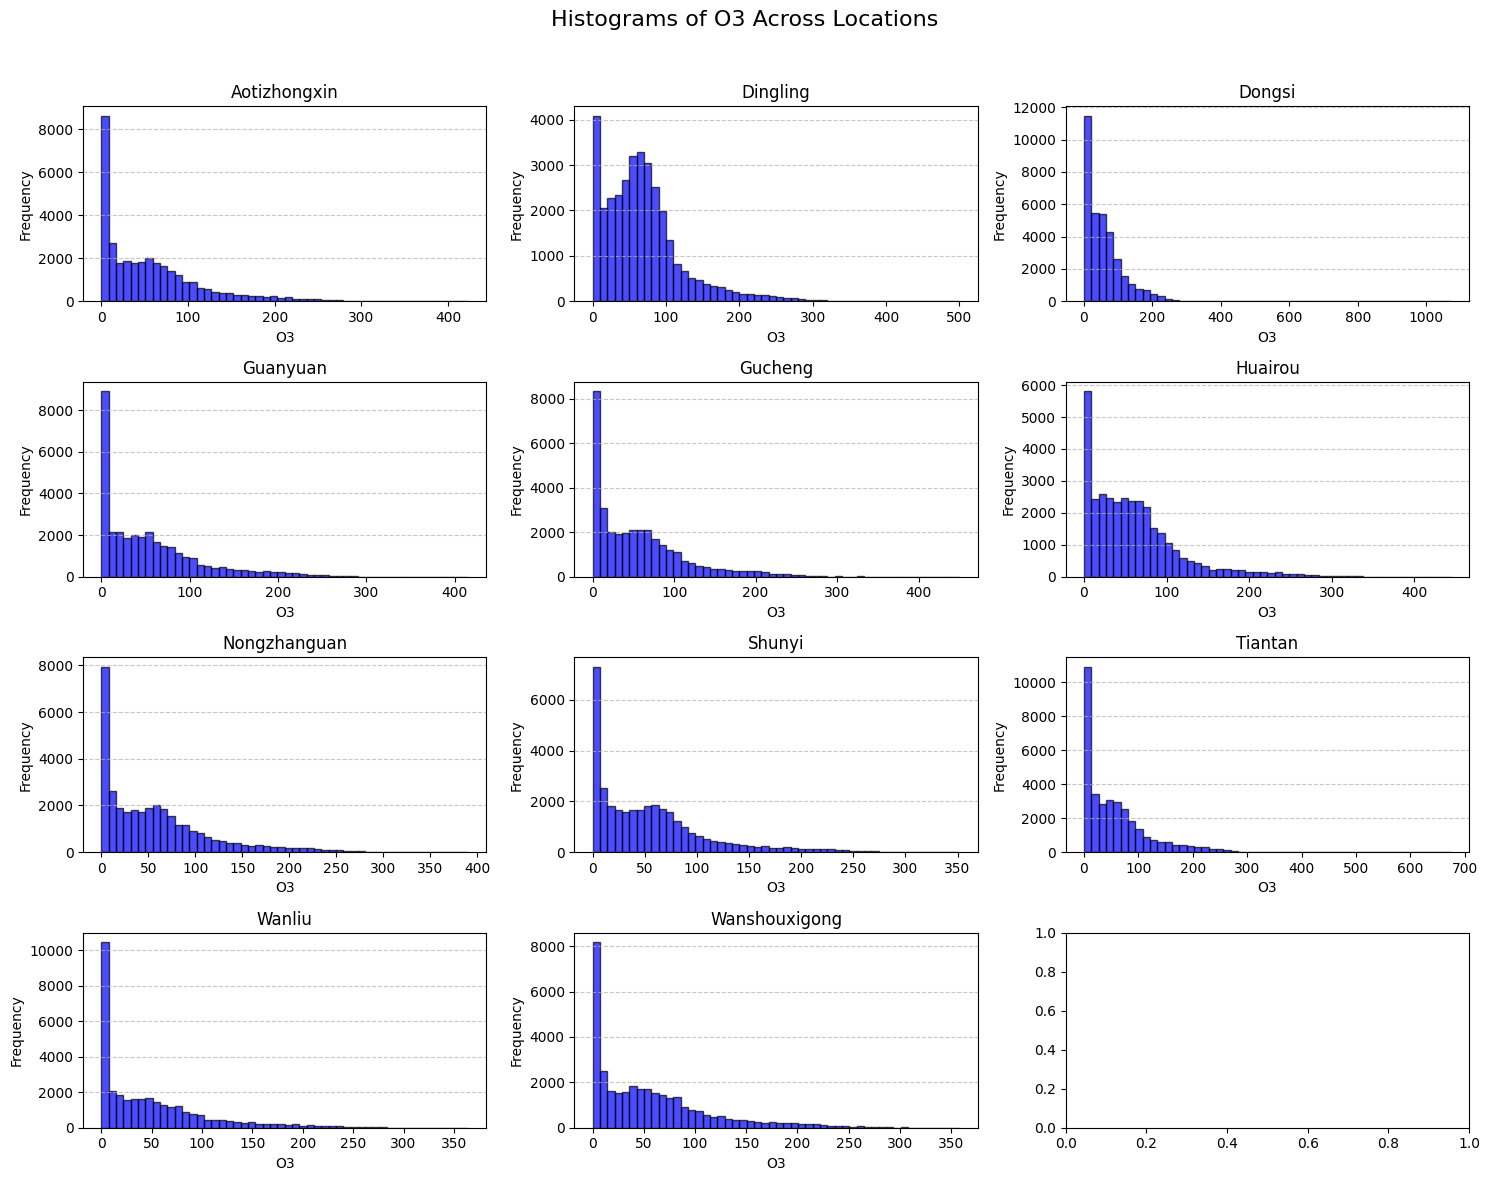

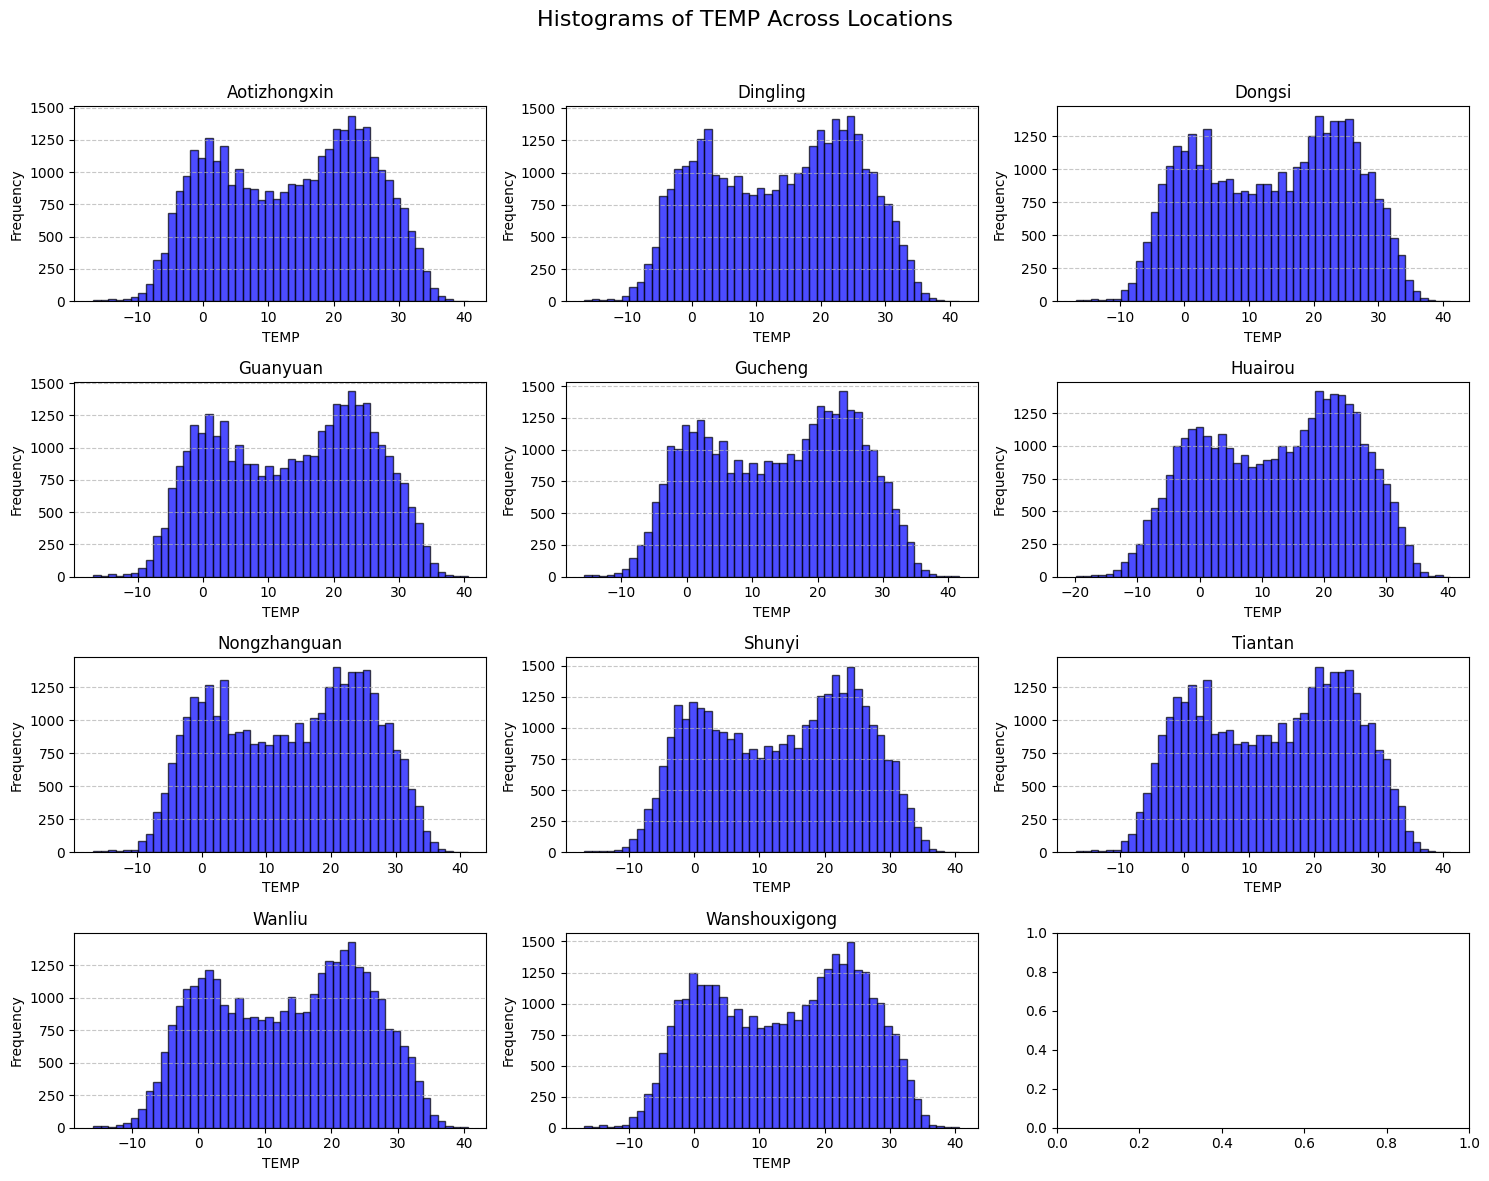

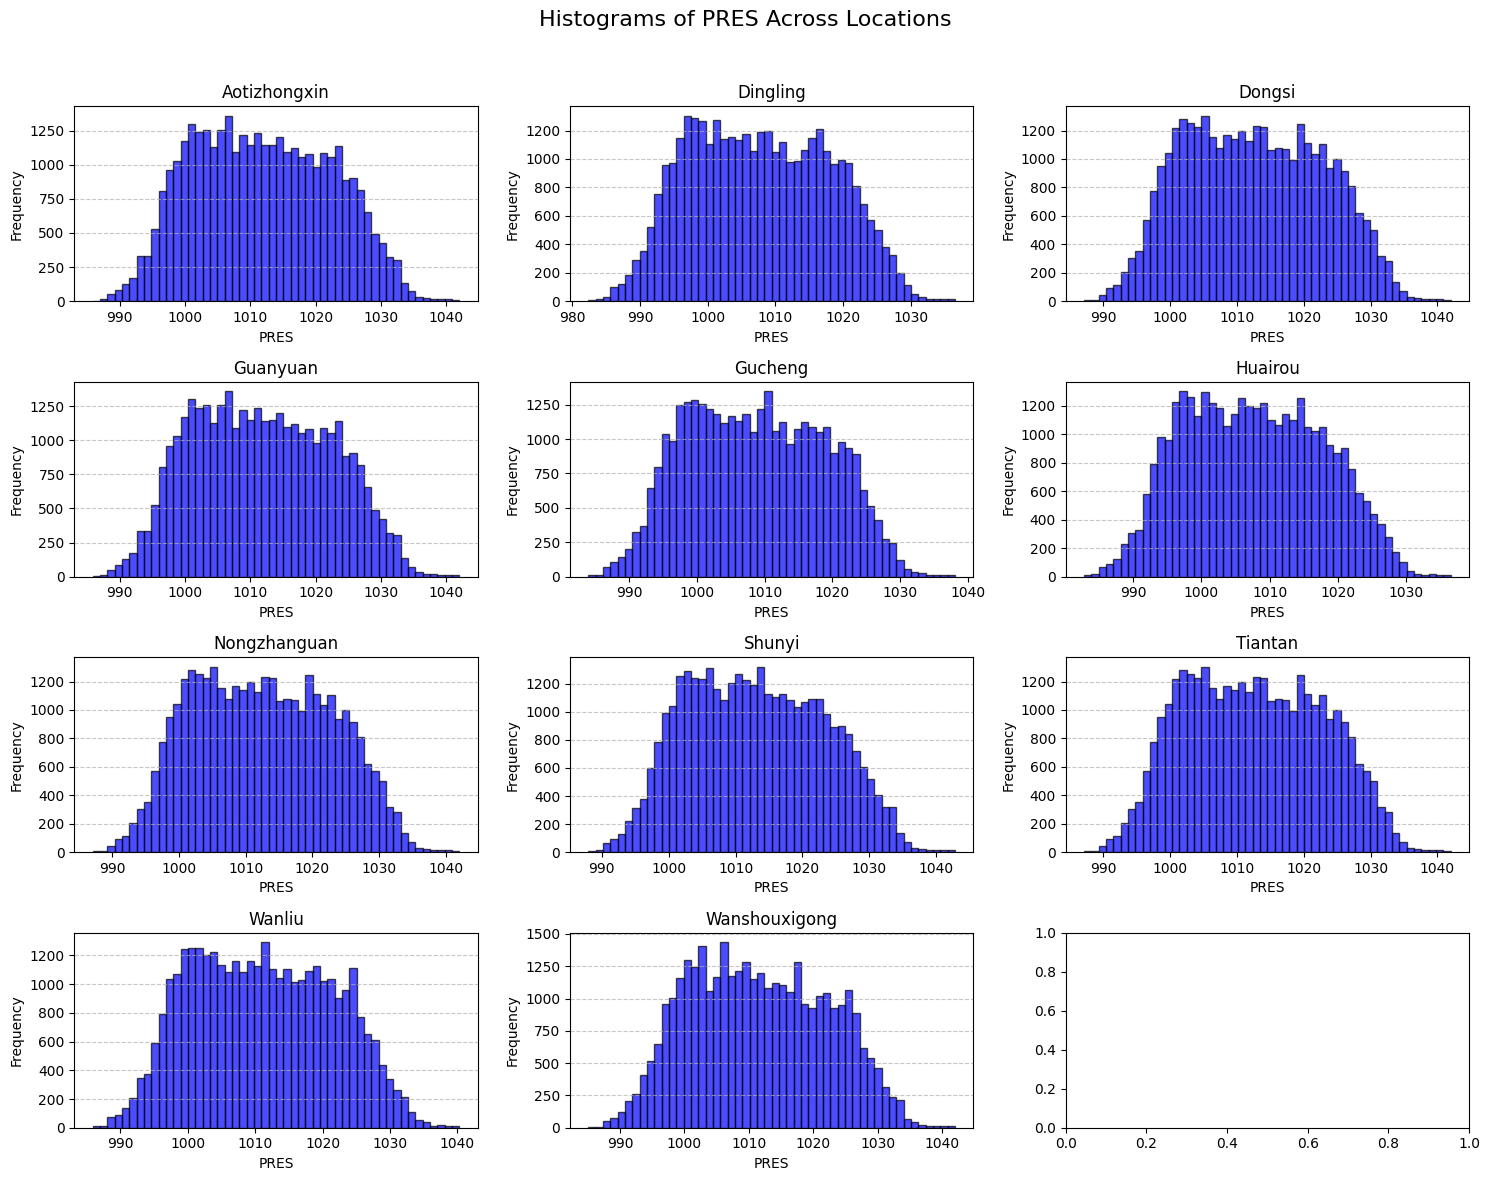

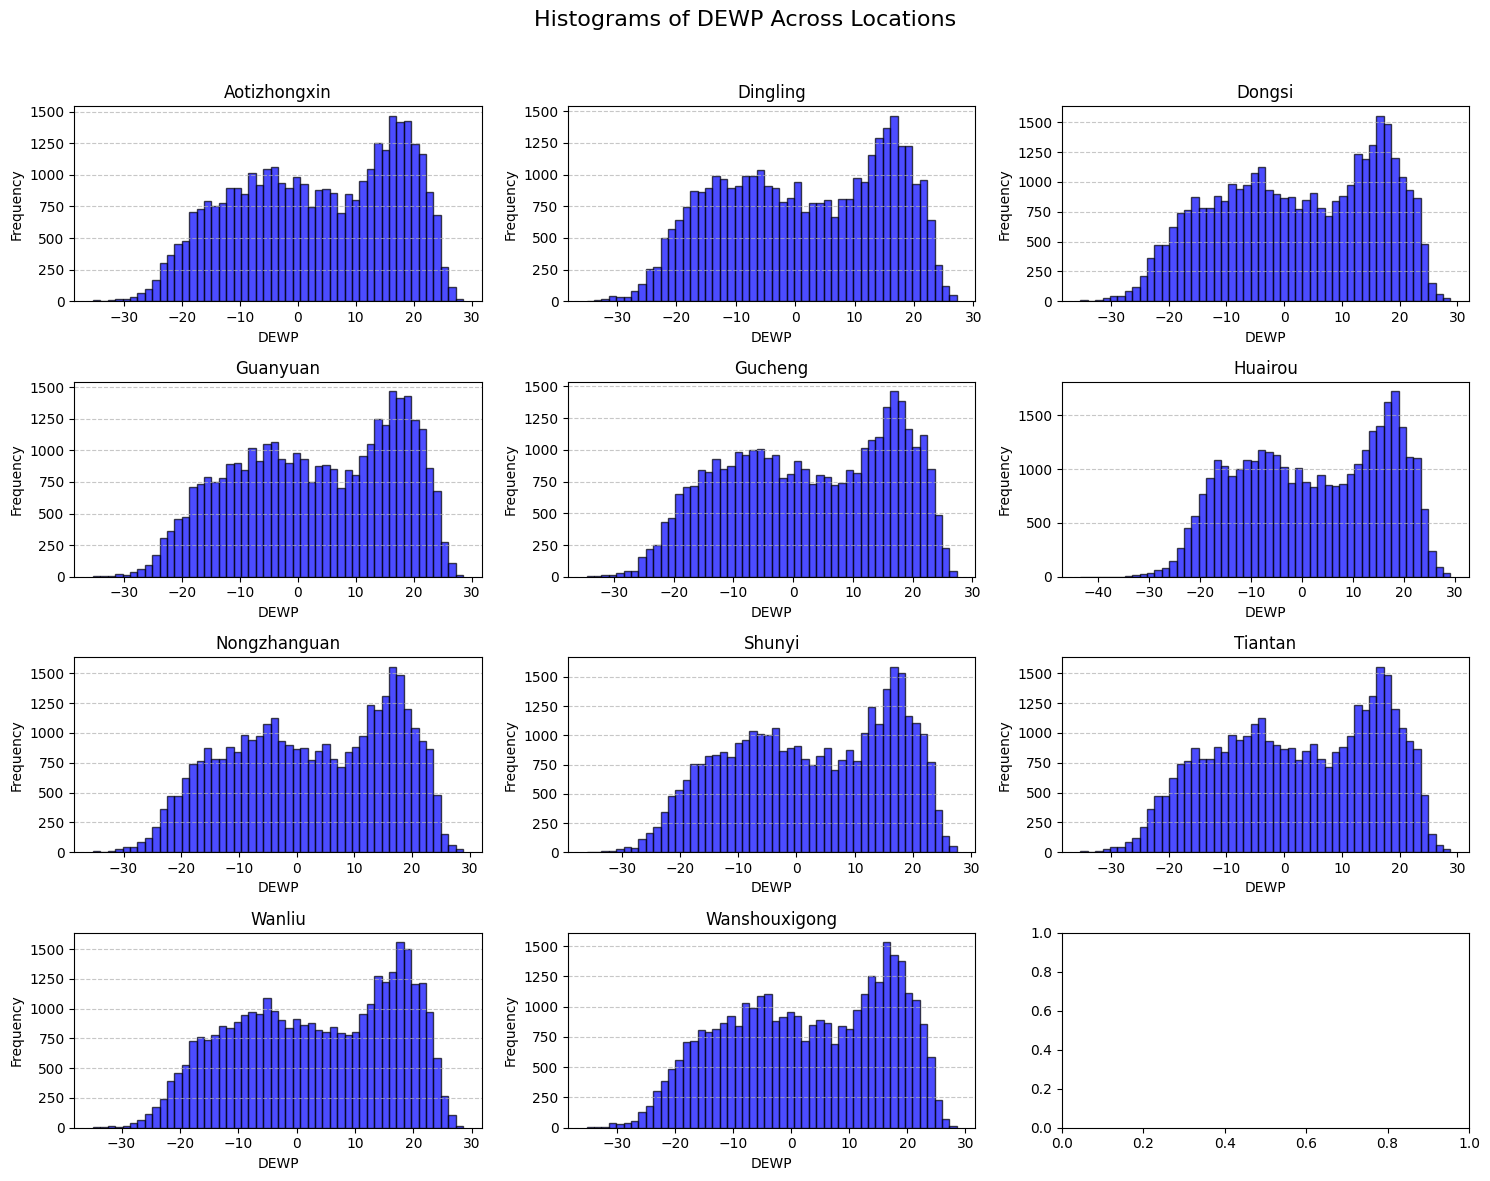

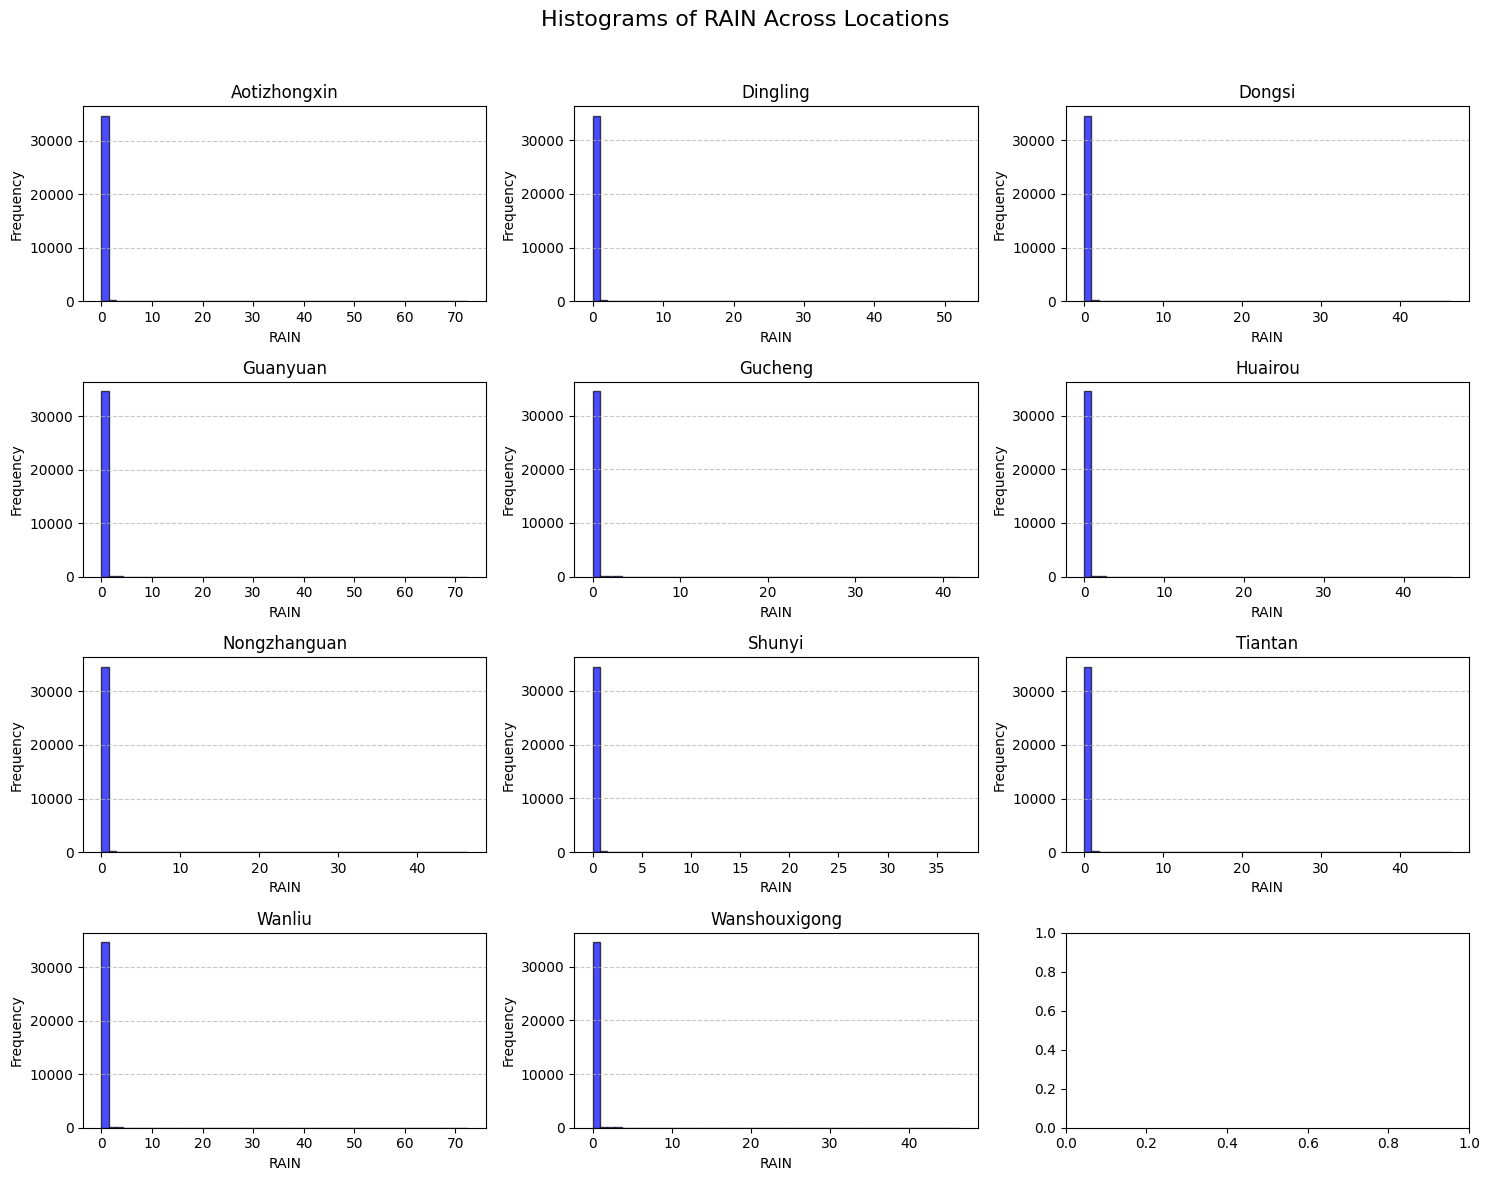

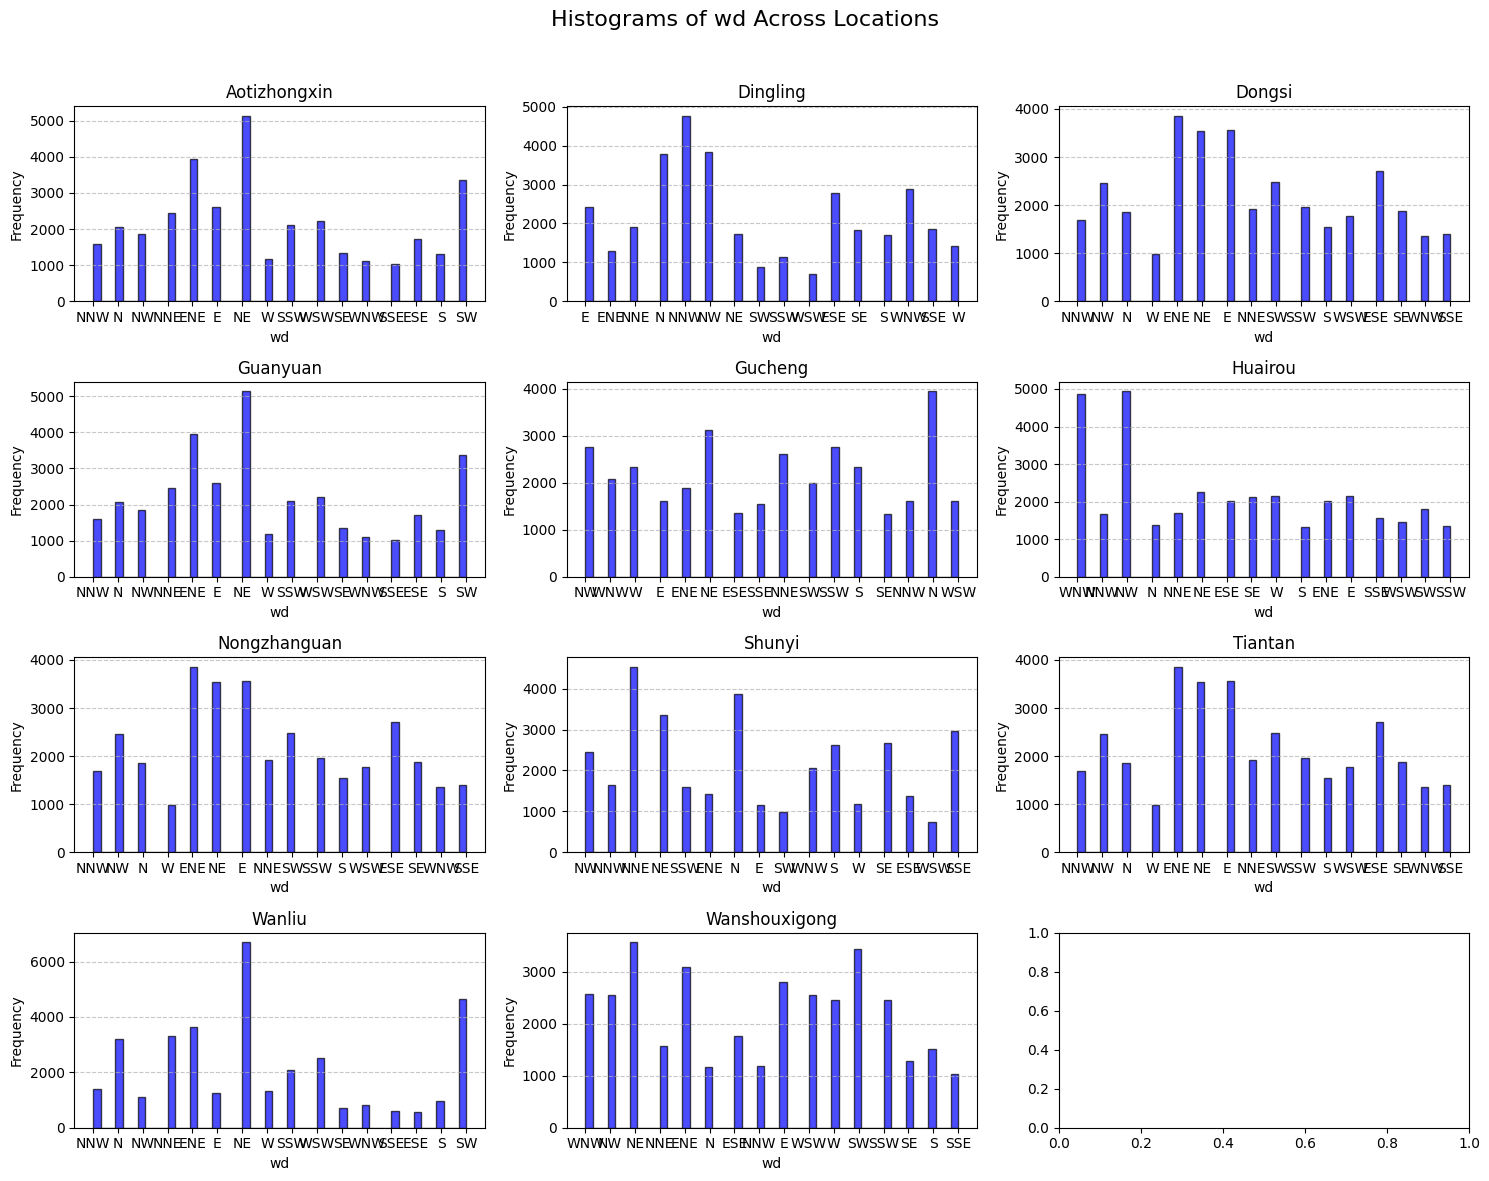

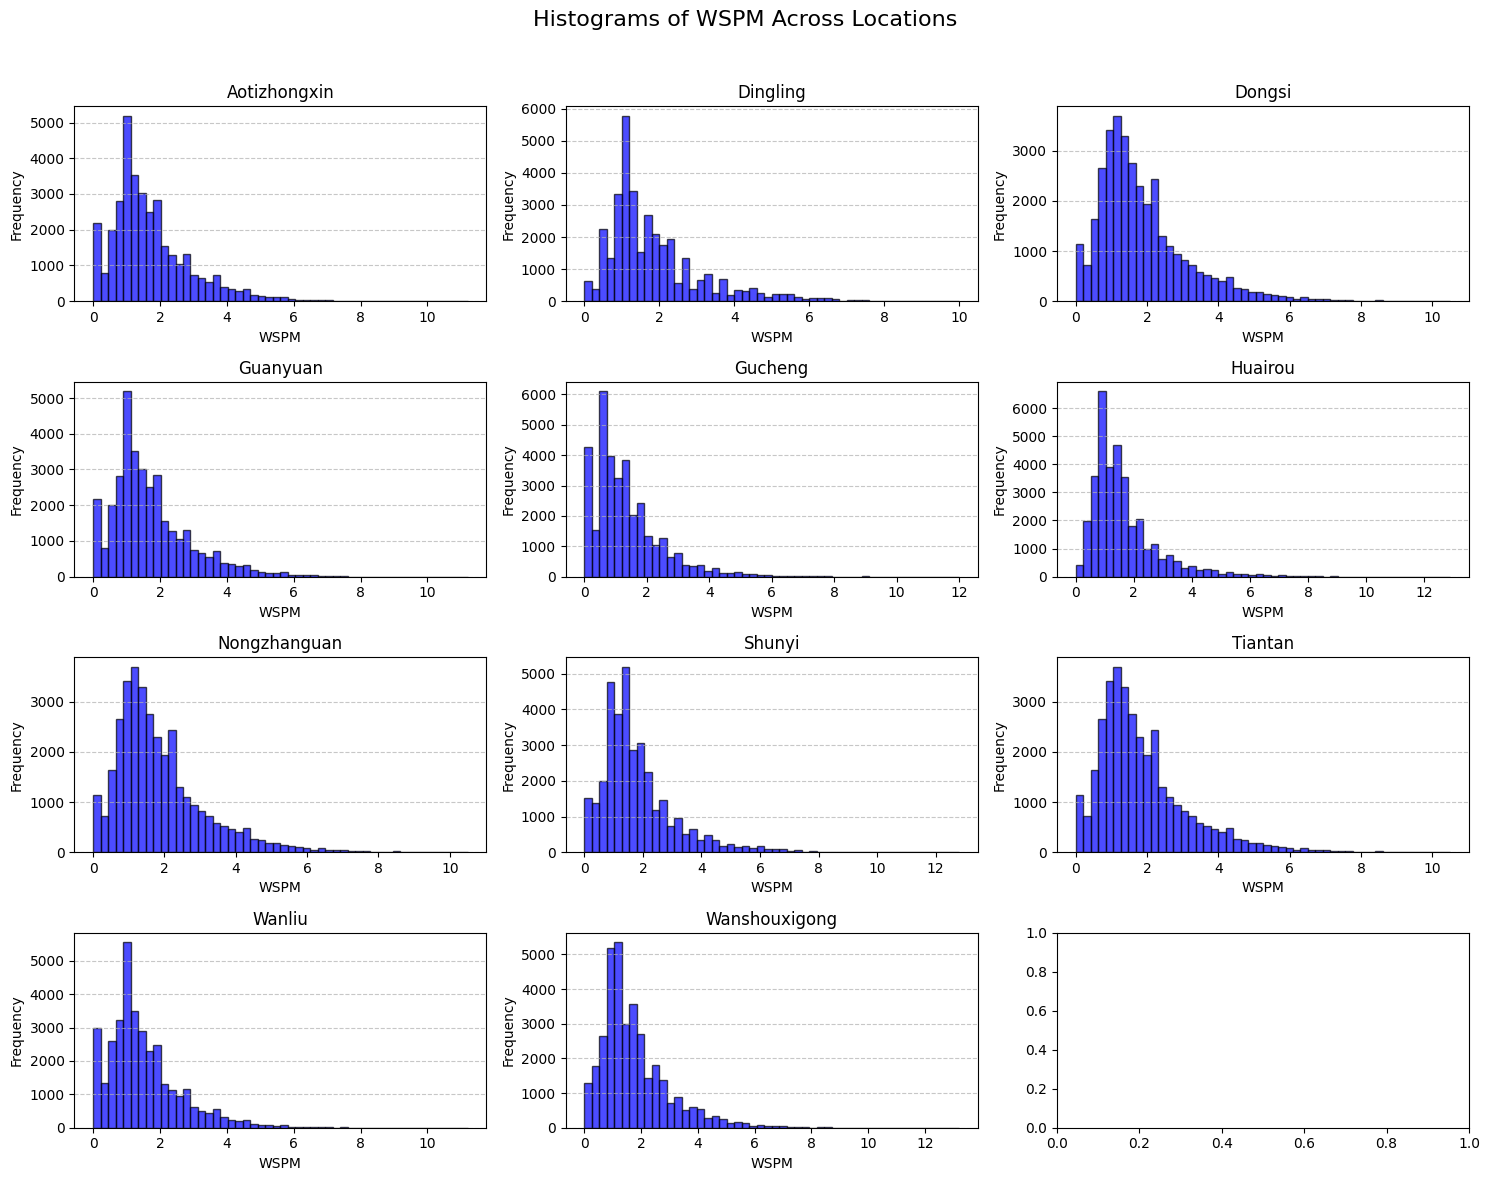

In [12]:
# Assuming dataframes is a dictionary with keys as location names and values as dataframes
plot_histograms_grouped_by_pollutant(dataframes)

Dari hasil histogram tersebut, ternyata tidak ada perubahan yang signifikan pada lokasi yang berbeda, hal ini juga karena semua data ini ada pada kota yang sama.

Seperti yang ditemukan sebelumnya, ada indikasi munculnya outlier, sehingga perlu dicek kembali dengan boxplot. Box plot ini biasa digunakan untuk mengecek outlier sehingga perlu untuk diterapkan. Berikut adalah functionnya:

In [13]:
def plot_boxplots_grouped_by_columns(dataframes):
    # Columns to plot
    Columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

    # Loop through each columns
    for Column in Columns:
        fig, axs = plt.subplots(4, 3, figsize=(15, 12))  # Adjust the grid size to accommodate all locations
        fig.suptitle(f'Boxplots of {Column} Across Locations', fontsize=16)

        # Flatten the axs array for easier iteration
        axs = axs.flatten()

        # Loop through each location and plot the boxplot for the pollutant data
        for i, (location_name, df) in enumerate(dataframes.items()):
            axs[i].boxplot(df[Column].dropna(), vert=True, patch_artist=True)
            axs[i].set_title(f'{location_name}')
            axs[i].set_ylabel(Column)
            axs[i].grid(axis='y', linestyle='--', alpha=0.7)

        # Adjust layout and display the plot
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
        plt.show()

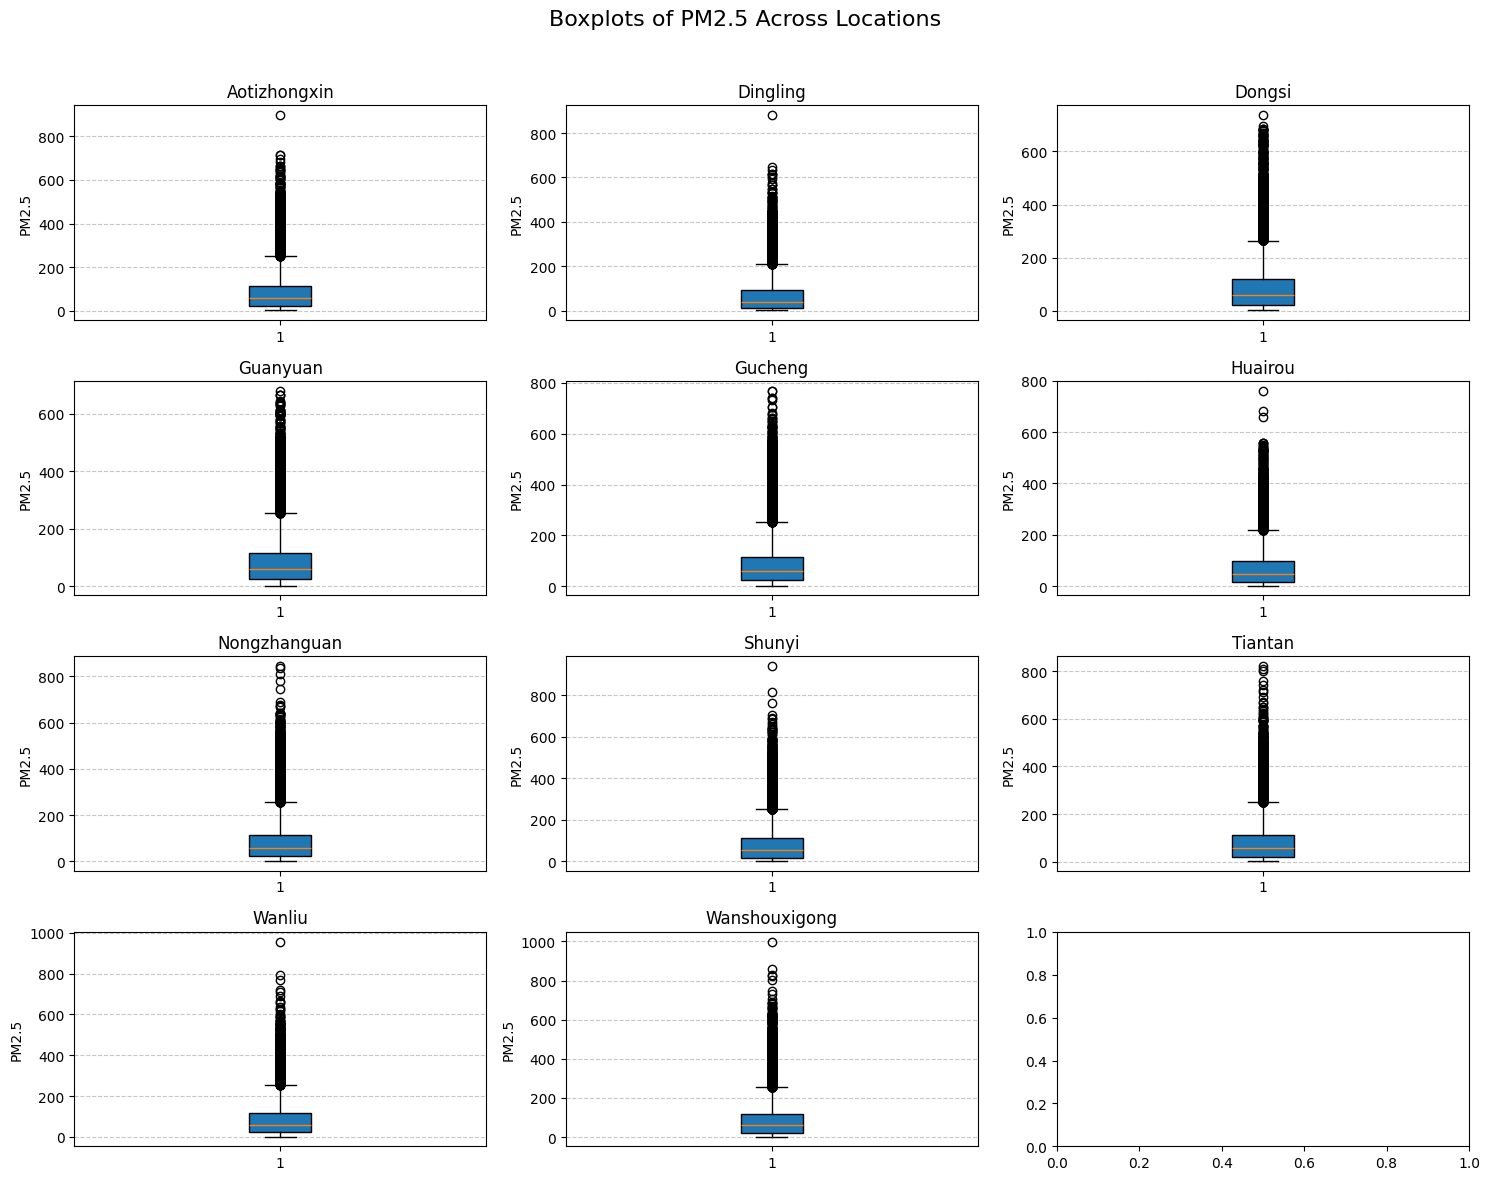

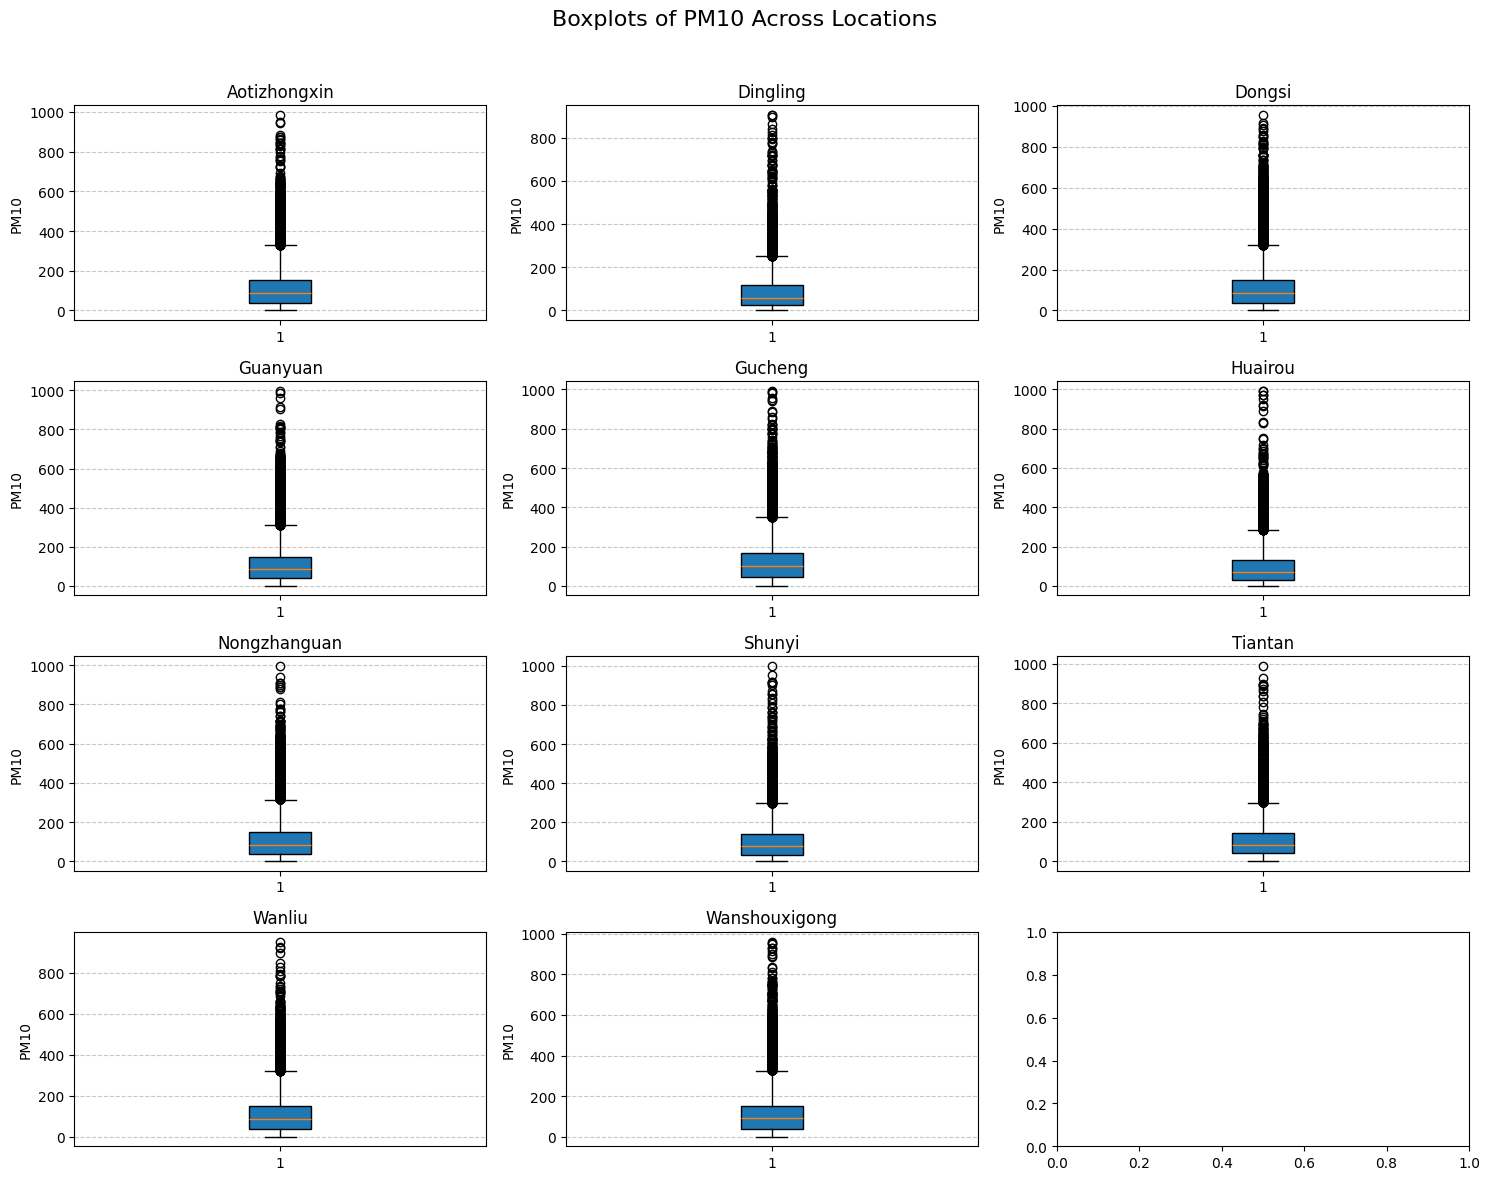

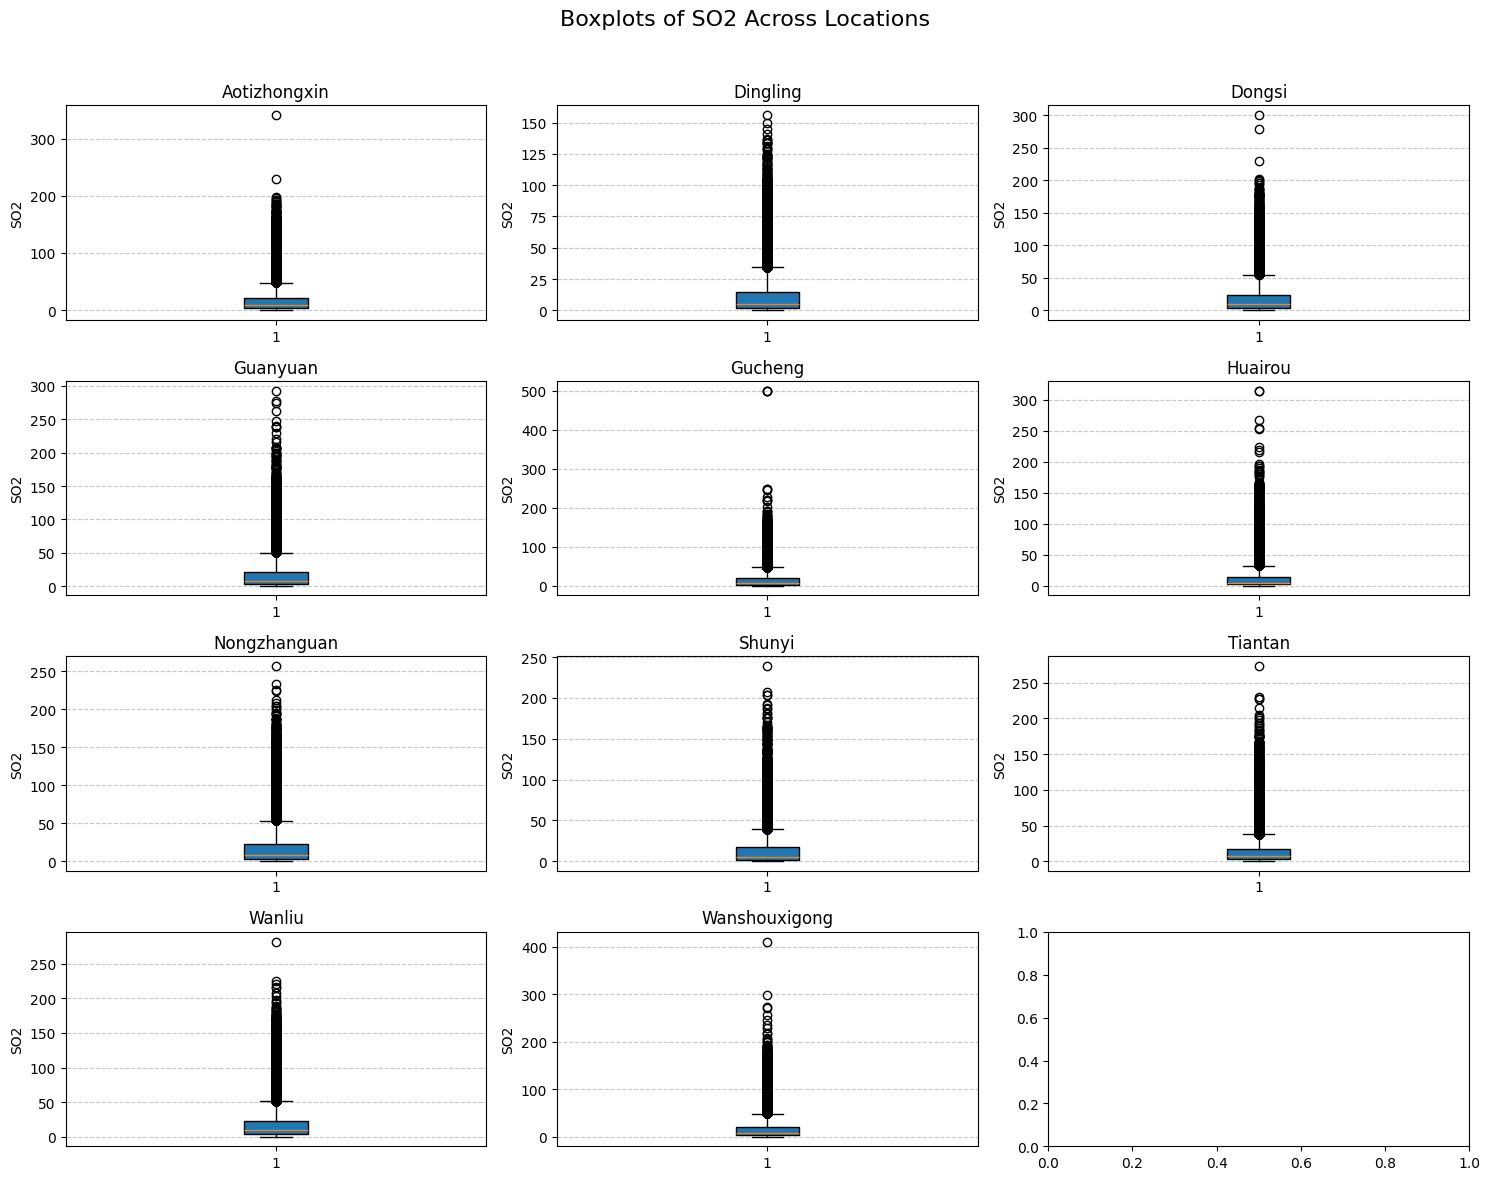

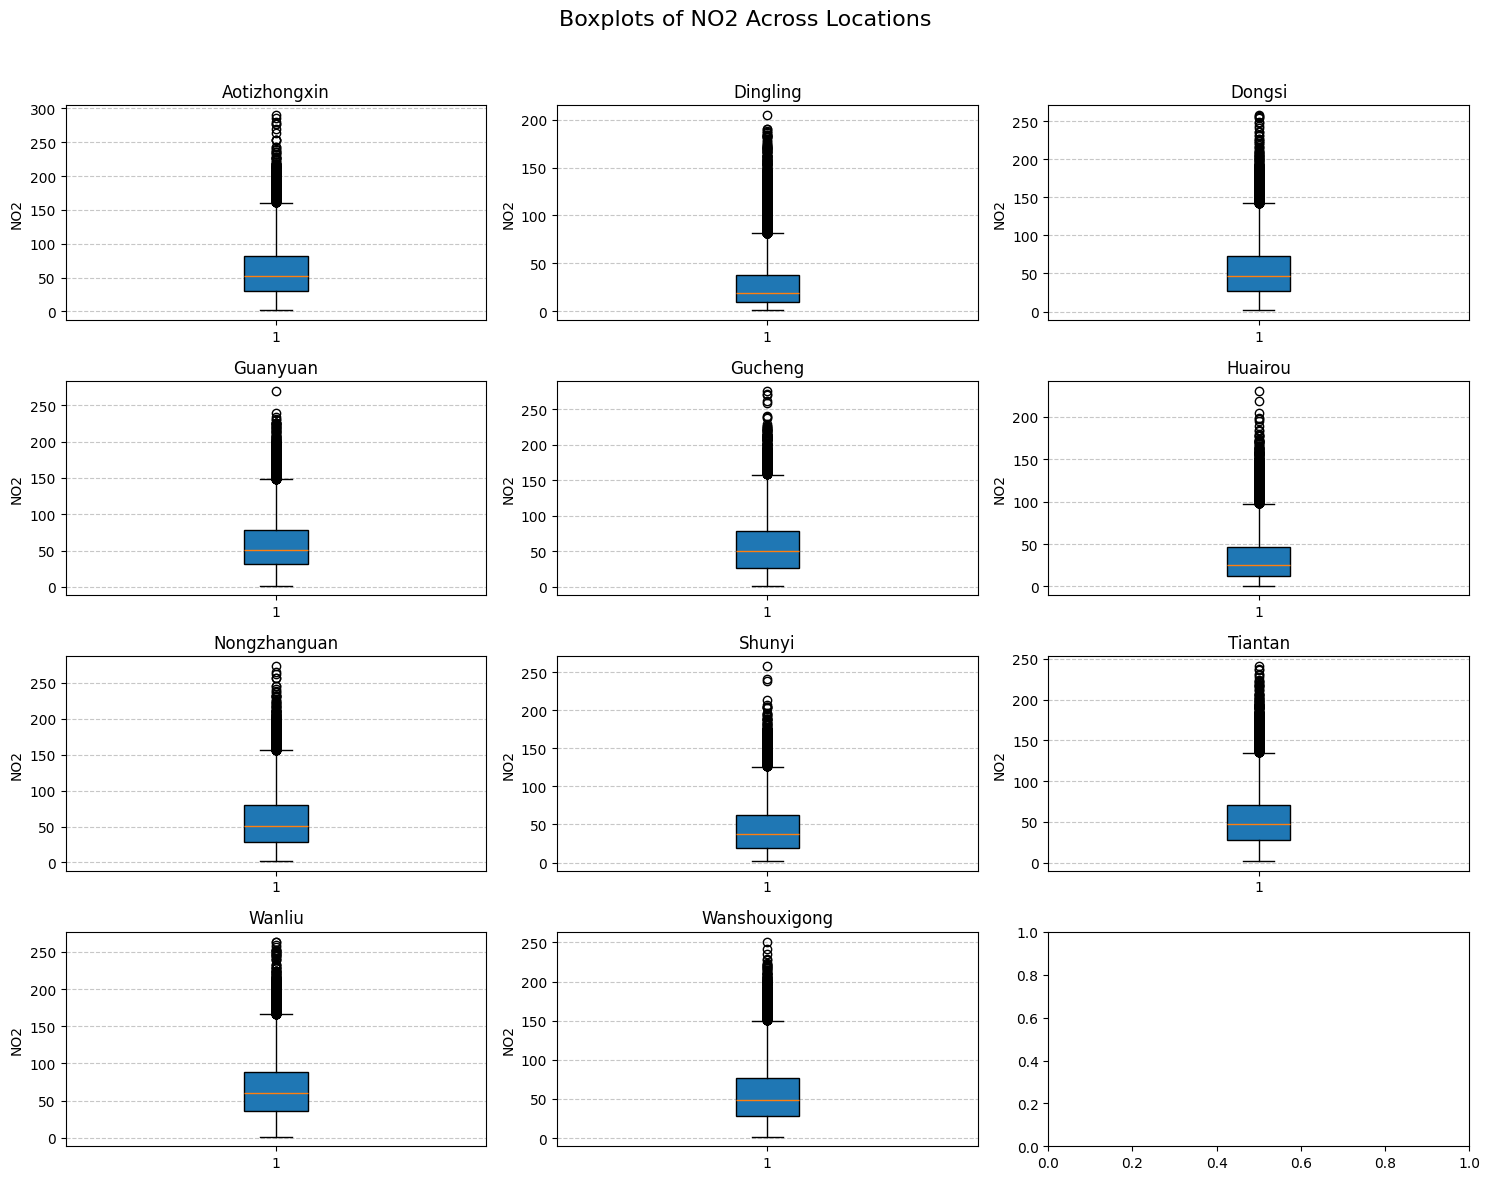

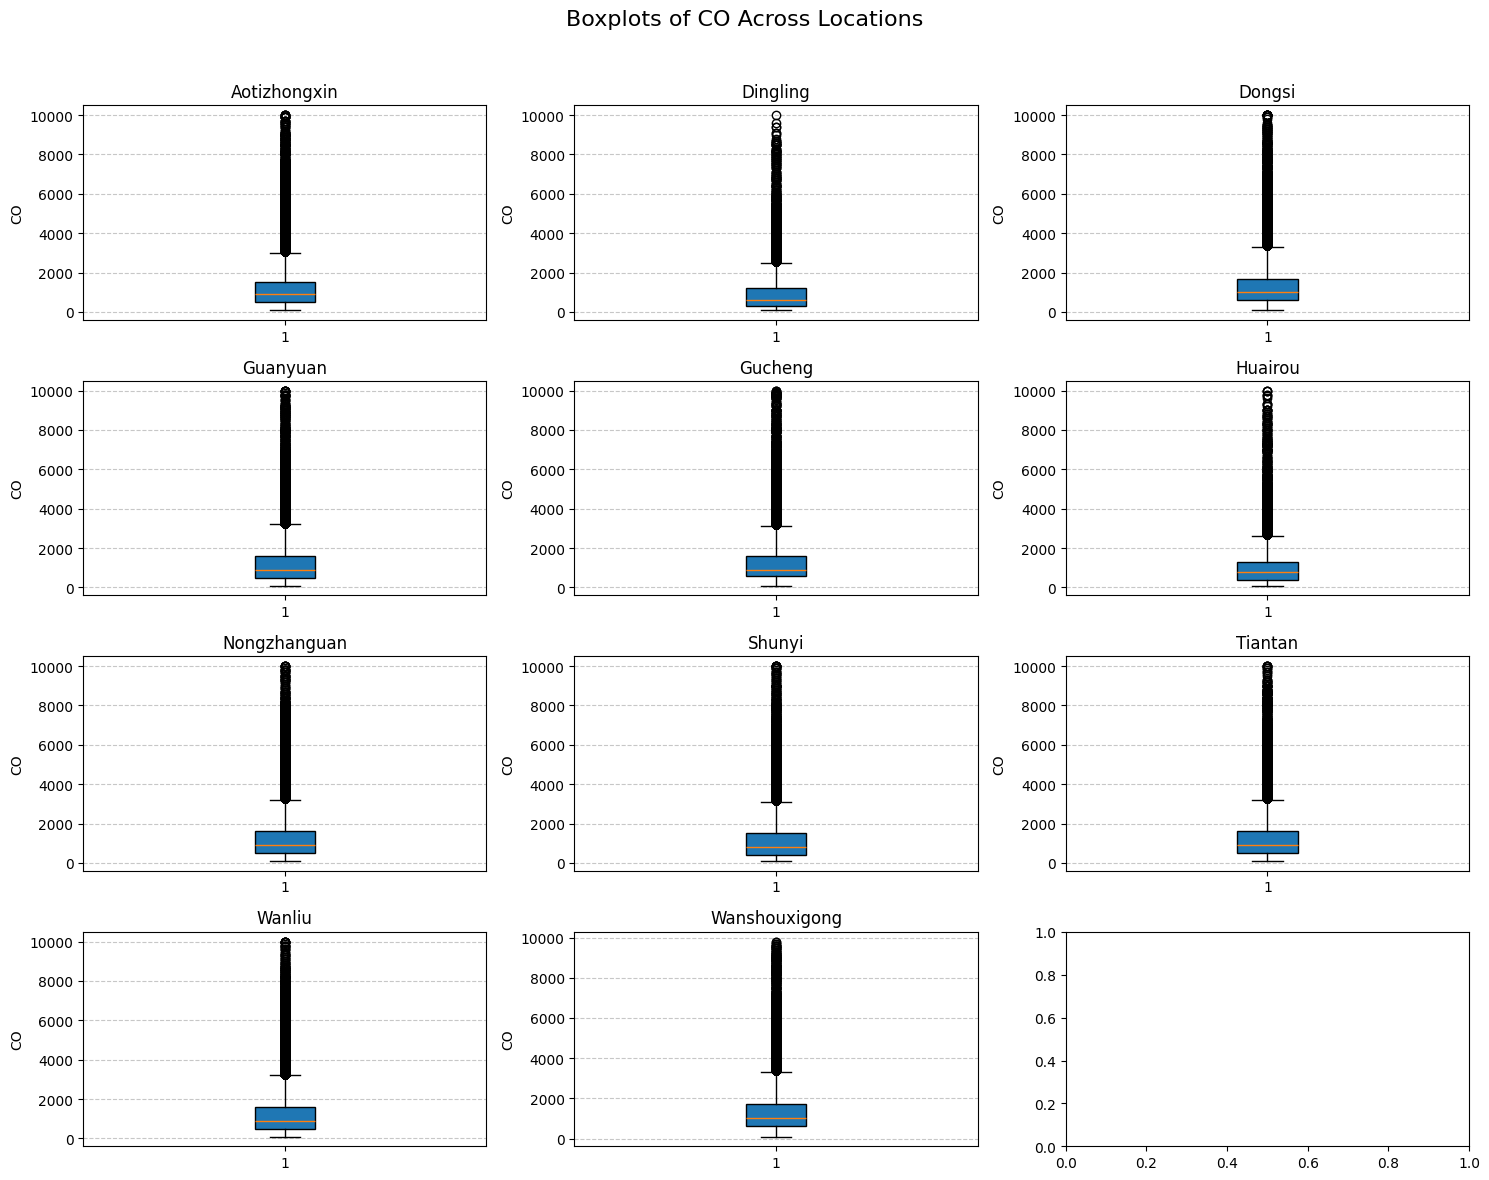

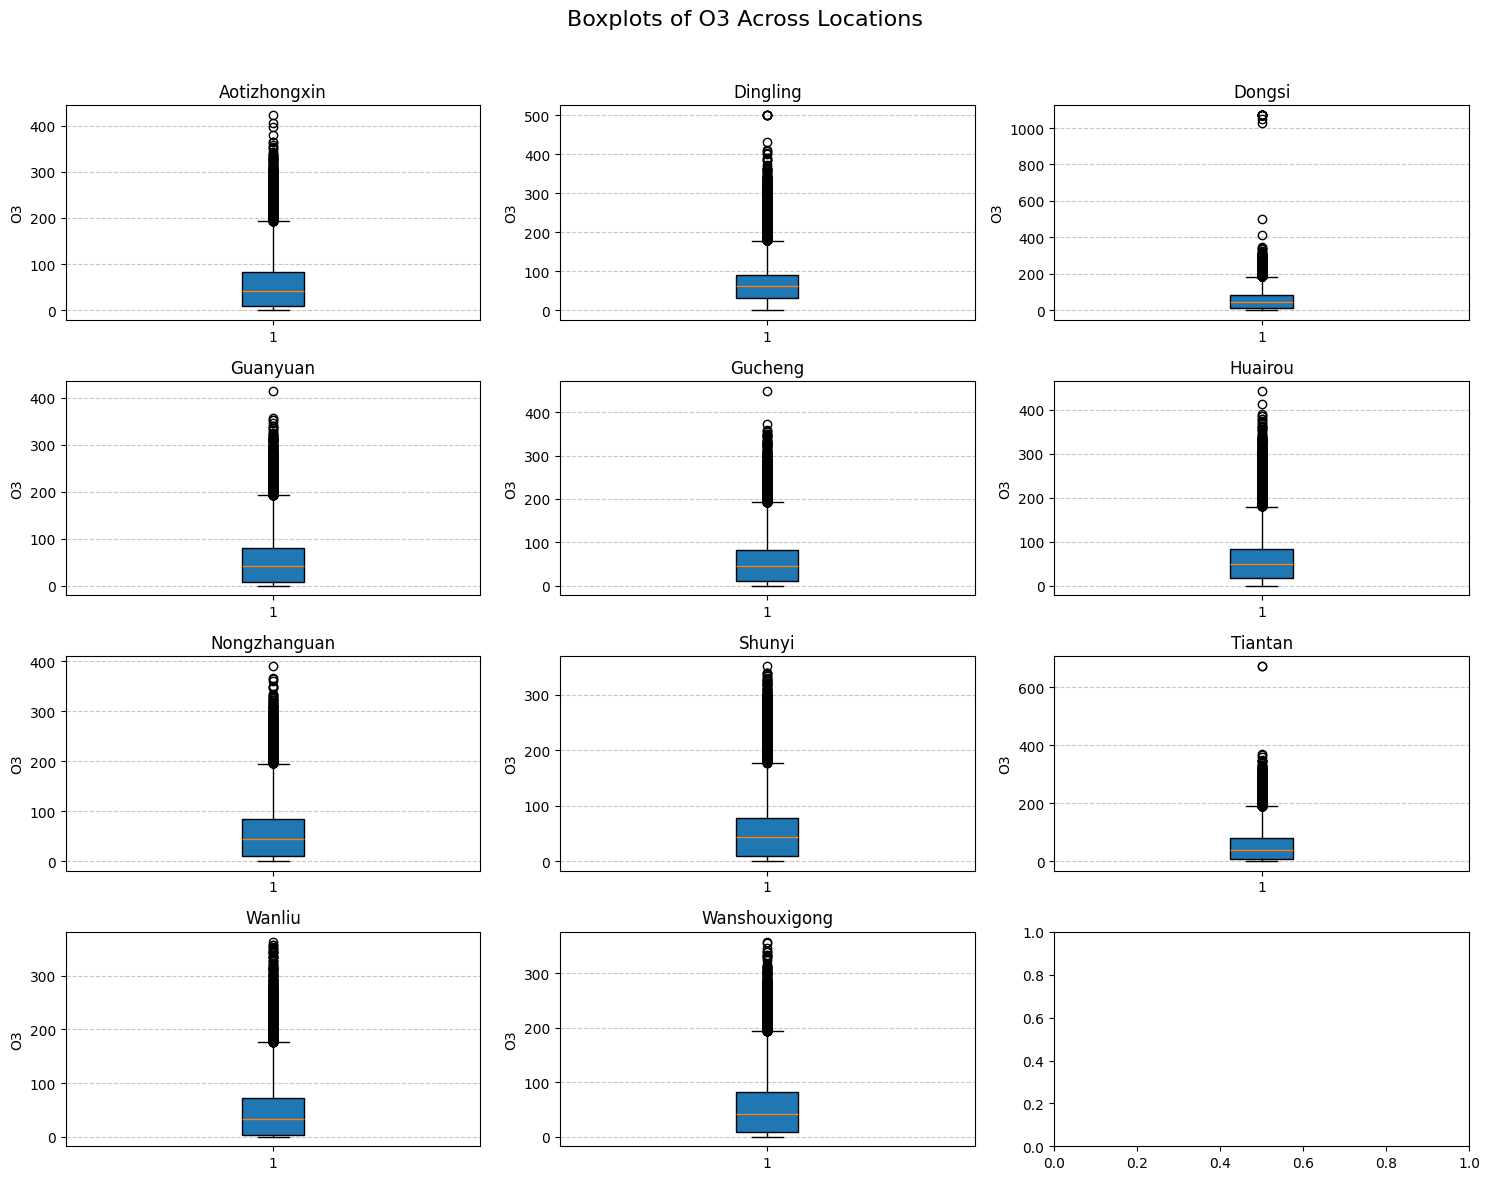

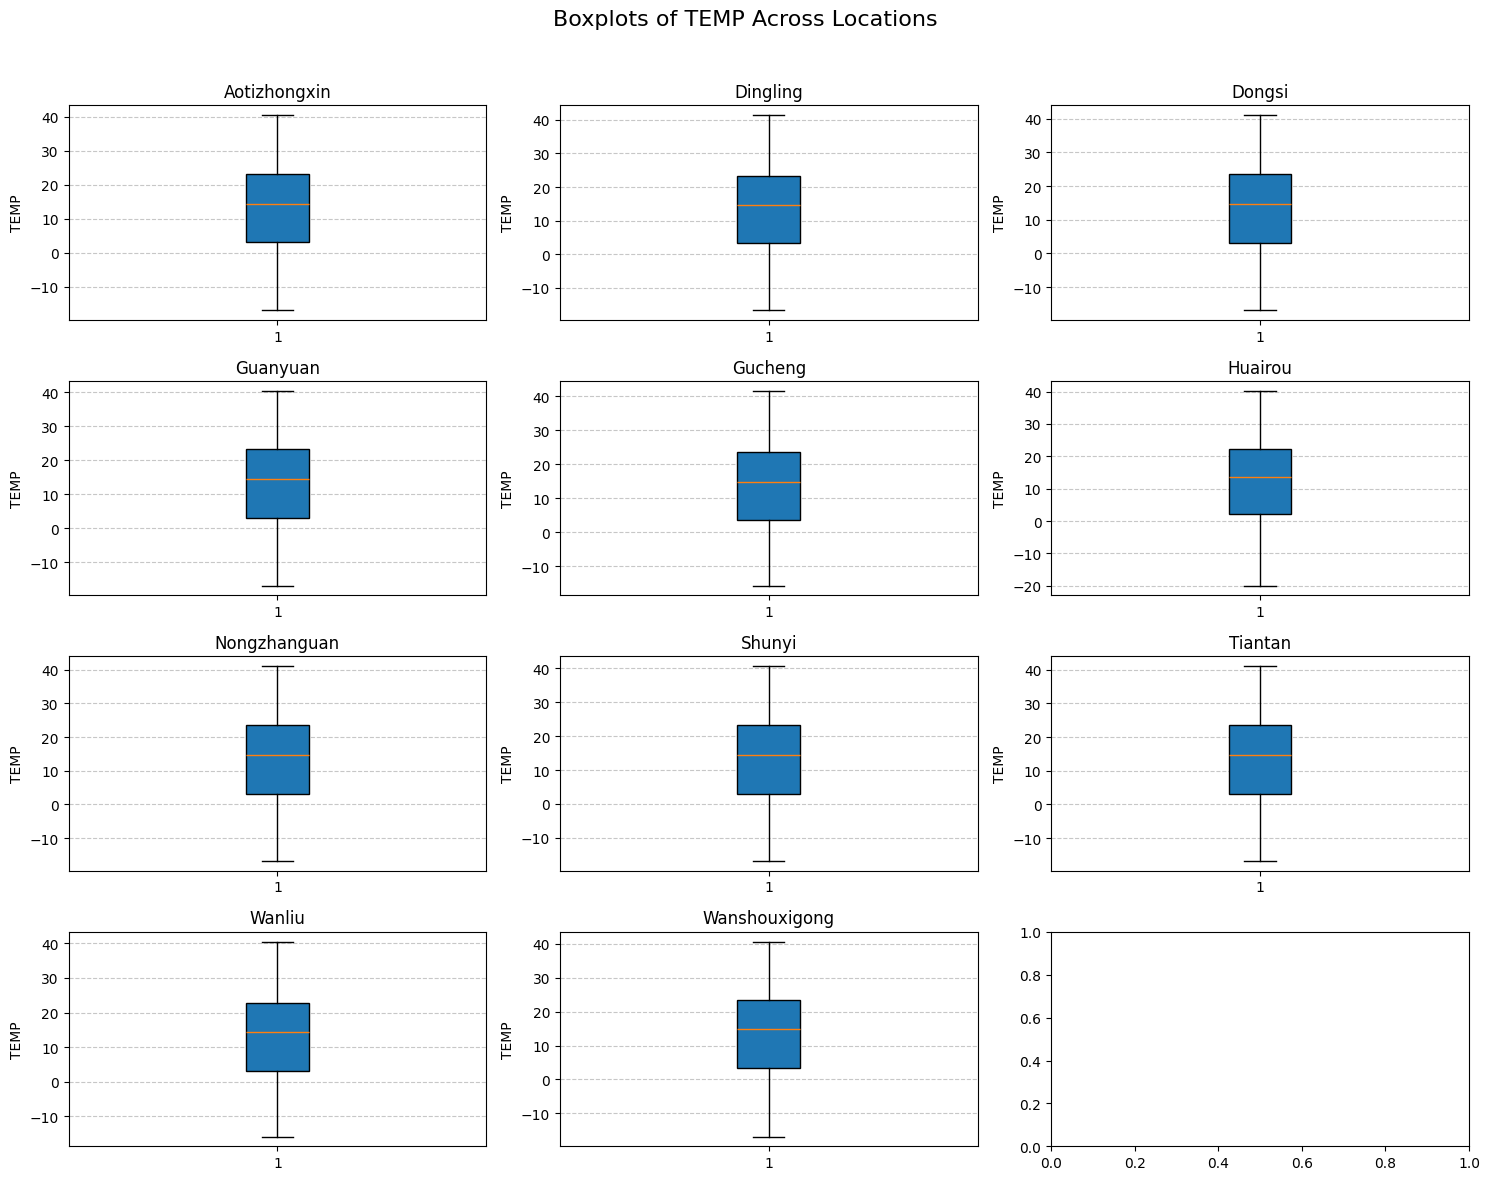

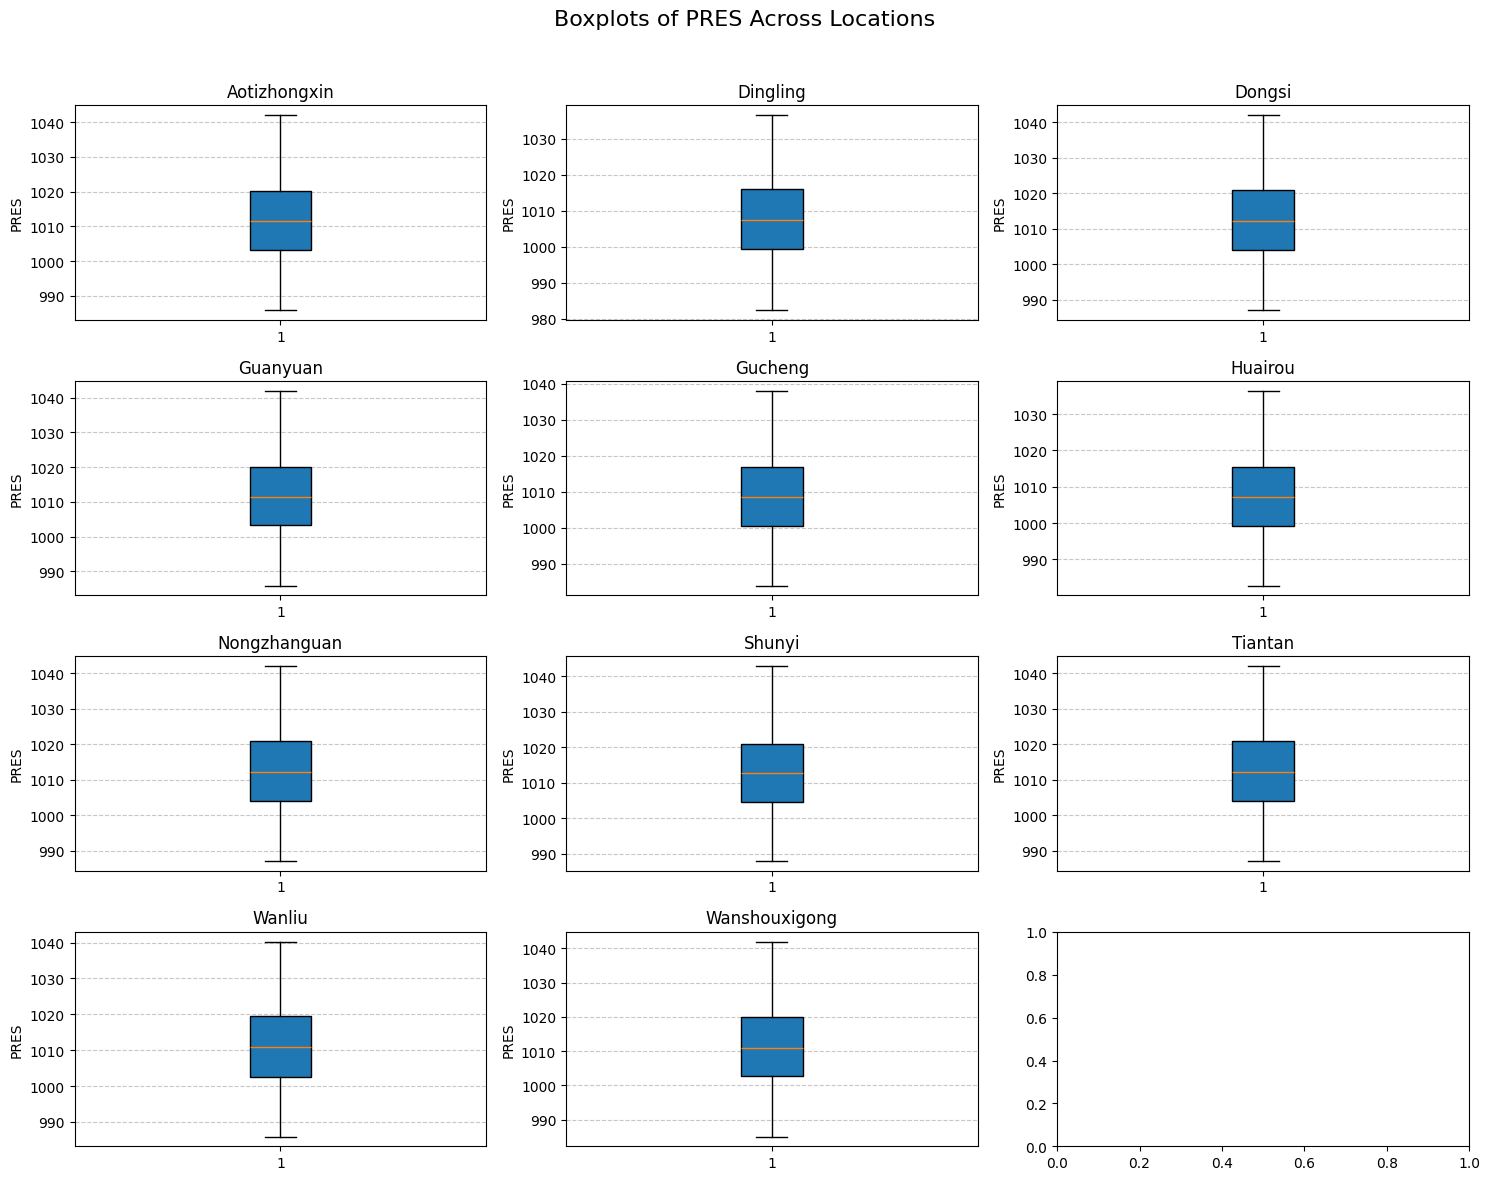

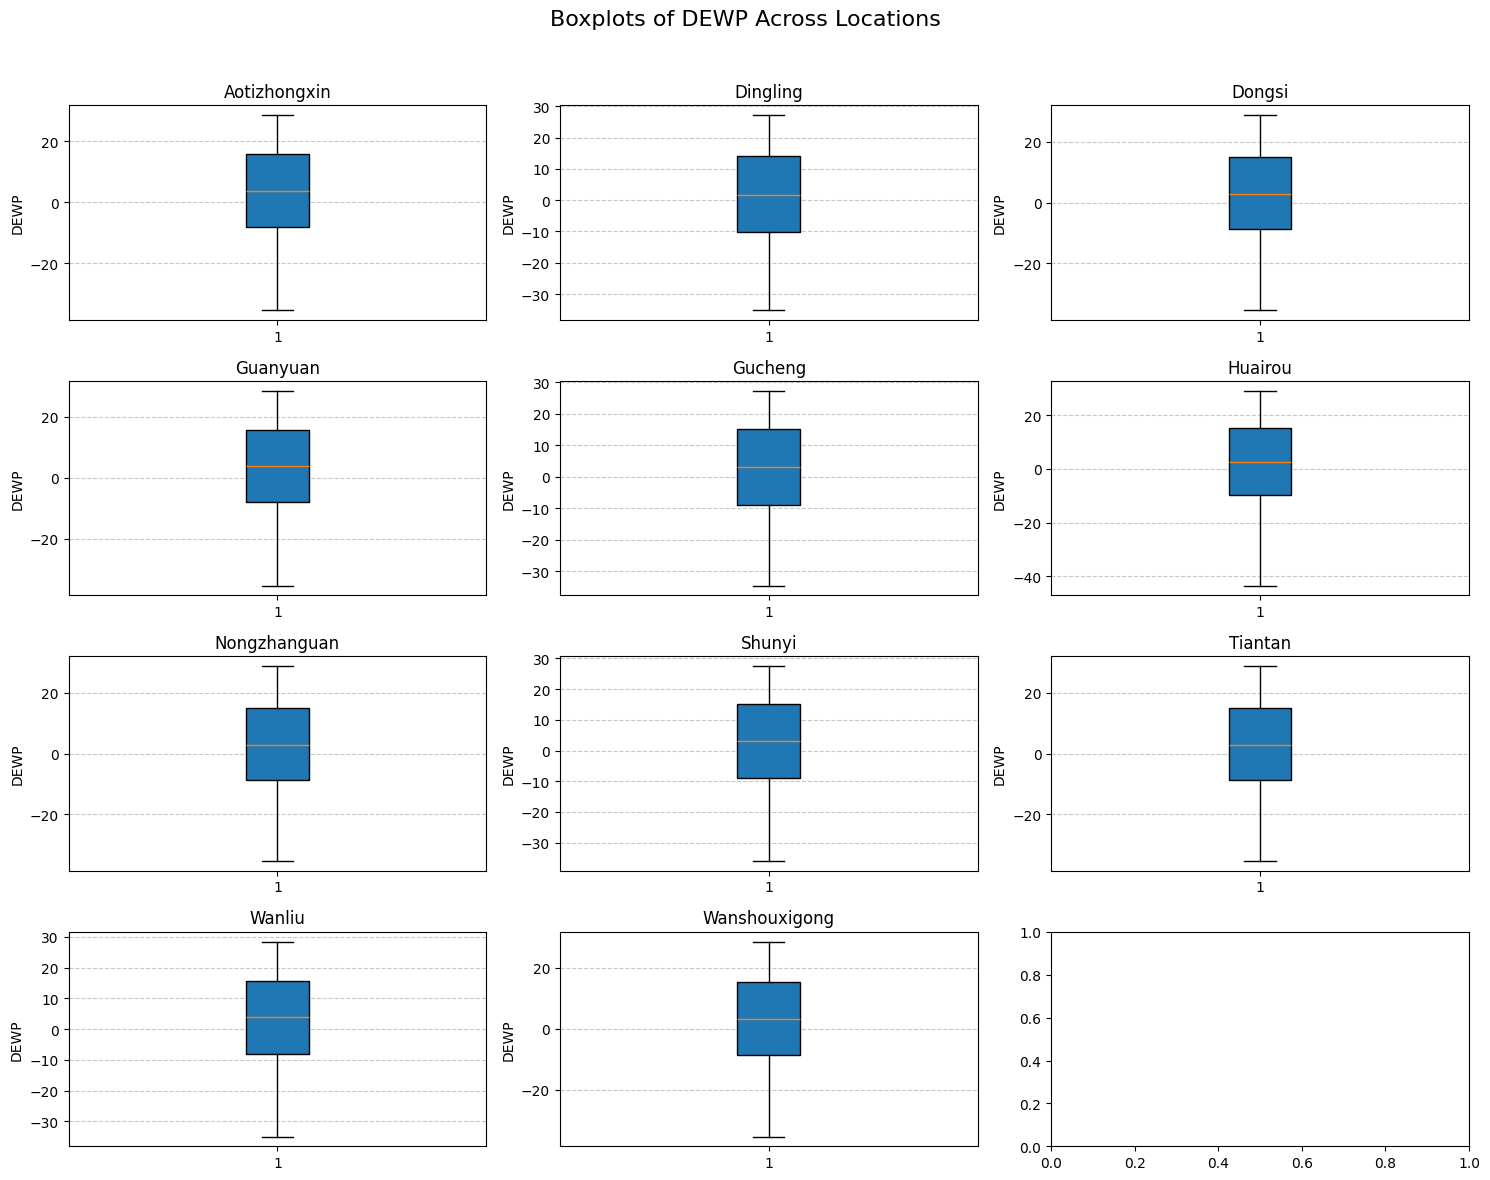

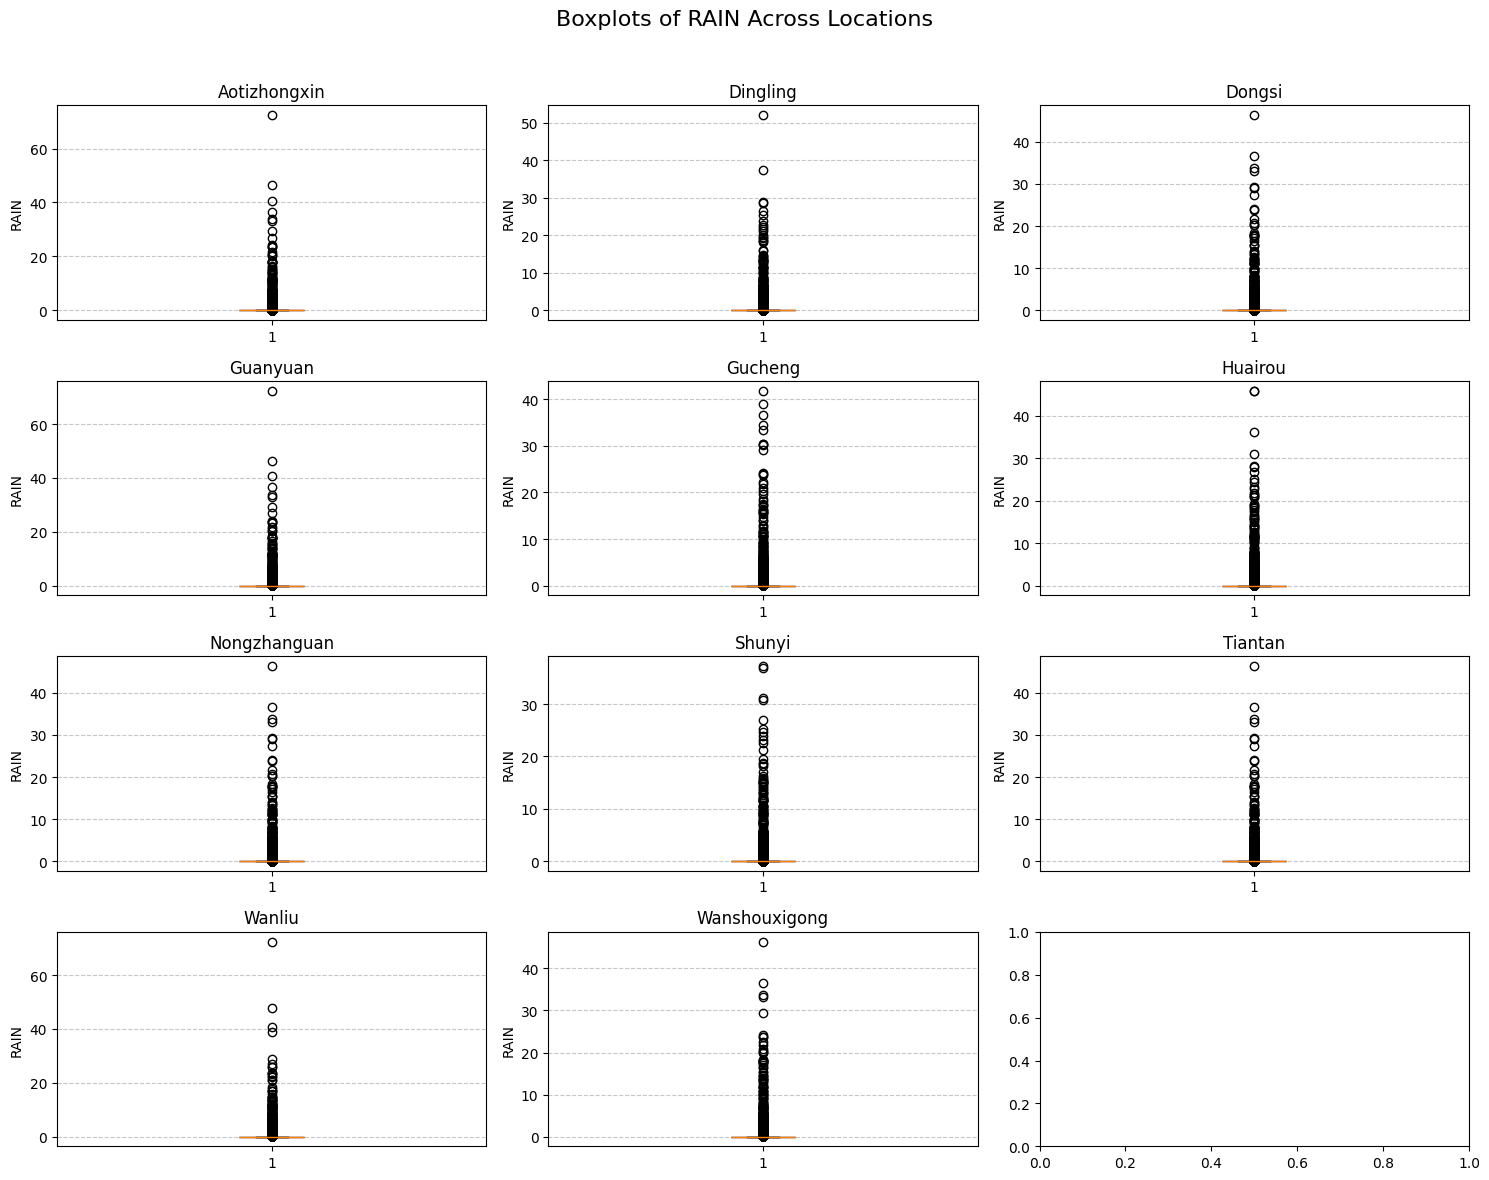

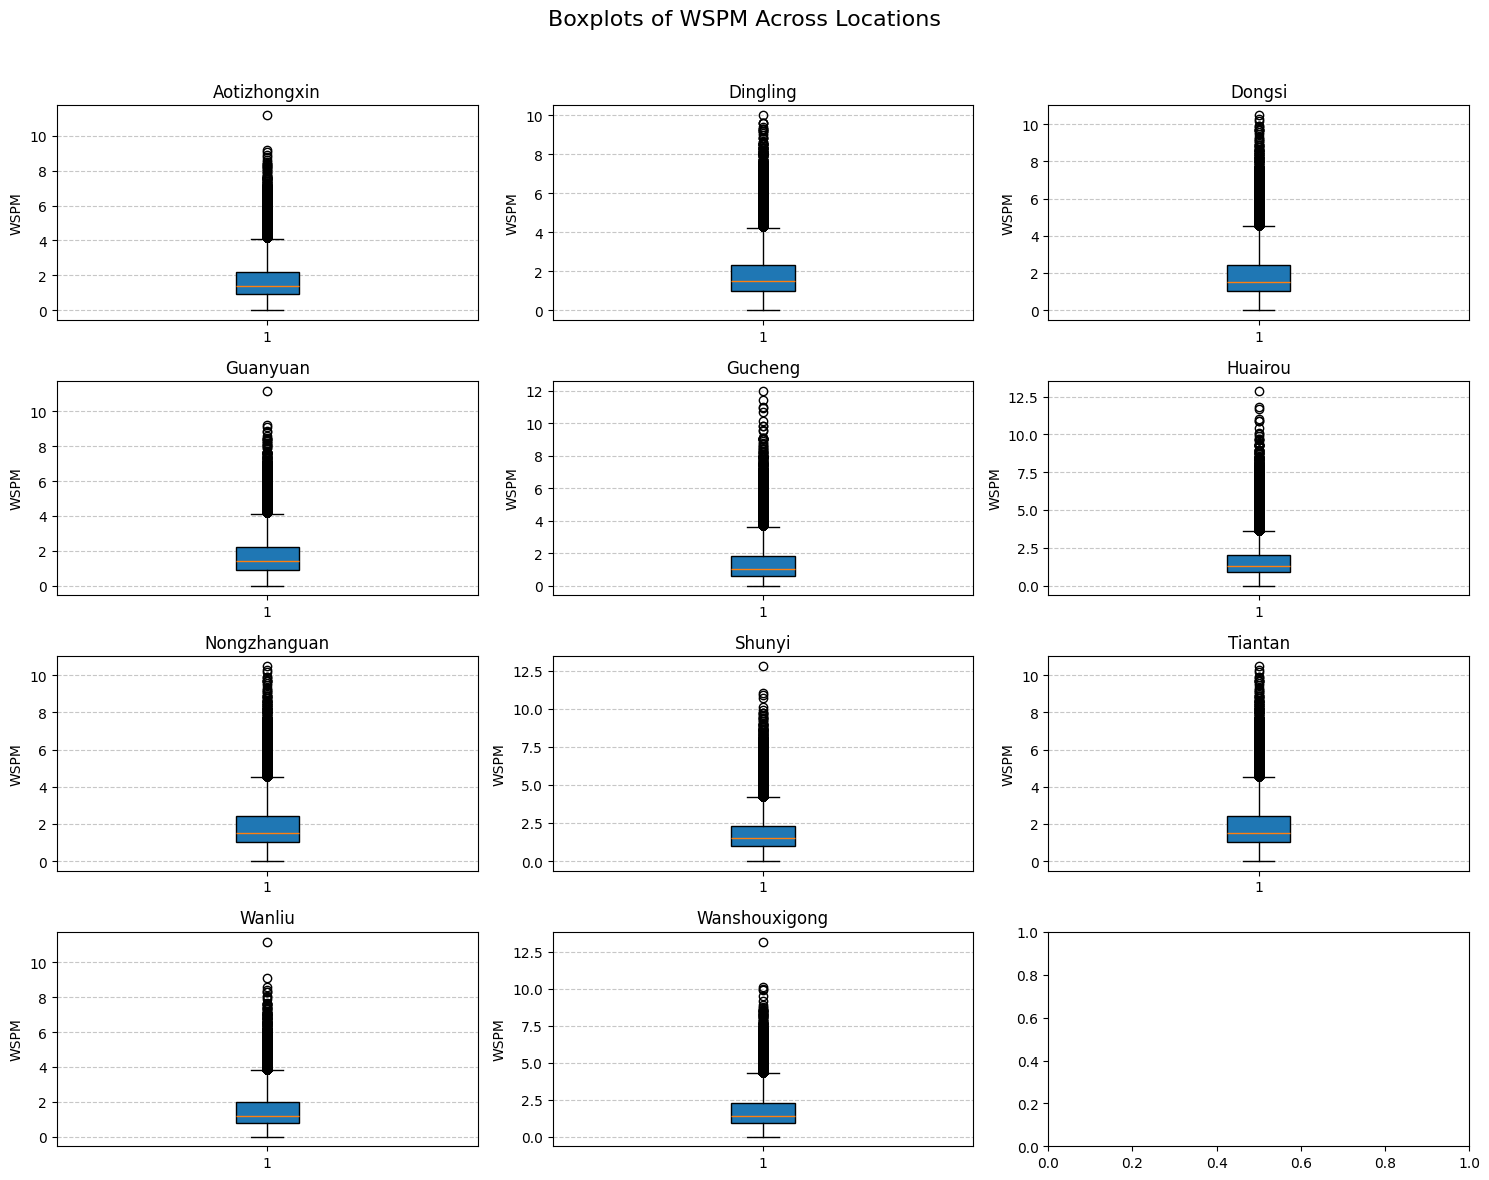

In [14]:
# Assuming dataframes is a dictionary with keys as location names and values as dataframes
plot_boxplots_grouped_by_columns(dataframes)

Dari boxplot tersebut, terlihat bahwa outlier hadir pada kolom polutan udara (PM2.5, PM10, SO2, NO2, CO, dan O3), WSPM (Wind speed) dan Rain. Hal ini perlu dipikir untuk kedepannya tentang 'Apakah dihapus atau dibiarkan saja?'. Hal ini karena bisa memberikan efek kesalahan pada rata-rata, dll.

Sementara saya biarkan saja untuk menunjukkan bahwa ini data sebenarnya. Namun, jika perlu diubah, maka akan saya ubah pada tahapan setelah ini.

Kemudian, saya pindah ke masalah kolom 'RAIN', terlihat bahwa valuenya sangat tersebar dan terlihat bahwa mendekati 0. Apakah benar banyak data yang valuenya 0 ? atau tidak? saya cek dengan function berikut:

In [15]:
# Loop through the dataframes and display the first few rows for each
for location, df in dataframes.items():
    print(f"Dataframe Check in RAIN column for {location}:")
    display(df.loc[df['RAIN'] != 0])
    print("\n")

Dataframe Check in RAIN column for Aotizhongxin:


No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO    O3  \
267      268  2013      3   12     3  117.0  127.0  73.0  81.0     NaN  47.0   
268      269  2013      3   12     4  112.0  140.0  68.0  81.0  1399.0  47.0   
269      270  2013      3   12     5  140.0  237.0  34.0  74.0  2100.0  47.0   
270      271  2013      3   12     6  146.0  165.0  22.0  66.0  2100.0  47.0   
271      272  2013      3   12     7  115.0  121.0  21.0  77.0  2100.0  47.0   
...      ...   ...    ...  ...   ...    ...    ...   ...   ...     ...   ...   
34891  34892  2017      2   21    19   31.0   41.0   2.0  48.0   600.0  48.0   
34892  34893  2017      2   21    20   47.0   52.0   2.0  50.0   800.0  38.0   
34893  34894  2017      2   21    21   67.0   67.0   2.0  57.0   100.0  21.0   
34894  34895  2017      2   21    22   60.0   60.0   2.0  47.0   900.0  32.0   
34895  34896  2017      2   21    23   62.0   62.0   2.0  48.0   100.0  28.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
267     6.4  1005.8  -1.0   0.1    N   2.2  Aotizhongxin  
268     4.3  1006.3   1.5   0.4    E   0.9  Aotizhongxin  
269     4.7  1006.1   1.5   0.1  NNE   1.3  Aotizhongxin  
270     4.1  1006.2   2.6   0.9    W   1.0  Aotizhongxin  
271     3.5  1006.9   2.2   0.9   NW   1.4  Aotizhongxin  
...     ...     ...   ...   ...  ...   ...           ...  
34891  -2.5  1022.6  -4.5   0.4  ESE   1.4  Aotizhongxin  
34892  -2.6  1022.6  -4.3   0.5   SE   1.5  Aotizhongxin  
34893  -2.5  1022.3  -4.1   0.8    S   1.1  Aotizhongxin  
34894  -2.3  1021.9  -4.3   0.4  SSW   1.7  Aotizhongxin  
34895  -2.5  1021.6  -4.8   0.2  SSW   2.0  Aotizhongxin  

[1400 rows x 18 columns]



Dataframe Check in RAIN column for Dingling:


No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO    O3  \
269      270  2013      3   12     5  135.0  171.0  39.0  75.0  1399.0  46.0   
270      271  2013      3   12     6  128.0  186.0  27.0  80.0  1500.0  46.0   
271      272  2013      3   12     7  123.0  138.0  26.0  88.0  1700.0  46.0   
272      273  2013      3   12     8  121.0  138.0  10.0  76.0  1500.0  46.0   
432      433  2013      3   19     0   43.0   77.0  10.0  37.0   800.0  44.0   
...      ...   ...    ...  ...   ...    ...    ...   ...   ...     ...   ...   
34890  34891  2017      2   21    18  110.0  110.0   6.0  90.0  1900.0   2.0   
34891  34892  2017      2   21    19  101.0  101.0   4.0  90.0  1700.0   2.0   
34892  34893  2017      2   21    20   88.0   88.0   3.0  82.0  1400.0   5.0   
34893  34894  2017      2   21    21   85.0   85.0   3.0  84.0  1400.0   3.0   
34894  34895  2017      2   21    22   79.0   79.0   2.0  85.0  1400.0   2.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
269     5.3  1003.2  -0.3   0.2  ESE   1.5  Dingling  
270     3.4  1003.6   0.8   1.5   NW   0.6  Dingling  
271     3.1  1004.0   1.3   0.3  NNW   1.2  Dingling  
272     2.7  1003.8   1.1   0.1  NNE   1.0  Dingling  
432     0.7  1003.0  -2.0   0.1  ESE   2.2  Dingling  
...     ...     ...   ...   ...  ...   ...       ...  
34890  -2.0  1017.1  -3.7   0.1  ESE   2.5  Dingling  
34891  -2.2  1017.1  -3.8   0.3  ESE   2.4  Dingling  
34892  -2.4  1017.0  -3.7   0.5  ESE   2.5  Dingling  
34893  -2.7  1016.8  -3.8   0.6    E   2.2  Dingling  
34894  -2.8  1016.5  -3.9   0.2  ESE   1.7  Dingling  

[1401 rows x 18 columns]



Dataframe Check in RAIN column for Dongsi:


No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO    O3  \
268      269  2013      3   12     4  113.0  141.0  52.0  82.0  1100.0  57.0   
269      270  2013      3   12     5  131.0  160.0  41.0  87.0  1700.0  57.0   
270      271  2013      3   12     6  133.0  143.0  24.0  91.0  2000.0  57.0   
271      272  2013      3   12     7  124.0  144.0  18.0  76.0  1399.0  57.0   
272      273  2013      3   12     8  116.0   92.0  13.0  76.0  1300.0  57.0   
...      ...   ...    ...  ...   ...    ...    ...   ...   ...     ...   ...   
34891  34892  2017      2   21    19   40.0   72.0   4.0  46.0  1200.0  32.0   
34892  34893  2017      2   21    20   66.0   81.0   3.0  56.0  1400.0  15.0   
34893  34894  2017      2   21    21   70.0   70.0   3.0  53.0  1400.0  15.0   
34894  34895  2017      2   21    22   53.0   53.0   3.0  41.0  1100.0  26.0   
34895  34896  2017      2   21    23   68.0   68.0   3.0  39.0   100.0  24.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
268     5.6  1008.6  -0.1   0.5   SE   0.2  Dongsi  
269     4.5  1008.3   0.8   0.3  ESE   1.7  Dongsi  
270     3.8  1008.5   2.0   1.0  ENE   0.0  Dongsi  
271     3.0  1008.8   1.5   2.6  SSW   0.9  Dongsi  
272     3.4  1008.8   2.2   0.3  ENE   1.7  Dongsi  
...     ...     ...   ...   ...  ...   ...     ...  
34891  -2.5  1022.6  -4.5   0.4  ESE   1.4  Dongsi  
34892  -2.6  1022.6  -4.3   0.5   SE   1.5  Dongsi  
34893  -2.5  1022.3  -4.1   0.8    S   1.1  Dongsi  
34894  -2.3  1021.9  -4.3   0.4  SSW   1.7  Dongsi  
34895  -2.5  1021.6  -4.8   0.2  SSW   2.0  Dongsi  

[1391 rows x 18 columns]



Dataframe Check in RAIN column for Guanyuan:


No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO    O3  \
267      268  2013      3   12     3  111.0  129.0  62.0  85.0  1399.0  53.0   
268      269  2013      3   12     4  110.0  132.0  61.0  84.0  1399.0  53.0   
269      270  2013      3   12     5  153.0  217.0  41.0  96.0  2600.0  53.0   
270      271  2013      3   12     6  144.0  155.0  27.0  91.0  2700.0  53.0   
271      272  2013      3   12     7  109.0  120.0  26.0  87.0  2100.0  53.0   
...      ...   ...    ...  ...   ...    ...    ...   ...   ...     ...   ...   
34891  34892  2017      2   21    19   33.0   51.0   4.0  51.0   600.0  30.0   
34892  34893  2017      2   21    20   46.0   61.0   3.0  56.0   700.0  20.0   
34893  34894  2017      2   21    21   68.0   68.0   3.0  59.0   800.0  11.0   
34894  34895  2017      2   21    22   62.0   62.0   2.0  50.0   800.0  21.0   
34895  34896  2017      2   21    23   49.0   49.0   2.0  36.0   800.0  34.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
267     6.4  1005.8  -1.0   0.1    N   2.2  Guanyuan  
268     4.3  1006.3   1.5   0.4    E   0.9  Guanyuan  
269     4.7  1006.1   1.5   0.1  NNE   1.3  Guanyuan  
270     4.1  1006.2   2.6   0.9    W   1.0  Guanyuan  
271     3.5  1006.9   2.2   0.9   NW   1.4  Guanyuan  
...     ...     ...   ...   ...  ...   ...       ...  
34891  -2.5  1022.6  -4.5   0.4  ESE   1.4  Guanyuan  
34892  -2.6  1022.6  -4.3   0.5   SE   1.5  Guanyuan  
34893  -2.5  1022.3  -4.1   0.8    S   1.1  Guanyuan  
34894  -2.3  1021.9  -4.3   0.4  SSW   1.7  Guanyuan  
34895  -2.5  1021.6  -4.8   0.2  SSW   2.0  Guanyuan  

[1400 rows x 18 columns]



Dataframe Check in RAIN column for Gucheng:


No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  \
267      268  2013      3   12     3  118.0  169.0  61.0  104.0  1700.0  53.0   
268      269  2013      3   12     4  128.0  198.0  56.0  103.0  2200.0  53.0   
269      270  2013      3   12     5  141.0  231.0  25.0  105.0  2399.0  53.0   
270      271  2013      3   12     6  148.0  164.0  22.0  106.0  2500.0  53.0   
271      272  2013      3   12     7  146.0  164.0  21.0  104.0  2600.0  53.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   ...   
34891  34892  2017      2   21    19   37.0   52.0   4.0   45.0   700.0  31.0   
34892  34893  2017      2   21    20   49.0   55.0   3.0   52.0   800.0  20.0   
34893  34894  2017      2   21    21   50.0   52.0   3.0   42.0   800.0  28.0   
34894  34895  2017      2   21    22   63.0   63.0   3.0   50.0   900.0  19.0   
34895  34896  2017      2   21    23   63.0   63.0   5.0   39.0   900.0  28.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
267     6.1  1004.1  -1.8   0.1  ESE   1.0  Gucheng  
268     4.3  1004.5   1.2   0.7  ESE   0.7  Gucheng  
269     4.6  1004.2   1.1   0.1  NNW   1.1  Gucheng  
270     4.1  1004.7   1.6   1.3   NW   0.7  Gucheng  
271     3.5  1004.8   1.5   0.8  WNW   0.2  Gucheng  
...     ...     ...   ...   ...  ...   ...      ...  
34891  -2.2  1018.7  -4.9   0.2  SSW   2.3  Gucheng  
34892  -2.4  1018.7  -4.3   0.6    S   2.3  Gucheng  
34893  -2.5  1018.4  -4.2   0.5  SSW   1.5  Gucheng  
34894  -2.4  1018.1  -4.0   0.5    S   1.9  Gucheng  
34895  -2.7  1017.7  -4.4   0.1  SSE   2.3  Gucheng  

[1391 rows x 18 columns]



Dataframe Check in RAIN column for Huairou:


No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO    O3  \
271      272  2013      3   12     7   99.0  109.0  22.0  99.0  1200.0  47.0   
272      273  2013      3   12     8   80.0   83.0  14.0  96.0  1200.0  47.0   
273      274  2013      3   12     9   82.0   87.0   9.0  94.0  1300.0  47.0   
432      433  2013      3   19     0   26.0    6.0  10.0  29.0   600.0  41.0   
433      434  2013      3   19     1    4.0   17.0   9.0  32.0   500.0  36.0   
...      ...   ...    ...  ...   ...    ...    ...   ...   ...     ...   ...   
34894  34895  2017      2   21    22   79.0   79.0   2.0  54.0  2100.0   6.0   
34895  34896  2017      2   21    23   91.0   91.0   2.0  64.0  2200.0   2.0   
34896  34897  2017      2   22     0  107.0  107.0   2.0  66.0   300.0   2.0   
34897  34898  2017      2   22     1  112.0  112.0   2.0  53.0  2300.0   2.0   
34898  34899  2017      2   22     2  111.0  111.0   2.0  40.0  2600.0   2.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
271     2.4  1003.8   2.4   0.8  WNW   1.0  Huairou  
272     2.3  1004.0   2.3   0.3  WNW   0.1  Huairou  
273     2.6  1003.5   2.6   0.3  ENE   1.6  Huairou  
432    -0.6  1003.1  -1.2   0.2  ESE   0.9  Huairou  
433    -0.6  1003.2  -0.9   0.1  NNE   1.2  Huairou  
...     ...     ...   ...   ...  ...   ...      ...  
34894  -3.4  1016.7  -4.5   0.7  WSW   0.8  Huairou  
34895  -3.4  1016.1  -4.5   0.4  WSW   0.8  Huairou  
34896  -3.4  1015.7  -4.5   0.1    N   0.4  Huairou  
34897  -3.5  1015.1  -4.5   0.2   SE   0.8  Huairou  
34898  -3.5  1014.5  -4.5   0.1  SSE   0.6  Huairou  

[1546 rows x 18 columns]



Dataframe Check in RAIN column for Nongzhanguan:


No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO    O3  \
268      269  2013      3   12     4  128.0  146.0  79.0  95.0  2100.0  65.0   
269      270  2013      3   12     5  125.0  186.0  55.0  91.0  2200.0  65.0   
270      271  2013      3   12     6  134.0  135.0  20.0  92.0  2299.0  65.0   
271      272  2013      3   12     7  107.0  114.0  20.0  91.0  2200.0  65.0   
272      273  2013      3   12     8  116.0  114.0  17.0  85.0  1800.0  65.0   
...      ...   ...    ...  ...   ...    ...    ...   ...   ...     ...   ...   
34891  34892  2017      2   21    19   49.0   71.0   5.0  37.0   900.0  28.0   
34892  34893  2017      2   21    20   69.0   71.0   5.0  47.0  1100.0  13.0   
34893  34894  2017      2   21    21   78.0   78.0   4.0  52.0  1200.0   7.0   
34894  34895  2017      2   21    22   52.0   52.0   4.0  32.0   900.0  27.0   
34895  34896  2017      2   21    23   53.0   53.0   5.0  26.0   100.0  31.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
268     5.6  1008.6  -0.1   0.5   SE   0.2  Nongzhanguan  
269     4.5  1008.3   0.8   0.3  ESE   1.7  Nongzhanguan  
270     3.8  1008.5   2.0   1.0  ENE   0.0  Nongzhanguan  
271     3.0  1008.8   1.5   2.6  SSW   0.9  Nongzhanguan  
272     3.4  1008.8   2.2   0.3  ENE   1.7  Nongzhanguan  
...     ...     ...   ...   ...  ...   ...           ...  
34891  -2.5  1022.6  -4.5   0.4  ESE   1.4  Nongzhanguan  
34892  -2.6  1022.6  -4.3   0.5   SE   1.5  Nongzhanguan  
34893  -2.5  1022.3  -4.1   0.8    S   1.1  Nongzhanguan  
34894  -2.3  1021.9  -4.3   0.4  SSW   1.7  Nongzhanguan  
34895  -2.5  1021.6  -4.8   0.2  SSW   2.0  Nongzhanguan  

[1391 rows x 18 columns]



Dataframe Check in RAIN column for Shunyi:


No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO    O3  \
268      269  2013      3   12     4  123.0  159.0  83.0  84.0  1600.0  56.0   
269      270  2013      3   12     5  122.0  168.0  44.0  82.0  1600.0  56.0   
270      271  2013      3   12     6  122.0  138.0  26.0  80.0  1600.0  56.0   
271      272  2013      3   12     7  100.0  115.0  19.0  72.0  1700.0  56.0   
272      273  2013      3   12     8   98.0  103.0  15.0  70.0  1600.0  56.0   
...      ...   ...    ...  ...   ...    ...    ...   ...   ...     ...   ...   
34891  34892  2017      2   21    19   58.0   58.0   6.0  54.0   100.0  29.0   
34892  34893  2017      2   21    20   63.0   63.0   5.0  60.0  1100.0  20.0   
34893  34894  2017      2   21    21   73.0   73.0   4.0  56.0  1200.0  20.0   
34894  34895  2017      2   21    22   85.0   85.0   5.0  62.0  1400.0  13.0   
34895  34896  2017      2   21    23   85.0   85.0   5.0  55.0  1500.0  19.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
268     4.4  1009.0   0.5   0.4   NE   1.5  Shunyi  
269     4.3  1009.0   1.3   0.3   NE   1.5  Shunyi  
270     4.0  1008.9   1.5   0.2  SSW   0.9  Shunyi  
271     3.5  1009.4   1.5   1.2  WNW   0.8  Shunyi  
272     3.3  1009.6   1.5   0.4    N   1.4  Shunyi  
...     ...     ...   ...   ...  ...   ...     ...  
34891  -2.6  1023.4  -4.5   0.3  SSE   2.3  Shunyi  
34892  -2.7  1023.3  -4.3   0.3   SE   2.0  Shunyi  
34893  -2.8  1023.1  -4.1   1.1  SSE   1.9  Shunyi  
34894  -2.8  1022.7  -4.1   0.5  SSE   1.7  Shunyi  
34895  -2.9  1022.3  -4.2   0.3  SSW   1.8  Shunyi  

[1362 rows x 18 columns]



Dataframe Check in RAIN column for Tiantan:


No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO    O3  \
268      269  2013      3   12     4  122.0  143.0  56.0  71.0  1800.0  61.0   
269      270  2013      3   12     5  129.0  182.0  31.0  66.0  2299.0  61.0   
270      271  2013      3   12     6  140.0  142.0  16.0  76.0  2600.0  61.0   
271      272  2013      3   12     7  113.0  119.0  11.0  63.0  2200.0  61.0   
272      273  2013      3   12     8  122.0  119.0   9.0  61.0  1899.0  61.0   
...      ...   ...    ...  ...   ...    ...    ...   ...   ...     ...   ...   
34891  34892  2017      2   21    19   37.0   51.0   3.0  45.0   800.0  43.0   
34892  34893  2017      2   21    20   61.0   67.0   2.0  63.0  1100.0  16.0   
34893  34894  2017      2   21    21   48.0   48.0   2.0  41.0   100.0  38.0   
34894  34895  2017      2   21    22   52.0   52.0   2.0  46.0  1100.0  29.0   
34895  34896  2017      2   21    23   58.0   58.0   3.0  45.0  1100.0  30.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
268     5.6  1008.6  -0.1   0.5   SE   0.2  Tiantan  
269     4.5  1008.3   0.8   0.3  ESE   1.7  Tiantan  
270     3.8  1008.5   2.0   1.0  ENE   0.0  Tiantan  
271     3.0  1008.8   1.5   2.6  SSW   0.9  Tiantan  
272     3.4  1008.8   2.2   0.3  ENE   1.7  Tiantan  
...     ...     ...   ...   ...  ...   ...      ...  
34891  -2.5  1022.6  -4.5   0.4  ESE   1.4  Tiantan  
34892  -2.6  1022.6  -4.3   0.5   SE   1.5  Tiantan  
34893  -2.5  1022.3  -4.1   0.8    S   1.1  Tiantan  
34894  -2.3  1021.9  -4.3   0.4  SSW   1.7  Tiantan  
34895  -2.5  1021.6  -4.8   0.2  SSW   2.0  Tiantan  

[1391 rows x 18 columns]



Dataframe Check in RAIN column for Wanliu:


No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO    O3  \
267      268  2013      3   12     3  117.0  148.0  58.0  78.0     NaN  30.0   
268      269  2013      3   12     4  135.0  232.0  46.0  78.0  2399.0  30.0   
269      270  2013      3   12     5  179.0  233.0  19.0  76.0  3200.0  30.0   
270      271  2013      3   12     6  155.0  169.0  12.0  74.0  2799.0  30.0   
271      272  2013      3   12     7  154.0  170.0  14.0  68.0  3100.0  30.0   
...      ...   ...    ...  ...   ...    ...    ...   ...   ...     ...   ...   
34891  34892  2017      2   21    19   33.0   40.0   2.0  68.0   700.0  23.0   
34892  34893  2017      2   21    20   47.0   48.0   2.0  63.0   700.0  22.0   
34893  34894  2017      2   21    21   60.0   60.0   2.0  70.0   900.0   9.0   
34894  34895  2017      2   21    22   63.0   63.0   2.0  61.0   800.0  16.0   
34895  34896  2017      2   21    23   60.0   60.0   2.0  49.0   800.0  28.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
267     6.4  1005.8  -1.0   0.1    N   2.2  Wanliu  
268     4.3  1006.3   1.5   0.4    E   0.9  Wanliu  
269     4.7  1006.1   1.5   0.1  NNE   1.3  Wanliu  
270     4.1  1006.2   2.6   0.9    W   1.0  Wanliu  
271     3.5  1006.9   2.2   0.9   NW   1.4  Wanliu  
...     ...     ...   ...   ...  ...   ...     ...  
34891  -1.7  1020.7  -4.0   0.2    S   1.3  Wanliu  
34892  -2.1  1020.7  -3.7   0.7  SSW   1.5  Wanliu  
34893  -2.2  1020.4  -3.6   0.9   SW   1.6  Wanliu  
34894  -2.2  1020.1  -3.9   0.4   SW   1.7  Wanliu  
34895  -2.4  1019.8  -4.4   0.2  SSW   1.9  Wanliu  

[1456 rows x 18 columns]



Dataframe Check in RAIN column for Wanshouxigong:


No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO    O3  \
268      269  2013      3   12     4   90.0  102.0  63.0  70.0  1399.0  47.0   
269      270  2013      3   12     5  103.0  194.0  40.0  66.0  1399.0  47.0   
270      271  2013      3   12     6   98.0  118.0  18.0  78.0  2100.0  47.0   
271      272  2013      3   12     7  125.0  119.0  16.0  74.0  2000.0  47.0   
272      273  2013      3   12     8  120.0   84.0  13.0  72.0  1899.0  47.0   
...      ...   ...    ...  ...   ...    ...    ...   ...   ...     ...   ...   
34891  34892  2017      2   21    19   40.0   54.0   3.0  51.0   800.0  29.0   
34892  34893  2017      2   21    20   59.0   64.0   2.0  58.0   900.0  17.0   
34893  34894  2017      2   21    21   62.0   62.0   2.0  49.0   900.0  22.0   
34894  34895  2017      2   21    22   54.0   54.0   2.0  41.0   900.0  28.0   
34895  34896  2017      2   21    23   60.0   60.0   2.0  44.0   900.0  24.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
268     4.7  1005.6   0.1   1.4   NE   1.3  Wanshouxigong  
269     3.7  1005.3   1.7   1.2  ENE   0.6  Wanshouxigong  
270     3.2  1005.9   2.2   1.5  WSW   0.8  Wanshouxigong  
271     2.8  1005.8   1.9   2.0    N   0.0  Wanshouxigong  
272     3.4  1005.7   2.5   0.2   NE   1.7  Wanshouxigong  
...     ...     ...   ...   ...  ...   ...            ...  
34891  -2.5  1022.6  -4.5   0.4  ESE   1.4  Wanshouxigong  
34892  -2.6  1022.6  -4.3   0.5   SE   1.5  Wanshouxigong  
34893  -2.5  1022.3  -4.1   0.8    S   1.1  Wanshouxigong  
34894  -2.3  1021.9  -4.3   0.4  SSW   1.7  Wanshouxigong  
34895  -2.5  1021.6  -4.8   0.2  SSW   2.0  Wanshouxigong  

[1380 rows x 18 columns]

In [16]:
# Loop through the dataframes and display the first few rows for each
for location, df in dataframes.items():
    print(f"Dataframe Check in RAIN column for {location}:")
    display(df.loc[df['RAIN'] >= 30])
    print("\n")

Dataframe Check in RAIN column for Aotizhongxin:


No  year  month  day  hour  PM2.5   PM10     SO2      NO2     CO  \
3927    3928  2013      8   11    15  209.0  146.0  3.4272  37.1593    NaN   
11355  11356  2014      6   17     3  130.0  130.0  4.0000  12.0000  600.0   
20332  20333  2015      6   26     4  112.0  112.0  2.0000  13.0000  600.0   
21093  21094  2015      7   27    21   45.0   45.0  2.0000  19.0000  500.0   
21356  21357  2015      8    7    20   12.0   16.0  2.0000  21.0000  800.0   
30963  30964  2016      9   11     3   75.0   75.0  2.0000  21.0000  600.0   

             O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
3927   158.7222  23.5  1000.4  23.0  72.5  NNE   3.9  Aotizhongxin  
11355  127.0000  18.4   997.6  18.4  40.7  ESE   0.2  Aotizhongxin  
20332       NaN  20.3   995.8  19.5  33.7    E   1.8  Aotizhongxin  
21093  171.0000  22.9  1000.1  22.2  33.1    W   2.9  Aotizhongxin  
21356  141.0000  19.7  1010.5  18.7  36.6  ENE   1.4  Aotizhongxin  
30963   72.0000  19.7  1008.3  18.9  46.4    E   3.4  Aotizhongxin



Dataframe Check in RAIN column for Dingling:


No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO     O3  \
20874  20875  2015      7   18    18   51.0  51.0  2.0  16.0  300.0  120.0   
20899  20900  2015      7   19    19   49.0  49.0  2.0  14.0  400.0   98.0   

       TEMP   PRES  DEWP  RAIN  wd  WSPM   station  
20874  20.7  997.4  19.9  52.1  NE   2.3  Dingling  
20899  22.0  999.2  20.5  37.4   E   3.5  Dingling



Dataframe Check in RAIN column for Dongsi:


No  year  month  day  hour  PM2.5   PM10  SO2   NO2      CO     O3  \
20332  20333  2015      6   26     4  116.0  116.0  2.0  18.0   700.0  103.0   
21093  21094  2015      7   27    21   47.0   47.0  2.0  12.0   800.0  132.0   
21356  21357  2015      8    7    20   28.0   35.0  2.0  17.0   600.0  121.0   
30963  30964  2016      9   11     3   78.0   78.0  5.0  30.0  1100.0   70.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
20332  20.3   995.8  19.5  33.7    E   1.8  Dongsi  
21093  22.9  1000.1  22.2  33.1    W   2.9  Dongsi  
21356  19.7  1010.5  18.7  36.6  ENE   1.4  Dongsi  
30963  19.7  1008.3  18.9  46.4    E   3.4  Dongsi



Dataframe Check in RAIN column for Guanyuan:


No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO     O3  \
3927    3928  2013      8   11    15  211.0  157.0   3.0  24.0  1100.0  194.0   
11355  11356  2014      6   17     3  214.0  214.0  16.0  19.0     NaN  122.0   
20332  20333  2015      6   26     4  108.0  108.0   2.0  15.0   900.0  120.0   
21093  21094  2015      7   27    21   39.0   39.0   2.0   8.0   800.0  148.0   
21356  21357  2015      8    7    20   34.0   47.0   2.0  30.0   700.0  136.0   
30963  30964  2016      9   11     3   56.0   56.0   4.0  59.0  1000.0   45.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
3927   23.5  1000.4  23.0  72.5  NNE   3.9  Guanyuan  
11355  18.4   997.6  18.4  40.7  ESE   0.2  Guanyuan  
20332  20.3   995.8  19.5  33.7    E   1.8  Guanyuan  
21093  22.9  1000.1  22.2  33.1    W   2.9  Guanyuan  
21356  19.7  1010.5  18.7  36.6  ENE   1.4  Guanyuan  
30963  19.7  1008.3  18.9  46.4    E   3.4  Guanyuan



Dataframe Check in RAIN column for Gucheng:


No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO     O3  \
3668    3669  2013      7   31    20   97.0  190.0   3.0  29.0  1000.0  164.0   
3927    3928  2013      8   11    15  242.0  259.0   3.0  31.0  1400.0  151.0   
4491    4492  2013      9    4     3  130.0  132.0  12.0  35.0  1200.0   54.0   
12067  12068  2014      7   16    19  145.0  145.0   2.0  32.0   900.0  200.0   
20839  20840  2015      7   17     7   16.0   16.0   2.0  22.0   400.0   62.0   
22024  22025  2015      9    4    16   20.0   20.0   2.0  26.0  1500.0   83.0   
22025  22026  2015      9    4    17   21.0   21.0   2.0  35.0  1900.0   66.0   
29700  29701  2016      7   20    12    7.0    7.0   2.0  11.0   500.0   68.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
3668   22.2   993.9  21.4  30.3    W   3.2  Gucheng  
3927   25.3   998.4  24.1  34.5  NNW   1.0  Gucheng  
4491   17.9  1008.7  17.1  36.6  SSE   0.7  Gucheng  
12067  20.9   997.0  20.9  39.0    W   1.3  Gucheng  
20839  20.0  1001.0  19.5  33.5  WNW   1.6  Gucheng  
22024  20.4  1003.3  19.4  41.9  ESE   1.1  Gucheng  
22025  19.8  1003.4  18.8  30.5  ESE   0.7  Gucheng  
29700  21.9   993.2  21.1  30.4  NNE   5.4  Gucheng



Dataframe Check in RAIN column for Huairou:


No  year  month  day  hour  PM2.5   PM10  SO2   NO2      CO     O3  \
2877    2878  2013      6   28    21  266.0  391.0  7.0  21.0  2700.0   51.0   
11709  11710  2014      7    1    21   82.0  102.0  4.0  16.0   900.0  175.0   
19967  19968  2015      6   10    23   50.0   50.0  2.0   2.0   700.0   74.0   
28985  28986  2016      6   20    17   59.0   80.0  3.0  14.0   800.0  243.0   

       TEMP   PRES  DEWP  RAIN   wd  WSPM  station  
2877   20.4  993.2  20.4  45.9  ESE   1.3  Huairou  
11709  20.1  997.1  19.6  45.9  SSE   1.7  Huairou  
19967  16.5  989.7  15.5  30.9  ESE   2.7  Huairou  
28985  21.2  992.9  20.5  36.1  ESE   3.3  Huairou



Dataframe Check in RAIN column for Nongzhanguan:


No  year  month  day  hour  PM2.5   PM10  SO2   NO2     CO     O3  \
20332  20333  2015      6   26     4  104.0  104.0  2.0  16.0  900.0  110.0   
21093  21094  2015      7   27    21   46.0   46.0  2.0  16.0  700.0  162.0   
21356  21357  2015      8    7    20   25.0  187.0  2.0  10.0  600.0  152.0   
30963  30964  2016      9   11     3   68.0   68.0  3.0  15.0  700.0   96.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
20332  20.3   995.8  19.5  33.7    E   1.8  Nongzhanguan  
21093  22.9  1000.1  22.2  33.1    W   2.9  Nongzhanguan  
21356  19.7  1010.5  18.7  36.6  ENE   1.4  Nongzhanguan  
30963  19.7  1008.3  18.9  46.4    E   3.4  Nongzhanguan



Dataframe Check in RAIN column for Shunyi:


No  year  month  day  hour  PM2.5   PM10  SO2   NO2      CO     O3  \
2292    2293  2013      6    4    12  181.0  196.0  9.0  44.0  3000.0   74.0   
11709  11710  2014      7    1    21  142.0  142.0  9.0   2.0  1200.0  182.0   
13195  13196  2014      9    1    19    NaN   90.0  2.0  50.0  2100.0   46.0   
21171  21172  2015      7   31     3   11.0   16.0  2.0  21.0   500.0   56.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
2292   17.4  1010.1  16.6  31.2  ENE   4.0  Shunyi  
11709  20.7  1002.0  19.2  37.3   NE   2.8  Shunyi  
13195  19.7  1007.8  17.1  36.9    E   2.7  Shunyi  
21171  21.1  1004.5  20.1  30.9  SSW   2.1  Shunyi



Dataframe Check in RAIN column for Tiantan:


No  year  month  day  hour  PM2.5   PM10  SO2   NO2      CO     O3  \
20332  20333  2015      6   26     4  117.0  117.0  2.0  22.0  1000.0  106.0   
21093  21094  2015      7   27    21   64.0   64.0  2.0  20.0   800.0  144.0   
21356  21357  2015      8    7    20   51.0   51.0  2.0  27.0   700.0  138.0   
30963  30964  2016      9   11     3  108.0  108.0  2.0  31.0  1200.0   68.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
20332  20.3   995.8  19.5  33.7    E   1.8  Tiantan  
21093  22.9  1000.1  22.2  33.1    W   2.9  Tiantan  
21356  19.7  1010.5  18.7  36.6  ENE   1.4  Tiantan  
30963  19.7  1008.3  18.9  46.4    E   3.4  Tiantan



Dataframe Check in RAIN column for Wanliu:


No  year  month  day  hour  PM2.5   PM10      SO2      NO2      CO  \
3927    3928  2013      8   11    15  259.0  175.0  39.6984  47.8349  1400.0   
11355  11356  2014      6   17     3  229.0  229.0  11.0000  16.0000  1000.0   
21356  21357  2015      8    7    20   27.0   27.0   2.0000   9.0000   600.0   
22025  22026  2015      9    4    17   33.0   33.0   2.0000  26.0000  1900.0   

          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM station  
3927   101.0  23.5  1000.4  23.0  72.5  NNE   3.9  Wanliu  
11355  110.0  18.4   997.6  18.4  40.7  ENE   0.2  Wanliu  
21356  141.0  19.9  1008.9  19.1  47.7  SSW   0.9  Wanliu  
22025   60.0  19.4  1005.3  18.4  38.9    W   4.1  Wanliu



Dataframe Check in RAIN column for Wanshouxigong:


No  year  month  day  hour  PM2.5   PM10  SO2   NO2     CO     O3  \
20332  20333  2015      6   26     4  125.0  125.0  2.0  19.0  700.0   91.0   
21093  21094  2015      7   27    21    NaN    5.0  2.0  17.0  900.0  161.0   
21356  21357  2015      8    7    20   54.0   54.0  2.0  20.0  700.0  146.0   
30963  30964  2016      9   11     3   77.0   77.0  2.0  48.0  900.0   32.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
20332  20.3   995.8  19.5  33.7    E   1.8  Wanshouxigong  
21093  22.9  1000.1  22.2  33.1    W   2.9  Wanshouxigong  
21356  19.7  1010.5  18.7  36.6  ENE   1.4  Wanshouxigong  
30963  19.7  1008.3  18.9  46.4    E   3.4  Wanshouxigong

Setelah pengecekan sebelumnya, benar bahwa value kolom 'RAIN' sangat tersebar. Hal ini juga makes sense karena bisa saja terjadi badai sehingga value 'RAIN' meningkat tajam.

Setelah melihat dan menemukan masalah-masalah yang ada, saatnya membersihkan data agar dapat digunakan dan sesuai dengan konteks tujuan. Salah satu kolom yang ada adalah 'wd' atau wind direction. Kolom ini tidak akan saya gunakan pada analisis ini sehingga akan saya drop seperti berikut:

In [17]:
# Dictionary to store the cleaned dataframes
cleaned_dataframes = {}

# Loop through the original dataframes
for location, df in dataframes.items():
    # Drop the 'wd' column
    df_clean = df.drop('wd', axis=1)

    # Store the cleaned dataframe in the new dictionary
    cleaned_dataframes[location] = df_clean

Setelah berhasil di drop, saya akan mengeceknya kembali seperti berikut:

In [18]:
# Loop through the cleaned dataframes and print the columns for each location
for location, df in cleaned_dataframes.items():
    print(f"Columns in the cleaned dataframe for {location}:")
    print(df.columns)
    print("\n")

Columns in the cleaned dataframe for Aotizhongxin:
Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'station'],
      dtype='object')


Columns in the cleaned dataframe for Dingling:
Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'station'],
      dtype='object')


Columns in the cleaned dataframe for Dongsi:
Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'station'],
      dtype='object')


Columns in the cleaned dataframe for Guanyuan:
Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'station'],
      dtype='object')


Columns in the cleaned dataframe for Gucheng:
Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
    

Terlihat bahwa column dari masing-masing dataframe telah benar dan tidak ada 'wd'. Kemudian, data akan saya sortir agar hanya pada timeframe 2015. Hal ini sesuai dengan scope dari pertanyaan yang akan dijawab. Berikut caranya:

In [19]:
# Loop through the cleaned dataframes and filter rows where 'year' is 2015
for location, df in cleaned_dataframes.items():
    # Keep only rows where the 'year' column is 2015
    df_filtered = df[df['year'] == 2015]

    # Update the dataframe in the dictionary with the filtered dataframe
    cleaned_dataframes[location] = df_filtered

Setelah filter berhasil, saya cek kembali agar tidak ada kesalahan. Pengecekan saya lakukan dengan melihat unique yearsnya. Jika benar, maka tahunnya harus mempunyai 1 nilai unik, yaitu 2015. Berikut adalah hasilnya:

In [20]:
# Verify the year values in each dataframe
for location, df in cleaned_dataframes.items():
    print(f"Unique years in the cleaned dataframe for {location}:")
    print(df['year'].unique())
    print("\n")

Unique years in the cleaned dataframe for Aotizhongxin:
[2015]


Unique years in the cleaned dataframe for Dingling:
[2015]


Unique years in the cleaned dataframe for Dongsi:
[2015]


Unique years in the cleaned dataframe for Guanyuan:
[2015]


Unique years in the cleaned dataframe for Gucheng:
[2015]


Unique years in the cleaned dataframe for Huairou:
[2015]


Unique years in the cleaned dataframe for Nongzhanguan:
[2015]


Unique years in the cleaned dataframe for Shunyi:
[2015]


Unique years in the cleaned dataframe for Tiantan:
[2015]


Unique years in the cleaned dataframe for Wanliu:
[2015]


Unique years in the cleaned dataframe for Wanshouxigong:
[2015]




Hasil tersebut berhasil mengkonfirmasi bahwa filter berhasil dilakukan. Kemudian, saatnya untuk mengurus null value pada dataframe. Sebelum itu, saya menggunakan function sebelumnya untuk melihat kembali kolom mana saja yang perlu dilihat dan dikenakan aksi. Berikut adalah hasilnya:

In [21]:
for location, df in cleaned_dataframes.items():
    print(f"Dataframe Null Value Counts for {location}:")
    display(df.isna().sum())
    print("\n")

Dataframe Null Value Counts for Aotizhongxin:


No           0
year         0
month        0
day          0
hour         0
PM2.5      216
PM10       100
SO2        108
NO2        118
CO         165
O3         255
TEMP         2
PRES         2
DEWP         2
RAIN         2
WSPM         2
station      0
dtype: int64



Dataframe Null Value Counts for Dingling:


No           0
year         0
month        0
day          0
hour         0
PM2.5      109
PM10        95
SO2        107
NO2        125
CO         129
O3         157
TEMP        33
PRES        33
DEWP        33
RAIN        34
WSPM        32
station      0
dtype: int64



Dataframe Null Value Counts for Dongsi:


No           0
year         0
month        0
day          0
hour         0
PM2.5      127
PM10        76
SO2         74
NO2         78
CO          75
O3          72
TEMP         2
PRES         2
DEWP         2
RAIN         2
WSPM         2
station      0
dtype: int64



Dataframe Null Value Counts for Guanyuan:


No           0
year         0
month        0
day          0
hour         0
PM2.5      117
PM10        86
SO2         66
NO2         86
CO          68
O3          69
TEMP         2
PRES         2
DEWP         2
RAIN         2
WSPM         2
station      0
dtype: int64



Dataframe Null Value Counts for Gucheng:


No           0
year         0
month        0
day          0
hour         0
PM2.5      166
PM10       109
SO2        107
NO2        191
CO         111
O3         108
TEMP        26
PRES        26
DEWP        26
RAIN        26
WSPM        26
station      0
dtype: int64



Dataframe Null Value Counts for Huairou:


No           0
year         0
month        0
day          0
hour         0
PM2.5      159
PM10        85
SO2        154
NO2        147
CO         126
O3         224
TEMP        31
PRES        31
DEWP        31
RAIN        32
WSPM        32
station      0
dtype: int64



Dataframe Null Value Counts for Nongzhanguan:


No           0
year         0
month        0
day          0
hour         0
PM2.5      254
PM10       141
SO2        138
NO2        142
CO         156
O3         142
TEMP         2
PRES         2
DEWP         2
RAIN         2
WSPM         2
station      0
dtype: int64



Dataframe Null Value Counts for Shunyi:


No           0
year         0
month        0
day          0
hour         0
PM2.5      124
PM10       100
SO2        198
NO2        189
CO         313
O3         206
TEMP        33
PRES        33
DEWP        33
RAIN        33
WSPM        33
station      0
dtype: int64



Dataframe Null Value Counts for Tiantan:


No           0
year         0
month        0
day          0
hour         0
PM2.5      154
PM10       109
SO2        124
NO2        133
CO         133
O3         127
TEMP         2
PRES         2
DEWP         2
RAIN         2
WSPM         2
station      0
dtype: int64



Dataframe Null Value Counts for Wanliu:


No           0
year         0
month        0
day          0
hour         0
PM2.5      147
PM10        95
SO2        184
NO2        665
CO         114
O3         284
TEMP         2
PRES         2
DEWP         2
RAIN         2
WSPM         2
station      0
dtype: int64



Dataframe Null Value Counts for Wanshouxigong:


No           0
year         0
month        0
day          0
hour         0
PM2.5      222
PM10       117
SO2        134
NO2        128
CO         119
O3          98
TEMP         1
PRES         1
DEWP         1
RAIN         1
WSPM         1
station      0
dtype: int64

Didapatkan kolom mana saja yang perlu dikenakan aksi, yaitu: PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', dan 'WSPM'. Awalnya saya ingin menghilangkan valuenya, tetapi tidak bisa karena akan berdampak pada data terutama karena data ini timeframed (berdasarkan waktu). Akan aneh jika ada tanggal dengan data yang kosong saat dilihat dan divisualisasikan.

Dengan pertimbangan tersebut, saya memilih untuk menggunakan function interpolate untuk mengisi data dengan metode interpolasi. Interpolasi yang saya pilih adalah interpolasi linear, yaitu menggunakan data depan dan belakang dalam mengisi datanya. Berikut adalah hasilnya:

In [22]:
# Columns with potential null values
columns_with_nulls = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Loop through each dataframe in the cleaned_dataframes dictionary
for location, df in cleaned_dataframes.items():
    # Interpolate nulls for each specified column
    for column in columns_with_nulls:
        df[column] = df[column].interpolate(method='linear')

    # Update the dataframe in the dictionary with the interpolated values
    cleaned_dataframes[location] = df


C:\Users\HP\AppData\Local\Temp\ipykernel_24460\3023155512.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].interpolate(method='linear')


Setelah interpolasi berhasil dilakukan, saatnya melihat hasilnya seperti berikut:

In [23]:
for location, df in cleaned_dataframes.items():
    print(f"Dataframe Null Value Counts for {location}:")
    display(df.isna().sum())
    print("\n")

Dataframe Null Value Counts for Aotizhongxin:


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
dtype: int64



Dataframe Null Value Counts for Dingling:


No          0
year        0
month       0
day         0
hour        0
PM2.5      10
PM10       10
SO2        10
NO2        10
CO         10
O3         10
TEMP        0
PRES        0
DEWP        0
RAIN        0
WSPM        0
station     0
dtype: int64



Dataframe Null Value Counts for Dongsi:


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
dtype: int64



Dataframe Null Value Counts for Guanyuan:


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
dtype: int64



Dataframe Null Value Counts for Gucheng:


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
dtype: int64



Dataframe Null Value Counts for Huairou:


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
dtype: int64



Dataframe Null Value Counts for Nongzhanguan:


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
dtype: int64



Dataframe Null Value Counts for Shunyi:


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
dtype: int64



Dataframe Null Value Counts for Tiantan:


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
dtype: int64



Dataframe Null Value Counts for Wanliu:


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
dtype: int64



Dataframe Null Value Counts for Wanshouxigong:


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
dtype: int64

Terlihat bahwa lokasi Dingling masih memiliki null value. Perlu dipastikan apa yang terjadi agar bisa diselesaikan masalah ini. Berikut saya cek head dari dataframe dingling:

In [24]:
cleaned_dataframes['Dingling'].head(15)

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
16104  16105  2015      1    1     0    NaN   NaN   NaN   NaN    NaN   NaN   
16105  16106  2015      1    1     1    NaN   NaN   NaN   NaN    NaN   NaN   
16106  16107  2015      1    1     2    NaN   NaN   NaN   NaN    NaN   NaN   
16107  16108  2015      1    1     3    NaN   NaN   NaN   NaN    NaN   NaN   
16108  16109  2015      1    1     4    NaN   NaN   NaN   NaN    NaN   NaN   
16109  16110  2015      1    1     5    NaN   NaN   NaN   NaN    NaN   NaN   
16110  16111  2015      1    1     6    NaN   NaN   NaN   NaN    NaN   NaN   
16111  16112  2015      1    1     7    NaN   NaN   NaN   NaN    NaN   NaN   
16112  16113  2015      1    1     8    NaN   NaN   NaN   NaN    NaN   NaN   
16113  16114  2015      1    1     9    NaN   NaN   NaN   NaN    NaN   NaN   
16114  16115  2015      1    1    10    6.0  17.0   7.0   2.0  200.0  56.0   
16115  16116  2015      1    1    11    9.0  17.0  14.0   5.0  300.0  53.0   
16116  16117  2015      1    1    12    9.0  14.0  22.0   5.0  300.0  56.0   
16117  16118  2015      1    1    13   11.0  20.0  21.0   6.0  300.0  59.0   
16118  16119  2015      1    1    14   38.0  63.0  26.0  30.0  800.0  43.0   

       TEMP    PRES  DEWP  RAIN  WSPM   station  
16104  -4.0  1025.0 -23.7   0.0   3.3  Dingling  
16105  -2.0  1022.0 -22.6   0.0   1.2  Dingling  
16106  -5.0  1022.0 -23.5   0.0   1.7  Dingling  
16107  -5.0  1023.0 -23.5   0.0   1.7  Dingling  
16108  -5.0  1024.0 -24.0   0.0   1.8  Dingling  
16109  -5.0  1024.0 -24.0   0.0   2.2  Dingling  
16110  -6.0  1027.0 -24.9   0.0   1.5  Dingling  
16111  -6.0  1026.0 -24.9   0.0   1.0  Dingling  
16112  -6.0  1024.0 -24.9   0.0   2.0  Dingling  
16113  -5.0  1027.0 -24.6   0.0   1.4  Dingling  
16114  -1.0  1023.0 -23.7   0.0   0.6  Dingling  
16115   1.0  1024.0 -24.4   0.0   2.6  Dingling  
16116   2.0  1024.0 -22.8   0.0   3.1  Dingling  
16117   3.0  1017.0 -22.8   0.0   2.0  Dingling  
16118   3.0  1019.0 -22.8   0.0   1.6  Dingling

Hasilnya menunjukkan nilai null value seperti diatas. Setelah saya lihat pada proses sebelumnya, ternyata dataframe dingling awalnya memilki value NAN pada 10 baris awal. Oleh karena itu setelah dilakukan interpolasi, tetap saja hasilnya NAN. Agar masalah ini dapat diselesaikan, saya mencoba cara filling data kosong dengan backward filling. Backward filling akan mengisi data dari belakang sehingga tidak akan bermasalah jika data null-nya di awal. Berikut adalah codenya:

In [25]:
cleaned_dataframes['Dingling'] = cleaned_dataframes['Dingling'].fillna(method='bfill')

C:\Users\HP\AppData\Local\Temp\ipykernel_24460\2456107373.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_dataframes['Dingling'] = cleaned_dataframes['Dingling'].fillna(method='bfill')


Setelah filling berhasil dieksekusi, saatnya mengecek dataframe tersebut seperti berikut:

In [26]:
cleaned_dataframes['Dingling'].isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
dtype: int64

Dataframe berhasil diisi dan semua data siap untuk tahap berikutnya

## Exploratory Data Analysis (EDA)

### Explore ...

Dengan data bersih, eksplorasi akan dapat dilakukan dengan lebih efektif. Awalnya saya melakukan eksplorasi statistik terlebih dahulu dengan argumen 'all' agar terlihat semua kolomnya. Berikut adalah hasilnya:

In [27]:
# Loop through the dataframes and display the first few rows for each
for location, df in cleaned_dataframes.items():
    print(f"Dataframe Statistics for {location}:")
    display(df.describe(include='all'))
    print("\n")

Dataframe Statistics for Aotizhongxin:


No    year        month          day         hour  \
count    8760.000000  8760.0  8760.000000  8760.000000  8760.000000   
unique           NaN     NaN          NaN          NaN          NaN   
top              NaN     NaN          NaN          NaN          NaN   
freq             NaN     NaN          NaN          NaN          NaN   
mean    20484.500000  2015.0     6.526027    15.720548    11.500000   
std      2528.938512     0.0     3.448048     8.796749     6.922582   
min     16105.000000  2015.0     1.000000     1.000000     0.000000   
25%     18294.750000  2015.0     4.000000     8.000000     5.750000   
50%     20484.500000  2015.0     7.000000    16.000000    11.500000   
75%     22674.250000  2015.0    10.000000    23.000000    17.250000   
max     24864.000000  2015.0    12.000000    31.000000    23.000000   

              PM2.5         PM10          SO2          NO2            CO  \
count   8760.000000  8760.000000  8760.000000  8760.000000   8760.000000   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean      81.831724   112.176747    14.354195    60.939047   1436.889269   
std       85.115005   100.848236    18.017017    39.203161   1511.817773   
min        3.000000     3.000000     2.000000     2.000000    100.000000   
25%       21.000000    36.000000     3.000000    32.000000    600.000000   
50%       55.000000    87.000000     7.000000    53.000000    900.000000   
75%      113.000000   159.000000    18.000000    84.000000   1700.000000   
max      657.000000   984.000000   161.000000   290.000000  10000.000000   

                 O3         TEMP         PRES         DEWP         RAIN  \
count   8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      63.604132    13.474687  1012.571857     2.731901     0.072671   
std       61.612688    11.344323    10.148315    13.021739     0.887151   
min        2.000000   -10.000000   987.500000   -31.900000     0.000000   
25%       13.000000     3.000000  1004.600000    -8.100000     0.000000   
50%       49.833333    14.700000  1012.000000     3.600000     0.000000   
75%       91.000000    23.300000  1021.000000    14.500000     0.000000   
max      423.000000    38.800000  1038.500000    25.700000    36.600000   

               WSPM       station  
count   8760.000000          8760  
unique          NaN             1  
top             NaN  Aotizhongxin  
freq            NaN          8760  
mean       1.895394           NaN  
std        1.256144           NaN  
min        0.000000           NaN  
25%        1.000000           NaN  
50%        1.600000           NaN  
75%        2.400000           NaN  
max       11.200000           NaN



Dataframe Statistics for Dingling:


No    year        month          day         hour  \
count    8760.000000  8760.0  8760.000000  8760.000000  8760.000000   
unique           NaN     NaN          NaN          NaN          NaN   
top              NaN     NaN          NaN          NaN          NaN   
freq             NaN     NaN          NaN          NaN          NaN   
mean    20484.500000  2015.0     6.526027    15.720548    11.500000   
std      2528.938512     0.0     3.448048     8.796749     6.922582   
min     16105.000000  2015.0     1.000000     1.000000     0.000000   
25%     18294.750000  2015.0     4.000000     8.000000     5.750000   
50%     20484.500000  2015.0     7.000000    16.000000    11.500000   
75%     22674.250000  2015.0    10.000000    23.000000    17.250000   
max     24864.000000  2015.0    12.000000    31.000000    23.000000   

              PM2.5         PM10          SO2          NO2           CO  \
count   8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      64.352705    85.366244    11.324600    26.821221   963.892694   
std       72.658316    85.789504    13.496657    24.891696  1011.606404   
min        3.000000     3.000000     2.000000     2.000000   100.000000   
25%       14.000000    25.000000     2.000000     9.000000   300.000000   
50%       38.000000    59.000000     6.000000    18.000000   600.000000   
75%       90.000000   121.000000    14.000000    37.000000  1200.000000   
max      647.000000   905.000000   111.000000   186.000000  9400.000000   

                 O3         TEMP         PRES         DEWP         RAIN  \
count   8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      71.161045    13.567626  1007.882546     1.781102     0.082374   
std       56.303608    11.208193    10.159987    13.250304     1.030111   
min        2.000000   -10.300000   982.400000   -32.300000     0.000000   
25%       31.000000     3.000000   999.900000    -9.300000     0.000000   
50%       65.000000    14.700000  1007.500000     2.400000     0.000000   
75%       95.000000    23.200000  1016.600000    14.100000     0.000000   
max      432.000000    39.200000  1033.100000    24.600000    52.100000   

               WSPM   station  
count   8760.000000      8760  
unique          NaN         1  
top             NaN  Dingling  
freq            NaN      8760  
mean       1.842466       NaN  
std        1.260053       NaN  
min        0.000000       NaN  
25%        1.000000       NaN  
50%        1.500000       NaN  
75%        2.200000       NaN  
max        9.600000       NaN



Dataframe Statistics for Dongsi:


No    year        month          day         hour  \
count    8760.000000  8760.0  8760.000000  8760.000000  8760.000000   
unique           NaN     NaN          NaN          NaN          NaN   
top              NaN     NaN          NaN          NaN          NaN   
freq             NaN     NaN          NaN          NaN          NaN   
mean    20484.500000  2015.0     6.526027    15.720548    11.500000   
std      2528.938512     0.0     3.448048     8.796749     6.922582   
min     16105.000000  2015.0     1.000000     1.000000     0.000000   
25%     18294.750000  2015.0     4.000000     8.000000     5.750000   
50%     20484.500000  2015.0     7.000000    16.000000    11.500000   
75%     22674.250000  2015.0    10.000000    23.000000    17.250000   
max     24864.000000  2015.0    12.000000    31.000000    23.000000   

              PM2.5         PM10          SO2          NO2            CO  \
count   8760.000000  8760.000000  8760.000000  8760.000000   8760.000000   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean      87.128659   112.116832    15.202015    50.321912   1338.498858   
std       91.926170   102.896522    17.966107    32.629259   1303.428614   
min        3.000000     3.000000     2.000000     4.000000    100.000000   
25%       22.000000    37.000000     2.000000    25.000000    500.000000   
50%       58.000000    85.500000     8.000000    42.000000    900.000000   
75%      117.000000   152.000000    21.000000    69.000000   1600.000000   
max      685.000000   816.000000   145.000000   256.000000  10000.000000   

                 O3         TEMP         PRES         DEWP         RAIN  \
count   8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      55.875063    13.428637  1012.793381     2.687934     0.072865   
std       53.558568    11.387348    10.332089    13.087599     0.887306   
min        2.000000   -10.000000   987.500000   -31.900000     0.000000   
25%       11.000000     2.900000  1004.600000    -8.000000     0.000000   
50%       43.000000    14.700000  1012.300000     3.600000     0.000000   
75%       80.000000    23.300000  1021.800000    14.500000     0.000000   
max      308.000000    38.800000  1038.500000    25.700000    36.600000   

               WSPM station  
count   8760.000000    8760  
unique          NaN       1  
top             NaN  Dongsi  
freq            NaN    8760  
mean       1.934566     NaN  
std        1.299885     NaN  
min        0.000000     NaN  
25%        1.100000     NaN  
50%        1.600000     NaN  
75%        2.500000     NaN  
max        9.800000     NaN



Dataframe Statistics for Guanyuan:


No    year        month          day         hour  \
count    8760.000000  8760.0  8760.000000  8760.000000  8760.000000   
unique           NaN     NaN          NaN          NaN          NaN   
top              NaN     NaN          NaN          NaN          NaN   
freq             NaN     NaN          NaN          NaN          NaN   
mean    20484.500000  2015.0     6.526027    15.720548    11.500000   
std      2528.938512     0.0     3.448048     8.796749     6.922582   
min     16105.000000  2015.0     1.000000     1.000000     0.000000   
25%     18294.750000  2015.0     4.000000     8.000000     5.750000   
50%     20484.500000  2015.0     7.000000    16.000000    11.500000   
75%     22674.250000  2015.0    10.000000    23.000000    17.250000   
max     24864.000000  2015.0    12.000000    31.000000    23.000000   

              PM2.5         PM10          SO2          NO2            CO  \
count   8760.000000  8760.000000  8760.000000  8760.000000   8760.000000   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean      82.130183   106.321067    14.073579    54.921958   1313.704338   
std       84.708243    94.297372    18.735104    35.534007   1307.228616   
min        3.000000     3.000000     2.000000     2.000000    100.000000   
25%       23.000000    36.000000     2.000000    28.000000    500.000000   
50%       56.000000    83.000000     6.000000    46.000000    900.000000   
75%      110.000000   148.000000    18.000000    75.000000   1500.000000   
max      680.000000   961.000000   157.000000   239.000000  10000.000000   

                 O3         TEMP         PRES         DEWP         RAIN  \
count   8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      56.842614    13.474687  1012.571857     2.731901     0.072671   
std       58.924890    11.344323    10.148315    13.021739     0.887151   
min        2.000000   -10.000000   987.500000   -31.900000     0.000000   
25%        7.000000     3.000000  1004.600000    -8.100000     0.000000   
50%       41.000000    14.700000  1012.000000     3.600000     0.000000   
75%       81.000000    23.300000  1021.000000    14.500000     0.000000   
max      352.000000    38.800000  1038.500000    25.700000    36.600000   

               WSPM   station  
count   8760.000000      8760  
unique          NaN         1  
top             NaN  Guanyuan  
freq            NaN      8760  
mean       1.895394       NaN  
std        1.256144       NaN  
min        0.000000       NaN  
25%        1.000000       NaN  
50%        1.600000       NaN  
75%        2.400000       NaN  
max       11.200000       NaN



Dataframe Statistics for Gucheng:


No    year        month          day         hour  \
count    8760.000000  8760.0  8760.000000  8760.000000  8760.000000   
unique           NaN     NaN          NaN          NaN          NaN   
top              NaN     NaN          NaN          NaN          NaN   
freq             NaN     NaN          NaN          NaN          NaN   
mean    20484.500000  2015.0     6.526027    15.720548    11.500000   
std      2528.938512     0.0     3.448048     8.796749     6.922582   
min     16105.000000  2015.0     1.000000     1.000000     0.000000   
25%     18294.750000  2015.0     4.000000     8.000000     5.750000   
50%     20484.500000  2015.0     7.000000    16.000000    11.500000   
75%     22674.250000  2015.0    10.000000    23.000000    17.250000   
max     24864.000000  2015.0    12.000000    31.000000    23.000000   

              PM2.5         PM10          SO2          NO2           CO  \
count   8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      83.685051   116.366929    13.338265    49.588271  1323.144977   
std       87.826412    99.713126    17.810399    32.909820  1316.065494   
min        3.000000     3.000000     2.000000     2.000000   100.000000   
25%       23.000000    42.000000     2.000000    24.000000   500.000000   
50%       56.000000    91.000000     5.000000    43.000000   900.000000   
75%      113.000000   165.000000    17.000000    69.000000  1600.000000   
max      741.000000   941.000000   248.000000   216.000000  9900.000000   

                 O3         TEMP         PRES         DEWP         RAIN  \
count   8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      60.779538    14.027483  1009.157249     3.127620     0.080685   
std       60.417993    11.118926    10.232585    13.017313     0.948240   
min        2.000000    -9.300000   984.000000   -29.300000     0.000000   
25%        9.000000     3.500000  1001.100000    -7.700000     0.000000   
50%       48.000000    15.000000  1008.700000     3.900000     0.000000   
75%       89.000000    23.600000  1018.000000    15.000000     0.000000   
max      450.000000    39.300000  1035.000000    26.200000    41.900000   

               WSPM  station  
count   8760.000000     8760  
unique          NaN        1  
top             NaN  Gucheng  
freq            NaN     8760  
mean       1.112112      NaN  
std        0.841779      NaN  
min        0.000000      NaN  
25%        0.600000      NaN  
50%        0.900000      NaN  
75%        1.500000      NaN  
max        7.900000      NaN



Dataframe Statistics for Huairou:


No    year        month          day         hour  \
count    8760.000000  8760.0  8760.000000  8760.000000  8760.000000   
unique           NaN     NaN          NaN          NaN          NaN   
top              NaN     NaN          NaN          NaN          NaN   
freq             NaN     NaN          NaN          NaN          NaN   
mean    20484.500000  2015.0     6.526027    15.720548    11.500000   
std      2528.938512     0.0     3.448048     8.796749     6.922582   
min     16105.000000  2015.0     1.000000     1.000000     0.000000   
25%     18294.750000  2015.0     4.000000     8.000000     5.750000   
50%     20484.500000  2015.0     7.000000    16.000000    11.500000   
75%     22674.250000  2015.0    10.000000    23.000000    17.250000   
max     24864.000000  2015.0    12.000000    31.000000    23.000000   

              PM2.5         PM10          SO2          NO2            CO  \
count   8760.000000  8760.000000  8760.000000  8760.000000   8760.000000   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean      70.500148    90.165559     8.662831    28.316707   1038.784247   
std       73.833747    88.166105    12.852344    24.465991   1005.732276   
min        3.000000     3.000000     2.000000     2.000000    100.000000   
25%       18.000000    28.000000     2.000000    10.000000    400.000000   
50%       46.000000    65.000000     3.000000    21.000000    700.000000   
75%       99.000000   128.000000    10.000000    41.000000   1300.000000   
max      762.000000   991.000000   314.000000   162.000000  10000.000000   

                 O3         TEMP         PRES         DEWP         RAIN  \
count   8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      60.640691    12.408231  1007.899660     2.449589     0.080788   
std       55.805599    11.605422    10.141493    13.476255     0.907044   
min        2.000000   -13.800000   982.800000   -33.400000     0.000000   
25%       19.000000     2.000000  1000.000000    -8.900000     0.000000   
50%       49.000000    13.500000  1007.400000     3.400000     0.000000   
75%       83.000000    22.300000  1016.400000    14.900000     0.000000   
max      413.000000    39.000000  1033.400000    26.200000    30.900000   

               WSPM  station  
count   8760.000000     8760  
unique          NaN        1  
top             NaN  Huairou  
freq            NaN     8760  
mean       1.734543      NaN  
std        1.216089      NaN  
min        0.000000      NaN  
25%        0.900000      NaN  
50%        1.400000      NaN  
75%        2.100000      NaN  
max        9.900000      NaN



Dataframe Statistics for Nongzhanguan:


No    year        month          day         hour  \
count    8760.000000  8760.0  8760.000000  8760.000000  8760.000000   
unique           NaN     NaN          NaN          NaN          NaN   
top              NaN     NaN          NaN          NaN          NaN   
freq             NaN     NaN          NaN          NaN          NaN   
mean    20484.500000  2015.0     6.526027    15.720548    11.500000   
std      2528.938512     0.0     3.448048     8.796749     6.922582   
min     16105.000000  2015.0     1.000000     1.000000     0.000000   
25%     18294.750000  2015.0     4.000000     8.000000     5.750000   
50%     20484.500000  2015.0     7.000000    16.000000    11.500000   
75%     22674.250000  2015.0    10.000000    23.000000    17.250000   
max     24864.000000  2015.0    12.000000    31.000000    23.000000   

              PM2.5         PM10          SO2          NO2            CO  \
count   8760.000000  8760.000000  8760.000000  8760.000000   8760.000000   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean      85.178584   106.989172    15.809857    58.249709   1382.773973   
std       90.678787    97.261316    19.844685    38.371024   1415.844147   
min        3.000000     3.000000     2.000000     3.000000    100.000000   
25%       21.000000    34.000000     2.000000    28.000000    500.000000   
50%       55.000000    80.000000     8.000000    48.000000    900.000000   
75%      116.000000   149.000000    20.000000    80.000000   1600.000000   
max      667.000000   899.000000   168.000000   265.000000  10000.000000   

                 O3         TEMP         PRES         DEWP         RAIN  \
count   8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      61.365702    13.428637  1012.793381     2.687934     0.072865   
std       59.435547    11.387348    10.332089    13.087599     0.887306   
min        2.000000   -10.000000   987.500000   -31.900000     0.000000   
25%       12.000000     2.900000  1004.600000    -8.000000     0.000000   
50%       47.928571    14.700000  1012.300000     3.600000     0.000000   
75%       87.000000    23.300000  1021.800000    14.500000     0.000000   
max      364.000000    38.800000  1038.500000    25.700000    36.600000   

               WSPM       station  
count   8760.000000          8760  
unique          NaN             1  
top             NaN  Nongzhanguan  
freq            NaN          8760  
mean       1.934566           NaN  
std        1.299885           NaN  
min        0.000000           NaN  
25%        1.100000           NaN  
50%        1.600000           NaN  
75%        2.500000           NaN  
max        9.800000           NaN



Dataframe Statistics for Shunyi:


No    year        month          day         hour  \
count    8760.000000  8760.0  8760.000000  8760.000000  8760.000000   
unique           NaN     NaN          NaN          NaN          NaN   
top              NaN     NaN          NaN          NaN          NaN   
freq             NaN     NaN          NaN          NaN          NaN   
mean    20484.500000  2015.0     6.526027    15.720548    11.500000   
std      2528.938512     0.0     3.448048     8.796749     6.922582   
min     16105.000000  2015.0     1.000000     1.000000     0.000000   
25%     18294.750000  2015.0     4.000000     8.000000     5.750000   
50%     20484.500000  2015.0     7.000000    16.000000    11.500000   
75%     22674.250000  2015.0    10.000000    23.000000    17.250000   
max     24864.000000  2015.0    12.000000    31.000000    23.000000   

              PM2.5        PM10          SO2          NO2            CO  \
count   8760.000000  8760.00000  8760.000000  8760.000000   8760.000000   
unique          NaN         NaN          NaN          NaN           NaN   
top             NaN         NaN          NaN          NaN           NaN   
freq            NaN         NaN          NaN          NaN           NaN   
mean      81.456119   100.41278    10.454298    43.097306   1188.407534   
std       86.170584    97.84882    15.042095    30.055396   1285.703036   
min        3.000000     3.00000     2.000000     2.000000    100.000000   
25%       20.000000    30.00000     2.000000    19.000000    400.000000   
50%       54.000000    74.00000     3.000000    37.000000    800.000000   
75%      113.000000   140.00000    12.000000    60.000000   1400.000000   
max      689.000000   999.00000   160.000000   238.000000  10000.000000   

                 O3        TEMP         PRES         DEWP         RAIN  \
count   8760.000000  8760.00000  8760.000000  8760.000000  8760.000000   
unique          NaN         NaN          NaN          NaN          NaN   
top             NaN         NaN          NaN          NaN          NaN   
freq            NaN         NaN          NaN          NaN          NaN   
mean      51.667546    13.25133  1013.524499     2.676164     0.076296   
std       52.375339    11.33300    10.370138    13.152165     0.876420   
min        2.000000   -11.20000   988.400000   -31.500000     0.000000   
25%       10.000000     2.97500  1005.300000    -8.100000     0.000000   
50%       39.000000    14.50000  1013.000000     3.750000     0.000000   
75%       74.000000    23.00000  1022.225000    14.700000     0.000000   
max      340.000000    39.00000  1039.400000    25.400000    30.900000   

               WSPM station  
count   8760.000000    8760  
unique          NaN       1  
top             NaN  Shunyi  
freq            NaN    8760  
mean       1.774355     NaN  
std        1.227949     NaN  
min        0.000000     NaN  
25%        1.000000     NaN  
50%        1.400000     NaN  
75%        2.200000     NaN  
max        9.500000     NaN



Dataframe Statistics for Tiantan:


No    year        month          day         hour  \
count    8760.000000  8760.0  8760.000000  8760.000000  8760.000000   
unique           NaN     NaN          NaN          NaN          NaN   
top              NaN     NaN          NaN          NaN          NaN   
freq             NaN     NaN          NaN          NaN          NaN   
mean    20484.500000  2015.0     6.526027    15.720548    11.500000   
std      2528.938512     0.0     3.448048     8.796749     6.922582   
min     16105.000000  2015.0     1.000000     1.000000     0.000000   
25%     18294.750000  2015.0     4.000000     8.000000     5.750000   
50%     20484.500000  2015.0     7.000000    16.000000    11.500000   
75%     22674.250000  2015.0    10.000000    23.000000    17.250000   
max     24864.000000  2015.0    12.000000    31.000000    23.000000   

              PM2.5         PM10          SO2          NO2            CO  \
count   8760.000000  8760.000000  8760.000000  8760.000000   8760.000000   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean      82.076450   102.863676    11.804817    52.020753   1302.374429   
std       85.856854    92.458642    15.659755    31.104875   1295.082825   
min        3.000000     3.000000     2.000000     3.000000    100.000000   
25%       21.000000    35.000000     2.000000    28.000000    500.000000   
50%       55.000000    79.000000     6.000000    44.000000    900.000000   
75%      110.000000   139.000000    14.000000    69.000000   1500.000000   
max      671.000000   887.000000   227.000000   218.000000  10000.000000   

                 O3         TEMP         PRES         DEWP         RAIN  \
count   8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      60.362877    13.428637  1012.793381     2.687934     0.072865   
std       61.712501    11.387348    10.332089    13.087599     0.887306   
min        2.000000   -10.000000   987.500000   -31.900000     0.000000   
25%        9.000000     2.900000  1004.600000    -8.000000     0.000000   
50%       44.000000    14.700000  1012.300000     3.600000     0.000000   
75%       89.000000    23.300000  1021.800000    14.500000     0.000000   
max      360.000000    38.800000  1038.500000    25.700000    36.600000   

               WSPM  station  
count   8760.000000     8760  
unique          NaN        1  
top             NaN  Tiantan  
freq            NaN     8760  
mean       1.934566      NaN  
std        1.299885      NaN  
min        0.000000      NaN  
25%        1.100000      NaN  
50%        1.600000      NaN  
75%        2.500000      NaN  
max        9.800000      NaN



Dataframe Statistics for Wanliu:


No    year        month          day         hour  \
count    8760.000000  8760.0  8760.000000  8760.000000  8760.000000   
unique           NaN     NaN          NaN          NaN          NaN   
top              NaN     NaN          NaN          NaN          NaN   
freq             NaN     NaN          NaN          NaN          NaN   
mean    20484.500000  2015.0     6.526027    15.720548    11.500000   
std      2528.938512     0.0     3.448048     8.796749     6.922582   
min     16105.000000  2015.0     1.000000     1.000000     0.000000   
25%     18294.750000  2015.0     4.000000     8.000000     5.750000   
50%     20484.500000  2015.0     7.000000    16.000000    11.500000   
75%     22674.250000  2015.0    10.000000    23.000000    17.250000   
max     24864.000000  2015.0    12.000000    31.000000    23.000000   

              PM2.5         PM10          SO2          NO2            CO  \
count   8760.000000  8760.000000  8760.000000  8760.000000   8760.000000   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean      80.228191   106.598225    14.847175    60.059030   1327.825342   
std       81.990301    94.784268    17.929519    35.198069   1299.058263   
min        3.000000     3.000000     2.000000     2.000000    100.000000   
25%       21.000000    35.000000     2.000000    32.000000    534.185606   
50%       55.000000    83.000000     8.000000    55.000000    900.000000   
75%      111.000000   148.000000    20.000000    85.000000   1500.000000   
max      718.000000   951.000000   131.000000   225.000000  10000.000000   

                 O3         TEMP         PRES         DEWP         RAIN  \
count   8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      51.621204    13.352189  1011.261924     3.041096     0.072454   
std       61.224531    11.203811    10.292094    13.118750     0.908658   
min        2.000000   -10.900000   986.000000   -32.600000     0.000000   
25%        3.000000     3.000000  1003.100000    -7.900000     0.000000   
50%       31.000000    14.300000  1010.900000     4.200000     0.000000   
75%       74.000000    22.900000  1020.000000    15.100000     0.000000   
max      364.000000    39.000000  1036.700000    25.800000    47.700000   

               WSPM station  
count   8760.000000    8760  
unique          NaN       1  
top             NaN  Wanliu  
freq            NaN    8760  
mean       1.485748     NaN  
std        1.037431     NaN  
min        0.000000     NaN  
25%        0.800000     NaN  
50%        1.200000     NaN  
75%        1.900000     NaN  
max       11.200000     NaN



Dataframe Statistics for Wanshouxigong:


No    year        month          day         hour  \
count    8760.000000  8760.0  8760.000000  8760.000000  8760.000000   
unique           NaN     NaN          NaN          NaN          NaN   
top              NaN     NaN          NaN          NaN          NaN   
freq             NaN     NaN          NaN          NaN          NaN   
mean    20484.500000  2015.0     6.526027    15.720548    11.500000   
std      2528.938512     0.0     3.448048     8.796749     6.922582   
min     16105.000000  2015.0     1.000000     1.000000     0.000000   
25%     18294.750000  2015.0     4.000000     8.000000     5.750000   
50%     20484.500000  2015.0     7.000000    16.000000    11.500000   
75%     22674.250000  2015.0    10.000000    23.000000    17.250000   
max     24864.000000  2015.0    12.000000    31.000000    23.000000   

              PM2.5         PM10          SO2          NO2           CO  \
count   8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      84.276233   111.198973    14.384966    52.729372  1364.229452   
std       90.685870   100.439797    19.562720    33.972995  1348.902206   
min        3.000000     3.000000     2.000000     2.000000   100.000000   
25%       21.000000    36.000000     2.000000    27.000000   600.000000   
50%       56.000000    86.000000     6.000000    44.000000   900.000000   
75%      112.000000   153.000000    18.000000    72.000000  1600.000000   
max      690.000000   931.000000   273.000000   211.000000  9800.000000   

                 O3         TEMP         PRES         DEWP         RAIN  \
count   8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      59.251575    13.563500  1012.414089     2.820879     0.073185   
std       55.708872    11.233597    10.040105    12.914260     0.887294   
min        2.000000    -9.700000   987.500000   -31.900000     0.000000   
25%       11.000000     3.000000  1004.600000    -7.800000     0.000000   
50%       46.000000    14.700000  1012.000000     3.600000     0.000000   
75%       87.000000    23.300000  1021.000000    14.500000     0.000000   
max      355.000000    38.800000  1038.500000    25.700000    36.600000   

               WSPM        station  
count   8760.000000           8760  
unique          NaN              1  
top             NaN  Wanshouxigong  
freq            NaN           8760  
mean       1.888864            NaN  
std        1.256805            NaN  
min        0.000000            NaN  
25%        1.000000            NaN  
50%        1.500000            NaN  
75%        2.400000            NaN  
max        9.200000            NaN

Dari hasil tersebut, terlihat bahwa:
- Kolom 'No' tidak penting untuk dianalisis karena merupakan nomor dari row tersebut.
- Kolom 'year', 'month', dan 'day' merupakan waktu didapatkannya data. Sesuai konteks, data ini semuanya memilki tahun 2015, bulan dari 1 - 12 dan hari dari 1 - 30/31
- Terdapat kolom polutan udara, yaitu 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', dan 'O3'. Semua kolom ini menggambarkan polutan udara dengan jumlah partikelnya. Semakin besar nilainya maka semakin besar bahaya yang mungkin akan diakibatkan terutama pada manusia.
- Terdapat kolom properti / kondisi udara, yaitu 'TEMP', 'PRES', "DEWP', 'RAIN', dan 'WSPM'. Setiap kolom ini menggambarkan kondisi yang terjadi saat data diambil. Korelasinya dapat dilihat menggunakan corrplot, tetapi saya belum sempat membuatnya
- Kolom 'station' merupakan tempat dimana data tersebut direkam.
- Fokus pada analisis ini ada pada kolom 'PM2.5'

Setelah saya lihat, pendataan ini dilakukan per jam sedangkan scope tujuan yang saya inginkan berada dalam scope tahunan. Jika datanya tidak diubah formatnya, maka yang akan muncul terlalu banyak sehingga saya memutuskan untuk mengubahnya menjadi data harian dengan menggunakan function rata-rata. Berikut adalah codenya:

In [28]:
# Dictionary to store the daily-averaged dataframes
daily_dataframes = {}

# Loop through each dataframe in the cleaned_dataframes dictionary
for location, df in cleaned_dataframes.items():
    # Combine year, month, day into a single date column
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

    # Group by the date and calculate the daily mean for numeric columns only
    numeric_columns = df.select_dtypes(include=['number']).columns  # Select only numeric columns
    df_daily = df.groupby('date')[numeric_columns].mean().reset_index()

    # Optionally, if you want to keep the station information:
    df_daily['station'] = df['station'].iloc[0]  # Assuming station is the same for all rows in a dataframe

    # Store the daily data in the new dictionary
    daily_dataframes[location] = df_daily


C:\Users\HP\AppData\Local\Temp\ipykernel_24460\69044576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df[['year', 'month', 'day']])


Setelah selesai, saya mengecek kembali masing-masing dataframenya seperti berikut:

In [29]:
for location, df in daily_dataframes.items():
    print(f"Sneak Peek of Dataframe for {location}:")
    display(df.head())
    print("\n")

Sneak Peek of Dataframe for Aotizhongxin:


date       No    year  month  day  hour       PM2.5        PM10  \
0 2015-01-01  16116.5  2015.0    1.0  1.0  11.5   38.166667   61.000000   
1 2015-01-02  16140.5  2015.0    1.0  2.0  11.5   59.166667   83.875000   
2 2015-01-03  16164.5  2015.0    1.0  3.0  11.5  161.000000  196.333333   
3 2015-01-04  16188.5  2015.0    1.0  4.0  11.5  189.791667  221.583333   
4 2015-01-05  16212.5  2015.0    1.0  5.0  11.5  100.791667  162.375000   

         SO2         NO2           CO         O3      TEMP         PRES  \
0  21.541667   49.125000   941.666667  24.166667 -2.041667  1024.250000   
1  34.416667   69.458333  1337.500000  13.500000 -1.375000  1022.666667   
2  76.583333  117.416667  3558.333333   2.250000 -2.833333  1011.083333   
3  82.916667  128.416667  4216.666667   3.833333  0.375000  1010.375000   
4  61.583333   68.250000  2891.666667  26.541667  3.583333  1013.666667   

        DEWP  RAIN      WSPM       station  
0 -22.341667   0.0  2.270833  Aotizhongxin  
1 -17.983333   0.0  1.708333  Aotizhongxin  
2 -15.462500   0.0  1.008333  Aotizhongxin  
3 -13.075000   0.0  1.141667  Aotizhongxin  
4 -14.066667   0.0  2.745833  Aotizhongxin



Sneak Peek of Dataframe for Dingling:


date       No    year  month  day  hour       PM2.5        PM10  \
0 2015-01-01  16116.5  2015.0    1.0  1.0  11.5   32.541667   42.833333   
1 2015-01-02  16140.5  2015.0    1.0  2.0  11.5   49.750000   71.250000   
2 2015-01-03  16164.5  2015.0    1.0  3.0  11.5  159.583333  161.375000   
3 2015-01-04  16188.5  2015.0    1.0  4.0  11.5  152.833333  160.250000   
4 2015-01-05  16212.5  2015.0    1.0  5.0  11.5  103.458333  136.875000   

         SO2        NO2           CO         O3      TEMP         PRES  \
0  16.666667  20.208333   608.333333  44.416667 -2.000000  1020.708333   
1  29.375000  27.958333   854.166667  42.625000  0.250000  1018.541667   
2  45.541667  73.833333  2375.000000   8.333333 -2.375000  1007.875000   
3  62.875000  85.833333  2641.666667  10.041667  0.500000  1006.833333   
4  37.000000  45.250000  2237.500000  41.791667  3.416667  1010.208333   

        DEWP  RAIN      WSPM   station  
0 -23.095833   0.0  1.658333  Dingling  
1 -18.637500   0.0  1.679167  Dingling  
2 -16.545833   0.0  1.200000  Dingling  
3 -14.033333   0.0  1.204167  Dingling  
4 -14.800000   0.0  2.775000  Dingling



Sneak Peek of Dataframe for Dongsi:


date       No    year  month  day  hour       PM2.5        PM10  \
0 2015-01-01  16116.5  2015.0    1.0  1.0  11.5   28.333333   58.791667   
1 2015-01-02  16140.5  2015.0    1.0  2.0  11.5   45.708333   79.958333   
2 2015-01-03  16164.5  2015.0    1.0  3.0  11.5  201.125000  217.291667   
3 2015-01-04  16188.5  2015.0    1.0  4.0  11.5  193.625000  205.666667   
4 2015-01-05  16212.5  2015.0    1.0  5.0  11.5   89.166667  155.520833   

         SO2         NO2           CO         O3      TEMP         PRES  \
0  17.708333   39.041667   997.916667  33.750000 -3.208333  1025.875000   
1  26.958333   56.833333  1508.333333  20.375000 -1.291667  1024.875000   
2  73.250000   97.125000  3758.333333   7.250000 -3.458333  1012.375000   
3  70.250000  105.583333  3837.500000   7.333333 -0.833333  1011.750000   
4  52.395833   58.270833  2458.333333  38.375000  2.833333  1014.916667   

        DEWP  RAIN      WSPM station  
0 -22.275000   0.0  1.700000  Dongsi  
1 -18.783333   0.0  1.912500  Dongsi  
2 -15.000000   0.0  0.958333  Dongsi  
3 -13.362500   0.0  1.087500  Dongsi  
4 -13.412500   0.0  2.608333  Dongsi



Sneak Peek of Dataframe for Guanyuan:


date       No    year  month  day  hour       PM2.5        PM10  \
0 2015-01-01  16116.5  2015.0    1.0  1.0  11.5   35.541667   47.666667   
1 2015-01-02  16140.5  2015.0    1.0  2.0  11.5   53.916667   71.625000   
2 2015-01-03  16164.5  2015.0    1.0  3.0  11.5  139.166667  175.750000   
3 2015-01-04  16188.5  2015.0    1.0  4.0  11.5  158.208333  196.166667   
4 2015-01-05  16212.5  2015.0    1.0  5.0  11.5   79.854167  119.458333   

         SO2         NO2           CO         O3      TEMP         PRES  \
0  22.750000   48.708333   910.416667  28.833333 -2.041667  1024.250000   
1  35.375000   71.583333  1345.833333  17.666667 -1.375000  1022.666667   
2  77.333333  120.625000  3312.500000   8.666667 -2.833333  1011.083333   
3  78.958333  129.250000  4004.166667   8.625000  0.375000  1010.375000   
4  53.375000   70.958333  2583.333333  27.875000  3.583333  1013.666667   

        DEWP  RAIN      WSPM   station  
0 -22.341667   0.0  2.270833  Guanyuan  
1 -17.983333   0.0  1.708333  Guanyuan  
2 -15.462500   0.0  1.008333  Guanyuan  
3 -13.075000   0.0  1.141667  Guanyuan  
4 -14.066667   0.0  2.745833  Guanyuan



Sneak Peek of Dataframe for Gucheng:


date       No    year  month  day  hour       PM2.5        PM10  \
0 2015-01-01  16116.5  2015.0    1.0  1.0  11.5   44.458333   58.083333   
1 2015-01-02  16140.5  2015.0    1.0  2.0  11.5   63.291667   81.666667   
2 2015-01-03  16164.5  2015.0    1.0  3.0  11.5  126.750000  174.958333   
3 2015-01-04  16188.5  2015.0    1.0  4.0  11.5  158.354167  193.458333   
4 2015-01-05  16212.5  2015.0    1.0  5.0  11.5  126.041667  159.500000   

         SO2         NO2           CO         O3      TEMP         PRES  \
0  27.041667   38.250000  1175.000000  41.625000 -0.333333  1022.166667   
1  39.083333   69.125000  1691.666667  17.458333 -0.375000  1021.166667   
2  58.708333   98.708333  3300.000000   8.375000 -1.958333  1009.041667   
3  57.333333  109.250000  4118.750000  11.125000  1.083333  1007.833333   
4  56.791667   73.791667  3095.833333  31.500000  4.166667  1011.083333   

        DEWP  RAIN      WSPM  station  
0 -22.141667   0.0  1.979167  Gucheng  
1 -18.000000   0.0  1.254167  Gucheng  
2 -15.150000   0.0  0.662500  Gucheng  
3 -12.925000   0.0  1.033333  Gucheng  
4 -12.983333   0.0  1.783333  Gucheng



Sneak Peek of Dataframe for Huairou:


date       No    year  month  day  hour      PM2.5        PM10  \
0 2015-01-01  16116.5  2015.0    1.0  1.0  11.5  22.791667   42.666667   
1 2015-01-02  16140.5  2015.0    1.0  2.0  11.5  34.958333   58.458333   
2 2015-01-03  16164.5  2015.0    1.0  3.0  11.5  97.041667  147.916667   
3 2015-01-04  16188.5  2015.0    1.0  4.0  11.5  91.770833  152.229167   
4 2015-01-05  16212.5  2015.0    1.0  5.0  11.5  71.750000  142.083333   

         SO2        NO2           CO         O3      TEMP         PRES  \
0  20.291667  36.958333   866.666667  30.083333 -4.791667  1021.083333   
1  20.458333  40.791667   975.000000  26.833333 -3.291667  1019.833333   
2  44.833333  72.375000  2266.666667   9.208333 -3.625000  1008.291667   
3  52.458333  78.145833  2452.083333  11.041667 -0.916667  1006.833333   
4  44.750000  65.791667  2450.000000  30.958333  2.625000  1009.208333   

        DEWP  RAIN      WSPM  station  
0 -23.475000   0.0  1.945833  Huairou  
1 -19.058333   0.0  2.012500  Huairou  
2 -15.987500   0.0  1.233333  Huairou  
3 -14.404167   0.0  1.516667  Huairou  
4 -13.904167   0.0  2.837500  Huairou



Sneak Peek of Dataframe for Nongzhanguan:


date       No    year  month  day  hour       PM2.5        PM10  \
0 2015-01-01  16116.5  2015.0    1.0  1.0  11.5   40.958333   66.000000   
1 2015-01-02  16140.5  2015.0    1.0  2.0  11.5   56.166667   81.333333   
2 2015-01-03  16164.5  2015.0    1.0  3.0  11.5  178.083333  233.750000   
3 2015-01-04  16188.5  2015.0    1.0  4.0  11.5  193.708333  244.895833   
4 2015-01-05  16212.5  2015.0    1.0  5.0  11.5  104.458333  169.000000   

         SO2         NO2           CO         O3      TEMP         PRES  \
0  24.958333   55.000000  1054.166667  30.416667 -3.208333  1025.875000   
1  34.083333   70.208333  1345.833333  23.000000 -1.291667  1024.875000   
2  89.583333  117.916667  3779.166667   4.416667 -3.458333  1012.375000   
3  83.958333  123.791667  4008.333333   8.750000 -0.833333  1011.750000   
4  59.458333   69.625000  2500.000000  40.000000  2.833333  1014.916667   

        DEWP  RAIN      WSPM       station  
0 -22.275000   0.0  1.700000  Nongzhanguan  
1 -18.783333   0.0  1.912500  Nongzhanguan  
2 -15.000000   0.0  0.958333  Nongzhanguan  
3 -13.362500   0.0  1.087500  Nongzhanguan  
4 -13.412500   0.0  2.608333  Nongzhanguan



Sneak Peek of Dataframe for Shunyi:


date       No    year  month  day  hour       PM2.5        PM10  \
0 2015-01-01  16116.5  2015.0    1.0  1.0  11.5   25.291667   47.458333   
1 2015-01-02  16140.5  2015.0    1.0  2.0  11.5   28.625000   55.458333   
2 2015-01-03  16164.5  2015.0    1.0  3.0  11.5  137.666667  169.708333   
3 2015-01-04  16188.5  2015.0    1.0  4.0  11.5  143.375000  173.458333   
4 2015-01-05  16212.5  2015.0    1.0  5.0  11.5  109.833333  144.916667   

         SO2        NO2           CO         O3      TEMP         PRES  \
0  13.000000  34.458333   800.000000  31.791667 -2.916667  1026.833333   
1  18.479167  44.145833   862.500000  27.062500 -1.291667  1025.375000   
2  59.250000  90.125000  2916.666667  13.125000 -2.708333  1013.958333   
3  79.250000  87.208333  3150.000000  16.916667  0.666667  1012.458333   
4  49.125000  59.541667  2372.916667  34.875000  3.375000  1015.666667   

        DEWP  RAIN      WSPM station  
0 -23.216667   0.0  1.870833  Shunyi  
1 -18.666667   0.0  1.895833  Shunyi  
2 -14.245833   0.0  0.875000  Shunyi  
3 -13.579167   0.0  1.412500  Shunyi  
4 -13.754167   0.0  2.120833  Shunyi



Sneak Peek of Dataframe for Tiantan:


date       No    year  month  day  hour       PM2.5        PM10  \
0 2015-01-01  16116.5  2015.0    1.0  1.0  11.5   38.333333   56.291667   
1 2015-01-02  16140.5  2015.0    1.0  2.0  11.5   58.416667   80.166667   
2 2015-01-03  16164.5  2015.0    1.0  3.0  11.5  172.833333  210.791667   
3 2015-01-04  16188.5  2015.0    1.0  4.0  11.5  174.458333  210.791667   
4 2015-01-05  16212.5  2015.0    1.0  5.0  11.5   78.583333  130.958333   

      SO2         NO2           CO         O3      TEMP         PRES  \
0  18.000   45.583333   966.666667  35.875000 -3.208333  1025.875000   
1  25.500   66.500000  1429.166667  20.833333 -1.291667  1024.875000   
2  62.250  107.708333  3779.166667  15.708333 -3.458333  1012.375000   
3  51.125  116.416667  3800.000000  14.083333 -0.833333  1011.750000   
4  45.000   61.083333  2254.166667  40.020833  2.833333  1014.916667   

        DEWP  RAIN      WSPM  station  
0 -22.275000   0.0  1.700000  Tiantan  
1 -18.783333   0.0  1.912500  Tiantan  
2 -15.000000   0.0  0.958333  Tiantan  
3 -13.362500   0.0  1.087500  Tiantan  
4 -13.412500   0.0  2.608333  Tiantan



Sneak Peek of Dataframe for Wanliu:


date       No    year  month  day  hour       PM2.5        PM10  \
0 2015-01-01  16116.5  2015.0    1.0  1.0  11.5   34.458333   67.041667   
1 2015-01-02  16140.5  2015.0    1.0  2.0  11.5   56.875000  100.125000   
2 2015-01-03  16164.5  2015.0    1.0  3.0  11.5  121.229167  194.458333   
3 2015-01-04  16188.5  2015.0    1.0  4.0  11.5  191.125000  226.166667   
4 2015-01-05  16212.5  2015.0    1.0  5.0  11.5  136.500000  199.958333   

         SO2         NO2           CO         O3      TEMP         PRES  \
0  23.458333   51.000000  1062.500000  17.145833 -2.041667  1024.250000   
1  38.291667   75.500000  1891.666667   6.583333 -1.375000  1022.666667   
2  65.270833  102.833333  3345.833333   3.208333 -2.833333  1011.083333   
3  68.125000  118.166667  4495.833333   3.625000  0.375000  1010.375000   
4  66.229167   80.416667  3662.500000  18.750000  3.583333  1013.666667   

        DEWP  RAIN      WSPM station  
0 -22.341667   0.0  2.270833  Wanliu  
1 -17.983333   0.0  1.708333  Wanliu  
2 -15.462500   0.0  1.008333  Wanliu  
3 -13.075000   0.0  1.141667  Wanliu  
4 -14.066667   0.0  2.745833  Wanliu



Sneak Peek of Dataframe for Wanshouxigong:


date       No    year  month  day  hour       PM2.5        PM10  \
0 2015-01-01  16116.5  2015.0    1.0  1.0  11.5   35.208333   70.583333   
1 2015-01-02  16140.5  2015.0    1.0  2.0  11.5   52.291667   97.750000   
2 2015-01-03  16164.5  2015.0    1.0  3.0  11.5  153.500000  244.625000   
3 2015-01-04  16188.5  2015.0    1.0  4.0  11.5  148.208333  229.250000   
4 2015-01-05  16212.5  2015.0    1.0  5.0  11.5   68.833333  152.583333   

         SO2         NO2           CO         O3      TEMP         PRES  \
0  25.000000   56.625000  1137.500000  34.291667 -0.583333  1023.833333   
1  36.291667   78.583333  1562.500000  18.208333 -0.125000  1021.708333   
2  87.458333  124.208333  3795.833333  10.958333 -2.000000  1010.333333   
3  76.458333  130.583333  3841.666667   8.291667  0.458333  1008.375000   
4  54.166667   68.041667  2458.333333  29.875000  4.458333  1012.166667   

        DEWP  RAIN      WSPM        station  
0 -22.229167   0.0  1.833333  Wanshouxigong  
1 -17.575000   0.0  1.600000  Wanshouxigong  
2 -15.087500   0.0  1.016667  Wanshouxigong  
3 -12.691667   0.0  1.112500  Wanshouxigong  
4 -12.666667   0.0  2.166667  Wanshouxigong

Terlihat bahwa grouping berdasarkan hari telah sukses dijalankan, tetapi ada 2 kolom yang tidak diperlukan, yaitu 'no' dan 'hour'. Cara yang tepat dilakukan adalah drop kolom tersebut agar tidak membebani data. Berikut adalah codenya:

In [30]:
# Loop through each dataframe in the daily_dataframes dictionary
for location, df in daily_dataframes.items():
    # Drop the 'No' and 'hour' columns
    df.drop(['No', 'hour'], axis=1, inplace=True)

Setelah selesai, saat mengecek kembali dataframenya seperti berikut:

In [31]:
for location, df in daily_dataframes.items():
    print(f"Sneak Peek of Dataframe for {location}:")
    display(df.head())
    print("\n")

Sneak Peek of Dataframe for Aotizhongxin:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   38.166667   61.000000  21.541667   
1 2015-01-02  2015.0    1.0  2.0   59.166667   83.875000  34.416667   
2 2015-01-03  2015.0    1.0  3.0  161.000000  196.333333  76.583333   
3 2015-01-04  2015.0    1.0  4.0  189.791667  221.583333  82.916667   
4 2015-01-05  2015.0    1.0  5.0  100.791667  162.375000  61.583333   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   49.125000   941.666667  24.166667 -2.041667  1024.250000 -22.341667   0.0   
1   69.458333  1337.500000  13.500000 -1.375000  1022.666667 -17.983333   0.0   
2  117.416667  3558.333333   2.250000 -2.833333  1011.083333 -15.462500   0.0   
3  128.416667  4216.666667   3.833333  0.375000  1010.375000 -13.075000   0.0   
4   68.250000  2891.666667  26.541667  3.583333  1013.666667 -14.066667   0.0   

       WSPM       station  
0  2.270833  Aotizhongxin  
1  1.708333  Aotizhongxin  
2  1.008333  Aotizhongxin  
3  1.141667  Aotizhongxin  
4  2.745833  Aotizhongxin



Sneak Peek of Dataframe for Dingling:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   32.541667   42.833333  16.666667   
1 2015-01-02  2015.0    1.0  2.0   49.750000   71.250000  29.375000   
2 2015-01-03  2015.0    1.0  3.0  159.583333  161.375000  45.541667   
3 2015-01-04  2015.0    1.0  4.0  152.833333  160.250000  62.875000   
4 2015-01-05  2015.0    1.0  5.0  103.458333  136.875000  37.000000   

         NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0  20.208333   608.333333  44.416667 -2.000000  1020.708333 -23.095833   0.0   
1  27.958333   854.166667  42.625000  0.250000  1018.541667 -18.637500   0.0   
2  73.833333  2375.000000   8.333333 -2.375000  1007.875000 -16.545833   0.0   
3  85.833333  2641.666667  10.041667  0.500000  1006.833333 -14.033333   0.0   
4  45.250000  2237.500000  41.791667  3.416667  1010.208333 -14.800000   0.0   

       WSPM   station  
0  1.658333  Dingling  
1  1.679167  Dingling  
2  1.200000  Dingling  
3  1.204167  Dingling  
4  2.775000  Dingling



Sneak Peek of Dataframe for Dongsi:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   28.333333   58.791667  17.708333   
1 2015-01-02  2015.0    1.0  2.0   45.708333   79.958333  26.958333   
2 2015-01-03  2015.0    1.0  3.0  201.125000  217.291667  73.250000   
3 2015-01-04  2015.0    1.0  4.0  193.625000  205.666667  70.250000   
4 2015-01-05  2015.0    1.0  5.0   89.166667  155.520833  52.395833   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   39.041667   997.916667  33.750000 -3.208333  1025.875000 -22.275000   0.0   
1   56.833333  1508.333333  20.375000 -1.291667  1024.875000 -18.783333   0.0   
2   97.125000  3758.333333   7.250000 -3.458333  1012.375000 -15.000000   0.0   
3  105.583333  3837.500000   7.333333 -0.833333  1011.750000 -13.362500   0.0   
4   58.270833  2458.333333  38.375000  2.833333  1014.916667 -13.412500   0.0   

       WSPM station  
0  1.700000  Dongsi  
1  1.912500  Dongsi  
2  0.958333  Dongsi  
3  1.087500  Dongsi  
4  2.608333  Dongsi



Sneak Peek of Dataframe for Guanyuan:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   35.541667   47.666667  22.750000   
1 2015-01-02  2015.0    1.0  2.0   53.916667   71.625000  35.375000   
2 2015-01-03  2015.0    1.0  3.0  139.166667  175.750000  77.333333   
3 2015-01-04  2015.0    1.0  4.0  158.208333  196.166667  78.958333   
4 2015-01-05  2015.0    1.0  5.0   79.854167  119.458333  53.375000   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   48.708333   910.416667  28.833333 -2.041667  1024.250000 -22.341667   0.0   
1   71.583333  1345.833333  17.666667 -1.375000  1022.666667 -17.983333   0.0   
2  120.625000  3312.500000   8.666667 -2.833333  1011.083333 -15.462500   0.0   
3  129.250000  4004.166667   8.625000  0.375000  1010.375000 -13.075000   0.0   
4   70.958333  2583.333333  27.875000  3.583333  1013.666667 -14.066667   0.0   

       WSPM   station  
0  2.270833  Guanyuan  
1  1.708333  Guanyuan  
2  1.008333  Guanyuan  
3  1.141667  Guanyuan  
4  2.745833  Guanyuan



Sneak Peek of Dataframe for Gucheng:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   44.458333   58.083333  27.041667   
1 2015-01-02  2015.0    1.0  2.0   63.291667   81.666667  39.083333   
2 2015-01-03  2015.0    1.0  3.0  126.750000  174.958333  58.708333   
3 2015-01-04  2015.0    1.0  4.0  158.354167  193.458333  57.333333   
4 2015-01-05  2015.0    1.0  5.0  126.041667  159.500000  56.791667   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   38.250000  1175.000000  41.625000 -0.333333  1022.166667 -22.141667   0.0   
1   69.125000  1691.666667  17.458333 -0.375000  1021.166667 -18.000000   0.0   
2   98.708333  3300.000000   8.375000 -1.958333  1009.041667 -15.150000   0.0   
3  109.250000  4118.750000  11.125000  1.083333  1007.833333 -12.925000   0.0   
4   73.791667  3095.833333  31.500000  4.166667  1011.083333 -12.983333   0.0   

       WSPM  station  
0  1.979167  Gucheng  
1  1.254167  Gucheng  
2  0.662500  Gucheng  
3  1.033333  Gucheng  
4  1.783333  Gucheng



Sneak Peek of Dataframe for Huairou:


date    year  month  day      PM2.5        PM10        SO2        NO2  \
0 2015-01-01  2015.0    1.0  1.0  22.791667   42.666667  20.291667  36.958333   
1 2015-01-02  2015.0    1.0  2.0  34.958333   58.458333  20.458333  40.791667   
2 2015-01-03  2015.0    1.0  3.0  97.041667  147.916667  44.833333  72.375000   
3 2015-01-04  2015.0    1.0  4.0  91.770833  152.229167  52.458333  78.145833   
4 2015-01-05  2015.0    1.0  5.0  71.750000  142.083333  44.750000  65.791667   

            CO         O3      TEMP         PRES       DEWP  RAIN      WSPM  \
0   866.666667  30.083333 -4.791667  1021.083333 -23.475000   0.0  1.945833   
1   975.000000  26.833333 -3.291667  1019.833333 -19.058333   0.0  2.012500   
2  2266.666667   9.208333 -3.625000  1008.291667 -15.987500   0.0  1.233333   
3  2452.083333  11.041667 -0.916667  1006.833333 -14.404167   0.0  1.516667   
4  2450.000000  30.958333  2.625000  1009.208333 -13.904167   0.0  2.837500   

   station  
0  Huairou  
1  Huairou  
2  Huairou  
3  Huairou  
4  Huairou



Sneak Peek of Dataframe for Nongzhanguan:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   40.958333   66.000000  24.958333   
1 2015-01-02  2015.0    1.0  2.0   56.166667   81.333333  34.083333   
2 2015-01-03  2015.0    1.0  3.0  178.083333  233.750000  89.583333   
3 2015-01-04  2015.0    1.0  4.0  193.708333  244.895833  83.958333   
4 2015-01-05  2015.0    1.0  5.0  104.458333  169.000000  59.458333   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   55.000000  1054.166667  30.416667 -3.208333  1025.875000 -22.275000   0.0   
1   70.208333  1345.833333  23.000000 -1.291667  1024.875000 -18.783333   0.0   
2  117.916667  3779.166667   4.416667 -3.458333  1012.375000 -15.000000   0.0   
3  123.791667  4008.333333   8.750000 -0.833333  1011.750000 -13.362500   0.0   
4   69.625000  2500.000000  40.000000  2.833333  1014.916667 -13.412500   0.0   

       WSPM       station  
0  1.700000  Nongzhanguan  
1  1.912500  Nongzhanguan  
2  0.958333  Nongzhanguan  
3  1.087500  Nongzhanguan  
4  2.608333  Nongzhanguan



Sneak Peek of Dataframe for Shunyi:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   25.291667   47.458333  13.000000   
1 2015-01-02  2015.0    1.0  2.0   28.625000   55.458333  18.479167   
2 2015-01-03  2015.0    1.0  3.0  137.666667  169.708333  59.250000   
3 2015-01-04  2015.0    1.0  4.0  143.375000  173.458333  79.250000   
4 2015-01-05  2015.0    1.0  5.0  109.833333  144.916667  49.125000   

         NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0  34.458333   800.000000  31.791667 -2.916667  1026.833333 -23.216667   0.0   
1  44.145833   862.500000  27.062500 -1.291667  1025.375000 -18.666667   0.0   
2  90.125000  2916.666667  13.125000 -2.708333  1013.958333 -14.245833   0.0   
3  87.208333  3150.000000  16.916667  0.666667  1012.458333 -13.579167   0.0   
4  59.541667  2372.916667  34.875000  3.375000  1015.666667 -13.754167   0.0   

       WSPM station  
0  1.870833  Shunyi  
1  1.895833  Shunyi  
2  0.875000  Shunyi  
3  1.412500  Shunyi  
4  2.120833  Shunyi



Sneak Peek of Dataframe for Tiantan:


date    year  month  day       PM2.5        PM10     SO2         NO2  \
0 2015-01-01  2015.0    1.0  1.0   38.333333   56.291667  18.000   45.583333   
1 2015-01-02  2015.0    1.0  2.0   58.416667   80.166667  25.500   66.500000   
2 2015-01-03  2015.0    1.0  3.0  172.833333  210.791667  62.250  107.708333   
3 2015-01-04  2015.0    1.0  4.0  174.458333  210.791667  51.125  116.416667   
4 2015-01-05  2015.0    1.0  5.0   78.583333  130.958333  45.000   61.083333   

            CO         O3      TEMP         PRES       DEWP  RAIN      WSPM  \
0   966.666667  35.875000 -3.208333  1025.875000 -22.275000   0.0  1.700000   
1  1429.166667  20.833333 -1.291667  1024.875000 -18.783333   0.0  1.912500   
2  3779.166667  15.708333 -3.458333  1012.375000 -15.000000   0.0  0.958333   
3  3800.000000  14.083333 -0.833333  1011.750000 -13.362500   0.0  1.087500   
4  2254.166667  40.020833  2.833333  1014.916667 -13.412500   0.0  2.608333   

   station  
0  Tiantan  
1  Tiantan  
2  Tiantan  
3  Tiantan  
4  Tiantan



Sneak Peek of Dataframe for Wanliu:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   34.458333   67.041667  23.458333   
1 2015-01-02  2015.0    1.0  2.0   56.875000  100.125000  38.291667   
2 2015-01-03  2015.0    1.0  3.0  121.229167  194.458333  65.270833   
3 2015-01-04  2015.0    1.0  4.0  191.125000  226.166667  68.125000   
4 2015-01-05  2015.0    1.0  5.0  136.500000  199.958333  66.229167   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   51.000000  1062.500000  17.145833 -2.041667  1024.250000 -22.341667   0.0   
1   75.500000  1891.666667   6.583333 -1.375000  1022.666667 -17.983333   0.0   
2  102.833333  3345.833333   3.208333 -2.833333  1011.083333 -15.462500   0.0   
3  118.166667  4495.833333   3.625000  0.375000  1010.375000 -13.075000   0.0   
4   80.416667  3662.500000  18.750000  3.583333  1013.666667 -14.066667   0.0   

       WSPM station  
0  2.270833  Wanliu  
1  1.708333  Wanliu  
2  1.008333  Wanliu  
3  1.141667  Wanliu  
4  2.745833  Wanliu



Sneak Peek of Dataframe for Wanshouxigong:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   35.208333   70.583333  25.000000   
1 2015-01-02  2015.0    1.0  2.0   52.291667   97.750000  36.291667   
2 2015-01-03  2015.0    1.0  3.0  153.500000  244.625000  87.458333   
3 2015-01-04  2015.0    1.0  4.0  148.208333  229.250000  76.458333   
4 2015-01-05  2015.0    1.0  5.0   68.833333  152.583333  54.166667   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   56.625000  1137.500000  34.291667 -0.583333  1023.833333 -22.229167   0.0   
1   78.583333  1562.500000  18.208333 -0.125000  1021.708333 -17.575000   0.0   
2  124.208333  3795.833333  10.958333 -2.000000  1010.333333 -15.087500   0.0   
3  130.583333  3841.666667   8.291667  0.458333  1008.375000 -12.691667   0.0   
4   68.041667  2458.333333  29.875000  4.458333  1012.166667 -12.666667   0.0   

       WSPM        station  
0  1.833333  Wanshouxigong  
1  1.600000  Wanshouxigong  
2  1.016667  Wanshouxigong  
3  1.112500  Wanshouxigong  
4  2.166667  Wanshouxigong

hasilnya telah benar sehingga saya lanjutkan ke tahapan berikutnya. Agar lebih sesuai dengan terms umum, saya akhirnya memutuskan untuk mengecek polusi berdasarkan air quality index US dengan referensi berikut:
- https://www.health.ny.gov/environmental/indoors/air/pmq_a.htm#:~:text=Particle%20pollution%20from%20fine%20particulates,the%20air%20to%20appear%20hazy.
- https://www.airnow.gov/publications/air-quality-index/technical-assistance-document-for-reporting-the-daily-aqi/

Dengan formula tersebut, saya langsung implementasi ke dataset yang telah saya siapkan sebelumnya. Berikut adalah implementasinya:

In [32]:
# Function to calculate PM2.5 AQI
def calculate_pm25_aqi(pm25):
    if 0.0 <= pm25 <= 12.0:
        return (50 / 12.0) * pm25
    elif 12.1 <= pm25 <= 35.4:
        return ((100 - 51) / (35.4 - 12.1)) * (pm25 - 12.1) + 51
    elif 35.5 <= pm25 <= 55.4:
        return ((150 - 101) / (55.4 - 35.5)) * (pm25 - 35.5) + 101
    elif 55.5 <= pm25 <= 150.4:
        return ((200 - 151) / (150.4 - 55.5)) * (pm25 - 55.5) + 151
    elif 150.5 <= pm25 <= 250.4:
        return ((300 - 201) / (250.4 - 150.5)) * (pm25 - 150.5) + 201
    elif 250.5 <= pm25 <= 350.4:
        return ((400 - 301) / (350.4 - 250.5)) * (pm25 - 250.5) + 301
    elif 350.5 <= pm25 <= 500.4:
        return ((500 - 401) / (500.4 - 350.5)) * (pm25 - 350.5) + 401
    else:
        return None  # Handle cases outside the range

# Add PM2.5 AQI to each dataframe
for location, df in daily_dataframes.items():
    df['PM2.5 AQI'] = df['PM2.5'].apply(calculate_pm25_aqi)

Setelah implementasi selesai, saatnya untuk mengecek kembali, berikut adalah hasilnya:

In [33]:
for location, df in daily_dataframes.items():
    print(f"Sneak Peek of Dataframe for {location}:")
    display(df.head())
    print("\n")

Sneak Peek of Dataframe for Aotizhongxin:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   38.166667   61.000000  21.541667   
1 2015-01-02  2015.0    1.0  2.0   59.166667   83.875000  34.416667   
2 2015-01-03  2015.0    1.0  3.0  161.000000  196.333333  76.583333   
3 2015-01-04  2015.0    1.0  4.0  189.791667  221.583333  82.916667   
4 2015-01-05  2015.0    1.0  5.0  100.791667  162.375000  61.583333   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   49.125000   941.666667  24.166667 -2.041667  1024.250000 -22.341667   0.0   
1   69.458333  1337.500000  13.500000 -1.375000  1022.666667 -17.983333   0.0   
2  117.416667  3558.333333   2.250000 -2.833333  1011.083333 -15.462500   0.0   
3  128.416667  4216.666667   3.833333  0.375000  1010.375000 -13.075000   0.0   
4   68.250000  2891.666667  26.541667  3.583333  1013.666667 -14.066667   0.0   

       WSPM       station   PM2.5 AQI  
0  2.270833  Aotizhongxin  107.566164  
1  1.708333  Aotizhongxin  152.893221  
2  1.008333  Aotizhongxin  211.405405  
3  1.141667  Aotizhongxin  239.937688  
4  2.745833  Aotizhongxin  174.385581



Sneak Peek of Dataframe for Dingling:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   32.541667   42.833333  16.666667   
1 2015-01-02  2015.0    1.0  2.0   49.750000   71.250000  29.375000   
2 2015-01-03  2015.0    1.0  3.0  159.583333  161.375000  45.541667   
3 2015-01-04  2015.0    1.0  4.0  152.833333  160.250000  62.875000   
4 2015-01-05  2015.0    1.0  5.0  103.458333  136.875000  37.000000   

         NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0  20.208333   608.333333  44.416667 -2.000000  1020.708333 -23.095833   0.0   
1  27.958333   854.166667  42.625000  0.250000  1018.541667 -18.637500   0.0   
2  73.833333  2375.000000   8.333333 -2.375000  1007.875000 -16.545833   0.0   
3  85.833333  2641.666667  10.041667  0.500000  1006.833333 -14.033333   0.0   
4  45.250000  2237.500000  41.791667  3.416667  1010.208333 -14.800000   0.0   

       WSPM   station   PM2.5 AQI  
0  1.658333  Dingling   93.988913  
1  1.679167  Dingling  136.087940  
2  1.200000  Dingling  210.001502  
3  1.204167  Dingling  203.312312  
4  2.775000  Dingling  175.762469



Sneak Peek of Dataframe for Dongsi:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   28.333333   58.791667  17.708333   
1 2015-01-02  2015.0    1.0  2.0   45.708333   79.958333  26.958333   
2 2015-01-03  2015.0    1.0  3.0  201.125000  217.291667  73.250000   
3 2015-01-04  2015.0    1.0  4.0  193.625000  205.666667  70.250000   
4 2015-01-05  2015.0    1.0  5.0   89.166667  155.520833  52.395833   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   39.041667   997.916667  33.750000 -3.208333  1025.875000 -22.275000   0.0   
1   56.833333  1508.333333  20.375000 -1.291667  1024.875000 -18.783333   0.0   
2   97.125000  3758.333333   7.250000 -3.458333  1012.375000 -15.000000   0.0   
3  105.583333  3837.500000   7.333333 -0.833333  1011.750000 -13.362500   0.0   
4   58.270833  2458.333333  38.375000  2.833333  1014.916667 -13.412500   0.0   

       WSPM station   PM2.5 AQI  
0  1.700000  Dongsi   85.138770  
1  1.912500  Dongsi  126.136097  
2  0.958333  Dongsi  251.168919  
3  1.087500  Dongsi  243.736486  
4  2.608333  Dongsi  168.383210



Sneak Peek of Dataframe for Guanyuan:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   35.541667   47.666667  22.750000   
1 2015-01-02  2015.0    1.0  2.0   53.916667   71.625000  35.375000   
2 2015-01-03  2015.0    1.0  3.0  139.166667  175.750000  77.333333   
3 2015-01-04  2015.0    1.0  4.0  158.208333  196.166667  78.958333   
4 2015-01-05  2015.0    1.0  5.0   79.854167  119.458333  53.375000   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   48.708333   910.416667  28.833333 -2.041667  1024.250000 -22.341667   0.0   
1   71.583333  1345.833333  17.666667 -1.375000  1022.666667 -17.983333   0.0   
2  120.625000  3312.500000   8.666667 -2.833333  1011.083333 -15.462500   0.0   
3  129.250000  4004.166667   8.625000  0.375000  1010.375000 -13.075000   0.0   
4   70.958333  2583.333333  27.875000  3.583333  1013.666667 -14.066667   0.0   

       WSPM   station   PM2.5 AQI  
0  2.270833  Guanyuan  101.102596  
1  1.708333  Guanyuan  146.347571  
2  1.008333  Guanyuan  194.199860  
3  1.141667  Guanyuan  208.638889  
4  2.745833  Guanyuan  163.574860



Sneak Peek of Dataframe for Gucheng:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   44.458333   58.083333  27.041667   
1 2015-01-02  2015.0    1.0  2.0   63.291667   81.666667  39.083333   
2 2015-01-03  2015.0    1.0  3.0  126.750000  174.958333  58.708333   
3 2015-01-04  2015.0    1.0  4.0  158.354167  193.458333  57.333333   
4 2015-01-05  2015.0    1.0  5.0  126.041667  159.500000  56.791667   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   38.250000  1175.000000  41.625000 -0.333333  1022.166667 -22.141667   0.0   
1   69.125000  1691.666667  17.458333 -0.375000  1021.166667 -18.000000   0.0   
2   98.708333  3300.000000   8.375000 -1.958333  1009.041667 -15.150000   0.0   
3  109.250000  4118.750000  11.125000  1.083333  1007.833333 -12.925000   0.0   
4   73.791667  3095.833333  31.500000  4.166667  1011.083333 -12.983333   0.0   

       WSPM  station   PM2.5 AQI  
0  1.979167  Gucheng  123.058208  
1  1.254167  Gucheng  155.023094  
2  0.662500  Gucheng  187.788725  
3  1.033333  Gucheng  208.783408  
4  1.783333  Gucheng  187.422989



Sneak Peek of Dataframe for Huairou:


date    year  month  day      PM2.5        PM10        SO2        NO2  \
0 2015-01-01  2015.0    1.0  1.0  22.791667   42.666667  20.291667  36.958333   
1 2015-01-02  2015.0    1.0  2.0  34.958333   58.458333  20.458333  40.791667   
2 2015-01-03  2015.0    1.0  3.0  97.041667  147.916667  44.833333  72.375000   
3 2015-01-04  2015.0    1.0  4.0  91.770833  152.229167  52.458333  78.145833   
4 2015-01-05  2015.0    1.0  5.0  71.750000  142.083333  44.750000  65.791667   

            CO         O3      TEMP         PRES       DEWP  RAIN      WSPM  \
0   866.666667  30.083333 -4.791667  1021.083333 -23.475000   0.0  1.945833   
1   975.000000  26.833333 -3.291667  1019.833333 -19.058333   0.0  2.012500   
2  2266.666667   9.208333 -3.625000  1008.291667 -15.987500   0.0  1.233333   
3  2452.083333  11.041667 -0.916667  1006.833333 -14.404167   0.0  1.516667   
4  2450.000000  30.958333  2.625000  1009.208333 -13.904167   0.0  2.837500   

   station   PM2.5 AQI  
0  Huairou   73.484621  
1  Huairou   99.071173  
2  Huairou  172.449333  
3  Huairou  169.727828  
4  Huairou  159.390411



Sneak Peek of Dataframe for Nongzhanguan:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   40.958333   66.000000  24.958333   
1 2015-01-02  2015.0    1.0  2.0   56.166667   81.333333  34.083333   
2 2015-01-03  2015.0    1.0  3.0  178.083333  233.750000  89.583333   
3 2015-01-04  2015.0    1.0  4.0  193.708333  244.895833  83.958333   
4 2015-01-05  2015.0    1.0  5.0  104.458333  169.000000  59.458333   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   55.000000  1054.166667  30.416667 -3.208333  1025.875000 -22.275000   0.0   
1   70.208333  1345.833333  23.000000 -1.291667  1024.875000 -18.783333   0.0   
2  117.916667  3779.166667   4.416667 -3.458333  1012.375000 -15.000000   0.0   
3  123.791667  4008.333333   8.750000 -0.833333  1011.750000 -13.362500   0.0   
4   69.625000  2500.000000  40.000000  2.833333  1014.916667 -13.412500   0.0   

       WSPM       station   PM2.5 AQI  
0  1.700000  Nongzhanguan  114.440117  
1  1.912500  Nongzhanguan  151.344222  
2  0.958333  Nongzhanguan  228.334835  
3  1.087500  Nongzhanguan  243.819069  
4  2.608333  Nongzhanguan  176.278802



Sneak Peek of Dataframe for Shunyi:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   25.291667   47.458333  13.000000   
1 2015-01-02  2015.0    1.0  2.0   28.625000   55.458333  18.479167   
2 2015-01-03  2015.0    1.0  3.0  137.666667  169.708333  59.250000   
3 2015-01-04  2015.0    1.0  4.0  143.375000  173.458333  79.250000   
4 2015-01-05  2015.0    1.0  5.0  109.833333  144.916667  49.125000   

         NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0  34.458333   800.000000  31.791667 -2.916667  1026.833333 -23.216667   0.0   
1  44.145833   862.500000  27.062500 -1.291667  1025.375000 -18.666667   0.0   
2  90.125000  2916.666667  13.125000 -2.708333  1013.958333 -14.245833   0.0   
3  87.208333  3150.000000  16.916667  0.666667  1012.458333 -13.579167   0.0   
4  59.541667  2372.916667  34.875000  3.375000  1015.666667 -13.754167   0.0   

       WSPM station   PM2.5 AQI  
0  1.870833  Shunyi   78.742132  
1  1.895833  Shunyi   85.752146  
2  0.875000  Shunyi  193.425360  
3  1.412500  Shunyi  196.372761  
4  2.120833  Shunyi  179.054092



Sneak Peek of Dataframe for Tiantan:


date    year  month  day       PM2.5        PM10     SO2         NO2  \
0 2015-01-01  2015.0    1.0  1.0   38.333333   56.291667  18.000   45.583333   
1 2015-01-02  2015.0    1.0  2.0   58.416667   80.166667  25.500   66.500000   
2 2015-01-03  2015.0    1.0  3.0  172.833333  210.791667  62.250  107.708333   
3 2015-01-04  2015.0    1.0  4.0  174.458333  210.791667  51.125  116.416667   
4 2015-01-05  2015.0    1.0  5.0   78.583333  130.958333  45.000   61.083333   

            CO         O3      TEMP         PRES       DEWP  RAIN      WSPM  \
0   966.666667  35.875000 -3.208333  1025.875000 -22.275000   0.0  1.700000   
1  1429.166667  20.833333 -1.291667  1024.875000 -18.783333   0.0  1.912500   
2  3779.166667  15.708333 -3.458333  1012.375000 -15.000000   0.0  0.958333   
3  3800.000000  14.083333 -0.833333  1011.750000 -13.362500   0.0  1.087500   
4  2254.166667  40.020833  2.833333  1014.916667 -13.412500   0.0  2.608333   

   station   PM2.5 AQI  
0  Tiantan  107.976549  
1  Tiantan  152.505971  
2  Tiantan  223.132132  
3  Tiantan  224.742492  
4  Tiantan  162.918686



Sneak Peek of Dataframe for Wanliu:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   34.458333   67.041667  23.458333   
1 2015-01-02  2015.0    1.0  2.0   56.875000  100.125000  38.291667   
2 2015-01-03  2015.0    1.0  3.0  121.229167  194.458333  65.270833   
3 2015-01-04  2015.0    1.0  4.0  191.125000  226.166667  68.125000   
4 2015-01-05  2015.0    1.0  5.0  136.500000  199.958333  66.229167   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   51.000000  1062.500000  17.145833 -2.041667  1024.250000 -22.341667   0.0   
1   75.500000  1891.666667   6.583333 -1.375000  1022.666667 -17.983333   0.0   
2  102.833333  3345.833333   3.208333 -2.833333  1011.083333 -15.462500   0.0   
3  118.166667  4495.833333   3.625000  0.375000  1010.375000 -13.075000   0.0   
4   80.416667  3662.500000  18.750000  3.583333  1013.666667 -14.066667   0.0   

       WSPM station   PM2.5 AQI  
0  2.270833  Wanliu   98.019671  
1  1.708333  Wanliu  151.709958  
2  1.008333  Wanliu  184.938137  
3  1.141667  Wanliu  241.259009  
4  2.745833  Wanliu  192.822972



Sneak Peek of Dataframe for Wanshouxigong:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   35.208333   70.583333  25.000000   
1 2015-01-02  2015.0    1.0  2.0   52.291667   97.750000  36.291667   
2 2015-01-03  2015.0    1.0  3.0  153.500000  244.625000  87.458333   
3 2015-01-04  2015.0    1.0  4.0  148.208333  229.250000  76.458333   
4 2015-01-05  2015.0    1.0  5.0   68.833333  152.583333  54.166667   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   56.625000  1137.500000  34.291667 -0.583333  1023.833333 -22.229167   0.0   
1   78.583333  1562.500000  18.208333 -0.125000  1021.708333 -17.575000   0.0   
2  124.208333  3795.833333  10.958333 -2.000000  1010.333333 -15.087500   0.0   
3  130.583333  3841.666667   8.291667  0.458333  1008.375000 -12.691667   0.0   
4   68.041667  2458.333333  29.875000  4.458333  1012.166667 -12.666667   0.0   

       WSPM        station   PM2.5 AQI  
0  1.833333  Wanshouxigong   99.596924  
1  1.600000  Wanshouxigong  142.346315  
2  1.016667  Wanshouxigong  203.972973  
3  1.112500  Wanshouxigong  198.868370  
4  2.166667  Wanshouxigong  157.884440

Ternyata hasilnya telah benar. Saatnya untuk melanjutkan dengan menambahkan kolom baru, yaitu status air qualitynya. Status ini menggunakan kolom yang sebelumnya dibuat, yaitu PM2.5 AQI. Dari data tersebut, kemudian dicocokkan dengan referensi US Air Quality Index seperti pada link referensi sebelumnya. Berikut adalah implementasinya:

In [34]:
# Function to determine air quality based on PM2.5 AQI
def determine_air_quality(aqi):
    if 0 <= aqi <= 50:
        return 'Good'
    elif 51 <= aqi <= 100:
        return 'Moderate'
    elif 101 <= aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif 151 <= aqi <= 200:
        return 'Unhealthy'
    elif 201 <= aqi <= 300:
        return 'Very Unhealthy'
    elif aqi >= 301:
        return 'Hazardous'
    else:
        return None  # Handle cases where AQI might be NaN or out of bounds

# Add 'Air Quality' column to each dataframe
for location, df in daily_dataframes.items():
    df['Air Quality'] = df['PM2.5 AQI'].apply(determine_air_quality)

Setelah implementasi selesai, saatnya untuk mengecek kembali. Berikut adalah pengecekannya:

In [35]:
for location, df in daily_dataframes.items():
    print(f"Sneak Peek of Dataframe for {location}:")
    display(df.head())
    print("\n")

Sneak Peek of Dataframe for Aotizhongxin:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   38.166667   61.000000  21.541667   
1 2015-01-02  2015.0    1.0  2.0   59.166667   83.875000  34.416667   
2 2015-01-03  2015.0    1.0  3.0  161.000000  196.333333  76.583333   
3 2015-01-04  2015.0    1.0  4.0  189.791667  221.583333  82.916667   
4 2015-01-05  2015.0    1.0  5.0  100.791667  162.375000  61.583333   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   49.125000   941.666667  24.166667 -2.041667  1024.250000 -22.341667   0.0   
1   69.458333  1337.500000  13.500000 -1.375000  1022.666667 -17.983333   0.0   
2  117.416667  3558.333333   2.250000 -2.833333  1011.083333 -15.462500   0.0   
3  128.416667  4216.666667   3.833333  0.375000  1010.375000 -13.075000   0.0   
4   68.250000  2891.666667  26.541667  3.583333  1013.666667 -14.066667   0.0   

       WSPM       station   PM2.5 AQI                     Air Quality  
0  2.270833  Aotizhongxin  107.566164  Unhealthy for Sensitive Groups  
1  1.708333  Aotizhongxin  152.893221                       Unhealthy  
2  1.008333  Aotizhongxin  211.405405                  Very Unhealthy  
3  1.141667  Aotizhongxin  239.937688                  Very Unhealthy  
4  2.745833  Aotizhongxin  174.385581                       Unhealthy



Sneak Peek of Dataframe for Dingling:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   32.541667   42.833333  16.666667   
1 2015-01-02  2015.0    1.0  2.0   49.750000   71.250000  29.375000   
2 2015-01-03  2015.0    1.0  3.0  159.583333  161.375000  45.541667   
3 2015-01-04  2015.0    1.0  4.0  152.833333  160.250000  62.875000   
4 2015-01-05  2015.0    1.0  5.0  103.458333  136.875000  37.000000   

         NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0  20.208333   608.333333  44.416667 -2.000000  1020.708333 -23.095833   0.0   
1  27.958333   854.166667  42.625000  0.250000  1018.541667 -18.637500   0.0   
2  73.833333  2375.000000   8.333333 -2.375000  1007.875000 -16.545833   0.0   
3  85.833333  2641.666667  10.041667  0.500000  1006.833333 -14.033333   0.0   
4  45.250000  2237.500000  41.791667  3.416667  1010.208333 -14.800000   0.0   

       WSPM   station   PM2.5 AQI                     Air Quality  
0  1.658333  Dingling   93.988913                        Moderate  
1  1.679167  Dingling  136.087940  Unhealthy for Sensitive Groups  
2  1.200000  Dingling  210.001502                  Very Unhealthy  
3  1.204167  Dingling  203.312312                  Very Unhealthy  
4  2.775000  Dingling  175.762469                       Unhealthy



Sneak Peek of Dataframe for Dongsi:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   28.333333   58.791667  17.708333   
1 2015-01-02  2015.0    1.0  2.0   45.708333   79.958333  26.958333   
2 2015-01-03  2015.0    1.0  3.0  201.125000  217.291667  73.250000   
3 2015-01-04  2015.0    1.0  4.0  193.625000  205.666667  70.250000   
4 2015-01-05  2015.0    1.0  5.0   89.166667  155.520833  52.395833   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   39.041667   997.916667  33.750000 -3.208333  1025.875000 -22.275000   0.0   
1   56.833333  1508.333333  20.375000 -1.291667  1024.875000 -18.783333   0.0   
2   97.125000  3758.333333   7.250000 -3.458333  1012.375000 -15.000000   0.0   
3  105.583333  3837.500000   7.333333 -0.833333  1011.750000 -13.362500   0.0   
4   58.270833  2458.333333  38.375000  2.833333  1014.916667 -13.412500   0.0   

       WSPM station   PM2.5 AQI                     Air Quality  
0  1.700000  Dongsi   85.138770                        Moderate  
1  1.912500  Dongsi  126.136097  Unhealthy for Sensitive Groups  
2  0.958333  Dongsi  251.168919                  Very Unhealthy  
3  1.087500  Dongsi  243.736486                  Very Unhealthy  
4  2.608333  Dongsi  168.383210                       Unhealthy



Sneak Peek of Dataframe for Guanyuan:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   35.541667   47.666667  22.750000   
1 2015-01-02  2015.0    1.0  2.0   53.916667   71.625000  35.375000   
2 2015-01-03  2015.0    1.0  3.0  139.166667  175.750000  77.333333   
3 2015-01-04  2015.0    1.0  4.0  158.208333  196.166667  78.958333   
4 2015-01-05  2015.0    1.0  5.0   79.854167  119.458333  53.375000   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   48.708333   910.416667  28.833333 -2.041667  1024.250000 -22.341667   0.0   
1   71.583333  1345.833333  17.666667 -1.375000  1022.666667 -17.983333   0.0   
2  120.625000  3312.500000   8.666667 -2.833333  1011.083333 -15.462500   0.0   
3  129.250000  4004.166667   8.625000  0.375000  1010.375000 -13.075000   0.0   
4   70.958333  2583.333333  27.875000  3.583333  1013.666667 -14.066667   0.0   

       WSPM   station   PM2.5 AQI                     Air Quality  
0  2.270833  Guanyuan  101.102596  Unhealthy for Sensitive Groups  
1  1.708333  Guanyuan  146.347571  Unhealthy for Sensitive Groups  
2  1.008333  Guanyuan  194.199860                       Unhealthy  
3  1.141667  Guanyuan  208.638889                  Very Unhealthy  
4  2.745833  Guanyuan  163.574860                       Unhealthy



Sneak Peek of Dataframe for Gucheng:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   44.458333   58.083333  27.041667   
1 2015-01-02  2015.0    1.0  2.0   63.291667   81.666667  39.083333   
2 2015-01-03  2015.0    1.0  3.0  126.750000  174.958333  58.708333   
3 2015-01-04  2015.0    1.0  4.0  158.354167  193.458333  57.333333   
4 2015-01-05  2015.0    1.0  5.0  126.041667  159.500000  56.791667   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   38.250000  1175.000000  41.625000 -0.333333  1022.166667 -22.141667   0.0   
1   69.125000  1691.666667  17.458333 -0.375000  1021.166667 -18.000000   0.0   
2   98.708333  3300.000000   8.375000 -1.958333  1009.041667 -15.150000   0.0   
3  109.250000  4118.750000  11.125000  1.083333  1007.833333 -12.925000   0.0   
4   73.791667  3095.833333  31.500000  4.166667  1011.083333 -12.983333   0.0   

       WSPM  station   PM2.5 AQI                     Air Quality  
0  1.979167  Gucheng  123.058208  Unhealthy for Sensitive Groups  
1  1.254167  Gucheng  155.023094                       Unhealthy  
2  0.662500  Gucheng  187.788725                       Unhealthy  
3  1.033333  Gucheng  208.783408                  Very Unhealthy  
4  1.783333  Gucheng  187.422989                       Unhealthy



Sneak Peek of Dataframe for Huairou:


date    year  month  day      PM2.5        PM10        SO2        NO2  \
0 2015-01-01  2015.0    1.0  1.0  22.791667   42.666667  20.291667  36.958333   
1 2015-01-02  2015.0    1.0  2.0  34.958333   58.458333  20.458333  40.791667   
2 2015-01-03  2015.0    1.0  3.0  97.041667  147.916667  44.833333  72.375000   
3 2015-01-04  2015.0    1.0  4.0  91.770833  152.229167  52.458333  78.145833   
4 2015-01-05  2015.0    1.0  5.0  71.750000  142.083333  44.750000  65.791667   

            CO         O3      TEMP         PRES       DEWP  RAIN      WSPM  \
0   866.666667  30.083333 -4.791667  1021.083333 -23.475000   0.0  1.945833   
1   975.000000  26.833333 -3.291667  1019.833333 -19.058333   0.0  2.012500   
2  2266.666667   9.208333 -3.625000  1008.291667 -15.987500   0.0  1.233333   
3  2452.083333  11.041667 -0.916667  1006.833333 -14.404167   0.0  1.516667   
4  2450.000000  30.958333  2.625000  1009.208333 -13.904167   0.0  2.837500   

   station   PM2.5 AQI Air Quality  
0  Huairou   73.484621    Moderate  
1  Huairou   99.071173    Moderate  
2  Huairou  172.449333   Unhealthy  
3  Huairou  169.727828   Unhealthy  
4  Huairou  159.390411   Unhealthy



Sneak Peek of Dataframe for Nongzhanguan:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   40.958333   66.000000  24.958333   
1 2015-01-02  2015.0    1.0  2.0   56.166667   81.333333  34.083333   
2 2015-01-03  2015.0    1.0  3.0  178.083333  233.750000  89.583333   
3 2015-01-04  2015.0    1.0  4.0  193.708333  244.895833  83.958333   
4 2015-01-05  2015.0    1.0  5.0  104.458333  169.000000  59.458333   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   55.000000  1054.166667  30.416667 -3.208333  1025.875000 -22.275000   0.0   
1   70.208333  1345.833333  23.000000 -1.291667  1024.875000 -18.783333   0.0   
2  117.916667  3779.166667   4.416667 -3.458333  1012.375000 -15.000000   0.0   
3  123.791667  4008.333333   8.750000 -0.833333  1011.750000 -13.362500   0.0   
4   69.625000  2500.000000  40.000000  2.833333  1014.916667 -13.412500   0.0   

       WSPM       station   PM2.5 AQI                     Air Quality  
0  1.700000  Nongzhanguan  114.440117  Unhealthy for Sensitive Groups  
1  1.912500  Nongzhanguan  151.344222                       Unhealthy  
2  0.958333  Nongzhanguan  228.334835                  Very Unhealthy  
3  1.087500  Nongzhanguan  243.819069                  Very Unhealthy  
4  2.608333  Nongzhanguan  176.278802                       Unhealthy



Sneak Peek of Dataframe for Shunyi:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   25.291667   47.458333  13.000000   
1 2015-01-02  2015.0    1.0  2.0   28.625000   55.458333  18.479167   
2 2015-01-03  2015.0    1.0  3.0  137.666667  169.708333  59.250000   
3 2015-01-04  2015.0    1.0  4.0  143.375000  173.458333  79.250000   
4 2015-01-05  2015.0    1.0  5.0  109.833333  144.916667  49.125000   

         NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0  34.458333   800.000000  31.791667 -2.916667  1026.833333 -23.216667   0.0   
1  44.145833   862.500000  27.062500 -1.291667  1025.375000 -18.666667   0.0   
2  90.125000  2916.666667  13.125000 -2.708333  1013.958333 -14.245833   0.0   
3  87.208333  3150.000000  16.916667  0.666667  1012.458333 -13.579167   0.0   
4  59.541667  2372.916667  34.875000  3.375000  1015.666667 -13.754167   0.0   

       WSPM station   PM2.5 AQI Air Quality  
0  1.870833  Shunyi   78.742132    Moderate  
1  1.895833  Shunyi   85.752146    Moderate  
2  0.875000  Shunyi  193.425360   Unhealthy  
3  1.412500  Shunyi  196.372761   Unhealthy  
4  2.120833  Shunyi  179.054092   Unhealthy



Sneak Peek of Dataframe for Tiantan:


date    year  month  day       PM2.5        PM10     SO2         NO2  \
0 2015-01-01  2015.0    1.0  1.0   38.333333   56.291667  18.000   45.583333   
1 2015-01-02  2015.0    1.0  2.0   58.416667   80.166667  25.500   66.500000   
2 2015-01-03  2015.0    1.0  3.0  172.833333  210.791667  62.250  107.708333   
3 2015-01-04  2015.0    1.0  4.0  174.458333  210.791667  51.125  116.416667   
4 2015-01-05  2015.0    1.0  5.0   78.583333  130.958333  45.000   61.083333   

            CO         O3      TEMP         PRES       DEWP  RAIN      WSPM  \
0   966.666667  35.875000 -3.208333  1025.875000 -22.275000   0.0  1.700000   
1  1429.166667  20.833333 -1.291667  1024.875000 -18.783333   0.0  1.912500   
2  3779.166667  15.708333 -3.458333  1012.375000 -15.000000   0.0  0.958333   
3  3800.000000  14.083333 -0.833333  1011.750000 -13.362500   0.0  1.087500   
4  2254.166667  40.020833  2.833333  1014.916667 -13.412500   0.0  2.608333   

   station   PM2.5 AQI                     Air Quality  
0  Tiantan  107.976549  Unhealthy for Sensitive Groups  
1  Tiantan  152.505971                       Unhealthy  
2  Tiantan  223.132132                  Very Unhealthy  
3  Tiantan  224.742492                  Very Unhealthy  
4  Tiantan  162.918686                       Unhealthy



Sneak Peek of Dataframe for Wanliu:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   34.458333   67.041667  23.458333   
1 2015-01-02  2015.0    1.0  2.0   56.875000  100.125000  38.291667   
2 2015-01-03  2015.0    1.0  3.0  121.229167  194.458333  65.270833   
3 2015-01-04  2015.0    1.0  4.0  191.125000  226.166667  68.125000   
4 2015-01-05  2015.0    1.0  5.0  136.500000  199.958333  66.229167   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   51.000000  1062.500000  17.145833 -2.041667  1024.250000 -22.341667   0.0   
1   75.500000  1891.666667   6.583333 -1.375000  1022.666667 -17.983333   0.0   
2  102.833333  3345.833333   3.208333 -2.833333  1011.083333 -15.462500   0.0   
3  118.166667  4495.833333   3.625000  0.375000  1010.375000 -13.075000   0.0   
4   80.416667  3662.500000  18.750000  3.583333  1013.666667 -14.066667   0.0   

       WSPM station   PM2.5 AQI     Air Quality  
0  2.270833  Wanliu   98.019671        Moderate  
1  1.708333  Wanliu  151.709958       Unhealthy  
2  1.008333  Wanliu  184.938137       Unhealthy  
3  1.141667  Wanliu  241.259009  Very Unhealthy  
4  2.745833  Wanliu  192.822972       Unhealthy



Sneak Peek of Dataframe for Wanshouxigong:


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   35.208333   70.583333  25.000000   
1 2015-01-02  2015.0    1.0  2.0   52.291667   97.750000  36.291667   
2 2015-01-03  2015.0    1.0  3.0  153.500000  244.625000  87.458333   
3 2015-01-04  2015.0    1.0  4.0  148.208333  229.250000  76.458333   
4 2015-01-05  2015.0    1.0  5.0   68.833333  152.583333  54.166667   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   56.625000  1137.500000  34.291667 -0.583333  1023.833333 -22.229167   0.0   
1   78.583333  1562.500000  18.208333 -0.125000  1021.708333 -17.575000   0.0   
2  124.208333  3795.833333  10.958333 -2.000000  1010.333333 -15.087500   0.0   
3  130.583333  3841.666667   8.291667  0.458333  1008.375000 -12.691667   0.0   
4   68.041667  2458.333333  29.875000  4.458333  1012.166667 -12.666667   0.0   

       WSPM        station   PM2.5 AQI                     Air Quality  
0  1.833333  Wanshouxigong   99.596924                        Moderate  
1  1.600000  Wanshouxigong  142.346315  Unhealthy for Sensitive Groups  
2  1.016667  Wanshouxigong  203.972973                  Very Unhealthy  
3  1.112500  Wanshouxigong  198.868370                       Unhealthy  
4  2.166667  Wanshouxigong  157.884440                       Unhealthy

Terlihat bahwa hasil telah sesuai yang diinginkan. Berhubung salah satu tujuan saya menggunakan rata-rata, saya membutuhkan untuk menghilangkan outlier terlebih dahulu. Sesuai konsep, outlier selalu berada diatas upper bound dan dibawah lower bound. Oleh karena itu saya perlu mencari upper dan lower bound. Baru setelah itu saya bisa menghilangkan outliernya. Berikut adalah function yang saya akan gunakan:

(Perlu diingat, data hasil penghilangan outlier hanya bisa digunakan untuk analisis yang tidak sepenuhnya detail dengan time-based karena akan ada data yang hilang)

In [36]:
# Function to remove outliers using the IQR method
def remove_outliers(df, columns):
    """
    Remove outliers from a dataframe based on the IQR method.
    """
    df_clean = df.copy()
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows with outliers in this column
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

    return df_clean

Setelah function siap, saatnya untuk implementasi. Implementasi ini saya lakukan untuk kolom PM2.5 AQI karena akan saya gunakan pada tahap-tahapan selanjutnya. Berikut adalah implementasinya:

In [37]:
# Columns to check for outliers
pollutant_columns = ['PM2.5 AQI']

# Dictionary to store dataframes without outliers
daily_dataframes_without_outlier = {}

# Loop through each dataframe in the daily_dataframes dictionary
for location, df in daily_dataframes.items():
    df_clean = remove_outliers(df, pollutant_columns)
    daily_dataframes_without_outlier[location] = df_clean

Setelah selesai diimplementasi, saatnya untuk mengecek dataframenya. Berikut adalah pengecekannya:

In [38]:
# Check the result
for location, df in daily_dataframes_without_outlier.items():
    print(f"Sneak Peek of Dataframe for {location} (Without Outliers):")
    display(df.head())
    print("\n")

Sneak Peek of Dataframe for Aotizhongxin (Without Outliers):


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   38.166667   61.000000  21.541667   
1 2015-01-02  2015.0    1.0  2.0   59.166667   83.875000  34.416667   
2 2015-01-03  2015.0    1.0  3.0  161.000000  196.333333  76.583333   
3 2015-01-04  2015.0    1.0  4.0  189.791667  221.583333  82.916667   
4 2015-01-05  2015.0    1.0  5.0  100.791667  162.375000  61.583333   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   49.125000   941.666667  24.166667 -2.041667  1024.250000 -22.341667   0.0   
1   69.458333  1337.500000  13.500000 -1.375000  1022.666667 -17.983333   0.0   
2  117.416667  3558.333333   2.250000 -2.833333  1011.083333 -15.462500   0.0   
3  128.416667  4216.666667   3.833333  0.375000  1010.375000 -13.075000   0.0   
4   68.250000  2891.666667  26.541667  3.583333  1013.666667 -14.066667   0.0   

       WSPM       station   PM2.5 AQI                     Air Quality  
0  2.270833  Aotizhongxin  107.566164  Unhealthy for Sensitive Groups  
1  1.708333  Aotizhongxin  152.893221                       Unhealthy  
2  1.008333  Aotizhongxin  211.405405                  Very Unhealthy  
3  1.141667  Aotizhongxin  239.937688                  Very Unhealthy  
4  2.745833  Aotizhongxin  174.385581                       Unhealthy



Sneak Peek of Dataframe for Dingling (Without Outliers):


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   32.541667   42.833333  16.666667   
1 2015-01-02  2015.0    1.0  2.0   49.750000   71.250000  29.375000   
2 2015-01-03  2015.0    1.0  3.0  159.583333  161.375000  45.541667   
3 2015-01-04  2015.0    1.0  4.0  152.833333  160.250000  62.875000   
4 2015-01-05  2015.0    1.0  5.0  103.458333  136.875000  37.000000   

         NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0  20.208333   608.333333  44.416667 -2.000000  1020.708333 -23.095833   0.0   
1  27.958333   854.166667  42.625000  0.250000  1018.541667 -18.637500   0.0   
2  73.833333  2375.000000   8.333333 -2.375000  1007.875000 -16.545833   0.0   
3  85.833333  2641.666667  10.041667  0.500000  1006.833333 -14.033333   0.0   
4  45.250000  2237.500000  41.791667  3.416667  1010.208333 -14.800000   0.0   

       WSPM   station   PM2.5 AQI                     Air Quality  
0  1.658333  Dingling   93.988913                        Moderate  
1  1.679167  Dingling  136.087940  Unhealthy for Sensitive Groups  
2  1.200000  Dingling  210.001502                  Very Unhealthy  
3  1.204167  Dingling  203.312312                  Very Unhealthy  
4  2.775000  Dingling  175.762469                       Unhealthy



Sneak Peek of Dataframe for Dongsi (Without Outliers):


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   28.333333   58.791667  17.708333   
1 2015-01-02  2015.0    1.0  2.0   45.708333   79.958333  26.958333   
2 2015-01-03  2015.0    1.0  3.0  201.125000  217.291667  73.250000   
3 2015-01-04  2015.0    1.0  4.0  193.625000  205.666667  70.250000   
4 2015-01-05  2015.0    1.0  5.0   89.166667  155.520833  52.395833   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   39.041667   997.916667  33.750000 -3.208333  1025.875000 -22.275000   0.0   
1   56.833333  1508.333333  20.375000 -1.291667  1024.875000 -18.783333   0.0   
2   97.125000  3758.333333   7.250000 -3.458333  1012.375000 -15.000000   0.0   
3  105.583333  3837.500000   7.333333 -0.833333  1011.750000 -13.362500   0.0   
4   58.270833  2458.333333  38.375000  2.833333  1014.916667 -13.412500   0.0   

       WSPM station   PM2.5 AQI                     Air Quality  
0  1.700000  Dongsi   85.138770                        Moderate  
1  1.912500  Dongsi  126.136097  Unhealthy for Sensitive Groups  
2  0.958333  Dongsi  251.168919                  Very Unhealthy  
3  1.087500  Dongsi  243.736486                  Very Unhealthy  
4  2.608333  Dongsi  168.383210                       Unhealthy



Sneak Peek of Dataframe for Guanyuan (Without Outliers):


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   35.541667   47.666667  22.750000   
1 2015-01-02  2015.0    1.0  2.0   53.916667   71.625000  35.375000   
2 2015-01-03  2015.0    1.0  3.0  139.166667  175.750000  77.333333   
3 2015-01-04  2015.0    1.0  4.0  158.208333  196.166667  78.958333   
4 2015-01-05  2015.0    1.0  5.0   79.854167  119.458333  53.375000   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   48.708333   910.416667  28.833333 -2.041667  1024.250000 -22.341667   0.0   
1   71.583333  1345.833333  17.666667 -1.375000  1022.666667 -17.983333   0.0   
2  120.625000  3312.500000   8.666667 -2.833333  1011.083333 -15.462500   0.0   
3  129.250000  4004.166667   8.625000  0.375000  1010.375000 -13.075000   0.0   
4   70.958333  2583.333333  27.875000  3.583333  1013.666667 -14.066667   0.0   

       WSPM   station   PM2.5 AQI                     Air Quality  
0  2.270833  Guanyuan  101.102596  Unhealthy for Sensitive Groups  
1  1.708333  Guanyuan  146.347571  Unhealthy for Sensitive Groups  
2  1.008333  Guanyuan  194.199860                       Unhealthy  
3  1.141667  Guanyuan  208.638889                  Very Unhealthy  
4  2.745833  Guanyuan  163.574860                       Unhealthy



Sneak Peek of Dataframe for Gucheng (Without Outliers):


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   44.458333   58.083333  27.041667   
1 2015-01-02  2015.0    1.0  2.0   63.291667   81.666667  39.083333   
2 2015-01-03  2015.0    1.0  3.0  126.750000  174.958333  58.708333   
3 2015-01-04  2015.0    1.0  4.0  158.354167  193.458333  57.333333   
4 2015-01-05  2015.0    1.0  5.0  126.041667  159.500000  56.791667   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   38.250000  1175.000000  41.625000 -0.333333  1022.166667 -22.141667   0.0   
1   69.125000  1691.666667  17.458333 -0.375000  1021.166667 -18.000000   0.0   
2   98.708333  3300.000000   8.375000 -1.958333  1009.041667 -15.150000   0.0   
3  109.250000  4118.750000  11.125000  1.083333  1007.833333 -12.925000   0.0   
4   73.791667  3095.833333  31.500000  4.166667  1011.083333 -12.983333   0.0   

       WSPM  station   PM2.5 AQI                     Air Quality  
0  1.979167  Gucheng  123.058208  Unhealthy for Sensitive Groups  
1  1.254167  Gucheng  155.023094                       Unhealthy  
2  0.662500  Gucheng  187.788725                       Unhealthy  
3  1.033333  Gucheng  208.783408                  Very Unhealthy  
4  1.783333  Gucheng  187.422989                       Unhealthy



Sneak Peek of Dataframe for Huairou (Without Outliers):


date    year  month  day      PM2.5        PM10        SO2        NO2  \
0 2015-01-01  2015.0    1.0  1.0  22.791667   42.666667  20.291667  36.958333   
1 2015-01-02  2015.0    1.0  2.0  34.958333   58.458333  20.458333  40.791667   
2 2015-01-03  2015.0    1.0  3.0  97.041667  147.916667  44.833333  72.375000   
3 2015-01-04  2015.0    1.0  4.0  91.770833  152.229167  52.458333  78.145833   
4 2015-01-05  2015.0    1.0  5.0  71.750000  142.083333  44.750000  65.791667   

            CO         O3      TEMP         PRES       DEWP  RAIN      WSPM  \
0   866.666667  30.083333 -4.791667  1021.083333 -23.475000   0.0  1.945833   
1   975.000000  26.833333 -3.291667  1019.833333 -19.058333   0.0  2.012500   
2  2266.666667   9.208333 -3.625000  1008.291667 -15.987500   0.0  1.233333   
3  2452.083333  11.041667 -0.916667  1006.833333 -14.404167   0.0  1.516667   
4  2450.000000  30.958333  2.625000  1009.208333 -13.904167   0.0  2.837500   

   station   PM2.5 AQI Air Quality  
0  Huairou   73.484621    Moderate  
1  Huairou   99.071173    Moderate  
2  Huairou  172.449333   Unhealthy  
3  Huairou  169.727828   Unhealthy  
4  Huairou  159.390411   Unhealthy



Sneak Peek of Dataframe for Nongzhanguan (Without Outliers):


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   40.958333   66.000000  24.958333   
1 2015-01-02  2015.0    1.0  2.0   56.166667   81.333333  34.083333   
2 2015-01-03  2015.0    1.0  3.0  178.083333  233.750000  89.583333   
3 2015-01-04  2015.0    1.0  4.0  193.708333  244.895833  83.958333   
4 2015-01-05  2015.0    1.0  5.0  104.458333  169.000000  59.458333   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   55.000000  1054.166667  30.416667 -3.208333  1025.875000 -22.275000   0.0   
1   70.208333  1345.833333  23.000000 -1.291667  1024.875000 -18.783333   0.0   
2  117.916667  3779.166667   4.416667 -3.458333  1012.375000 -15.000000   0.0   
3  123.791667  4008.333333   8.750000 -0.833333  1011.750000 -13.362500   0.0   
4   69.625000  2500.000000  40.000000  2.833333  1014.916667 -13.412500   0.0   

       WSPM       station   PM2.5 AQI                     Air Quality  
0  1.700000  Nongzhanguan  114.440117  Unhealthy for Sensitive Groups  
1  1.912500  Nongzhanguan  151.344222                       Unhealthy  
2  0.958333  Nongzhanguan  228.334835                  Very Unhealthy  
3  1.087500  Nongzhanguan  243.819069                  Very Unhealthy  
4  2.608333  Nongzhanguan  176.278802                       Unhealthy



Sneak Peek of Dataframe for Shunyi (Without Outliers):


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   25.291667   47.458333  13.000000   
1 2015-01-02  2015.0    1.0  2.0   28.625000   55.458333  18.479167   
2 2015-01-03  2015.0    1.0  3.0  137.666667  169.708333  59.250000   
3 2015-01-04  2015.0    1.0  4.0  143.375000  173.458333  79.250000   
4 2015-01-05  2015.0    1.0  5.0  109.833333  144.916667  49.125000   

         NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0  34.458333   800.000000  31.791667 -2.916667  1026.833333 -23.216667   0.0   
1  44.145833   862.500000  27.062500 -1.291667  1025.375000 -18.666667   0.0   
2  90.125000  2916.666667  13.125000 -2.708333  1013.958333 -14.245833   0.0   
3  87.208333  3150.000000  16.916667  0.666667  1012.458333 -13.579167   0.0   
4  59.541667  2372.916667  34.875000  3.375000  1015.666667 -13.754167   0.0   

       WSPM station   PM2.5 AQI Air Quality  
0  1.870833  Shunyi   78.742132    Moderate  
1  1.895833  Shunyi   85.752146    Moderate  
2  0.875000  Shunyi  193.425360   Unhealthy  
3  1.412500  Shunyi  196.372761   Unhealthy  
4  2.120833  Shunyi  179.054092   Unhealthy



Sneak Peek of Dataframe for Tiantan (Without Outliers):


date    year  month  day       PM2.5        PM10     SO2         NO2  \
0 2015-01-01  2015.0    1.0  1.0   38.333333   56.291667  18.000   45.583333   
1 2015-01-02  2015.0    1.0  2.0   58.416667   80.166667  25.500   66.500000   
2 2015-01-03  2015.0    1.0  3.0  172.833333  210.791667  62.250  107.708333   
3 2015-01-04  2015.0    1.0  4.0  174.458333  210.791667  51.125  116.416667   
4 2015-01-05  2015.0    1.0  5.0   78.583333  130.958333  45.000   61.083333   

            CO         O3      TEMP         PRES       DEWP  RAIN      WSPM  \
0   966.666667  35.875000 -3.208333  1025.875000 -22.275000   0.0  1.700000   
1  1429.166667  20.833333 -1.291667  1024.875000 -18.783333   0.0  1.912500   
2  3779.166667  15.708333 -3.458333  1012.375000 -15.000000   0.0  0.958333   
3  3800.000000  14.083333 -0.833333  1011.750000 -13.362500   0.0  1.087500   
4  2254.166667  40.020833  2.833333  1014.916667 -13.412500   0.0  2.608333   

   station   PM2.5 AQI                     Air Quality  
0  Tiantan  107.976549  Unhealthy for Sensitive Groups  
1  Tiantan  152.505971                       Unhealthy  
2  Tiantan  223.132132                  Very Unhealthy  
3  Tiantan  224.742492                  Very Unhealthy  
4  Tiantan  162.918686                       Unhealthy



Sneak Peek of Dataframe for Wanliu (Without Outliers):


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   34.458333   67.041667  23.458333   
1 2015-01-02  2015.0    1.0  2.0   56.875000  100.125000  38.291667   
2 2015-01-03  2015.0    1.0  3.0  121.229167  194.458333  65.270833   
3 2015-01-04  2015.0    1.0  4.0  191.125000  226.166667  68.125000   
4 2015-01-05  2015.0    1.0  5.0  136.500000  199.958333  66.229167   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   51.000000  1062.500000  17.145833 -2.041667  1024.250000 -22.341667   0.0   
1   75.500000  1891.666667   6.583333 -1.375000  1022.666667 -17.983333   0.0   
2  102.833333  3345.833333   3.208333 -2.833333  1011.083333 -15.462500   0.0   
3  118.166667  4495.833333   3.625000  0.375000  1010.375000 -13.075000   0.0   
4   80.416667  3662.500000  18.750000  3.583333  1013.666667 -14.066667   0.0   

       WSPM station   PM2.5 AQI     Air Quality  
0  2.270833  Wanliu   98.019671        Moderate  
1  1.708333  Wanliu  151.709958       Unhealthy  
2  1.008333  Wanliu  184.938137       Unhealthy  
3  1.141667  Wanliu  241.259009  Very Unhealthy  
4  2.745833  Wanliu  192.822972       Unhealthy



Sneak Peek of Dataframe for Wanshouxigong (Without Outliers):


date    year  month  day       PM2.5        PM10        SO2  \
0 2015-01-01  2015.0    1.0  1.0   35.208333   70.583333  25.000000   
1 2015-01-02  2015.0    1.0  2.0   52.291667   97.750000  36.291667   
2 2015-01-03  2015.0    1.0  3.0  153.500000  244.625000  87.458333   
3 2015-01-04  2015.0    1.0  4.0  148.208333  229.250000  76.458333   
4 2015-01-05  2015.0    1.0  5.0   68.833333  152.583333  54.166667   

          NO2           CO         O3      TEMP         PRES       DEWP  RAIN  \
0   56.625000  1137.500000  34.291667 -0.583333  1023.833333 -22.229167   0.0   
1   78.583333  1562.500000  18.208333 -0.125000  1021.708333 -17.575000   0.0   
2  124.208333  3795.833333  10.958333 -2.000000  1010.333333 -15.087500   0.0   
3  130.583333  3841.666667   8.291667  0.458333  1008.375000 -12.691667   0.0   
4   68.041667  2458.333333  29.875000  4.458333  1012.166667 -12.666667   0.0   

       WSPM        station   PM2.5 AQI                     Air Quality  
0  1.833333  Wanshouxigong   99.596924                        Moderate  
1  1.600000  Wanshouxigong  142.346315  Unhealthy for Sensitive Groups  
2  1.016667  Wanshouxigong  203.972973                  Very Unhealthy  
3  1.112500  Wanshouxigong  198.868370                       Unhealthy  
4  2.166667  Wanshouxigong  157.884440                       Unhealthy

Selanjutnya, saya ingin membuat dataframe yang fokus untuk menunjukkan jumlah air quality status dari masing-masing lokasi. Caranya dengan melakukan aggregasi berdasarkan count dari valuenya. Berikut adalah implementasinya:

In [39]:
# Initialize an empty dictionary to store the aggregated dataframes
status_dataframes = {}

# Loop through each location in the daily_dataframes
for location, df in daily_dataframes.items():
    # Aggregate the count of each air quality category
    air_quality_counts = df['Air Quality'].value_counts().reset_index()

    # Rename the columns for better readability
    air_quality_counts.columns = ['Air Quality', 'Count']

    # Store the result in the status_dataframes dictionary
    status_dataframes[location] = air_quality_counts

Setelah selesai pembuatannya, saatnya untuk dilihat, berikut adalah pengecekannya:

In [40]:
for location, df in status_dataframes.items():
    print(f"Sneak Peek of Dataframe for {location}:")
    display(df.head())
    print("\n")

Sneak Peek of Dataframe for Aotizhongxin:


Air Quality  Count
0                       Unhealthy    148
1                        Moderate     82
2  Unhealthy for Sensitive Groups     63
3                  Very Unhealthy     30
4                            Good     26



Sneak Peek of Dataframe for Dingling:


Air Quality  Count
0                       Unhealthy    118
1                        Moderate    110
2                            Good     51
3  Unhealthy for Sensitive Groups     50
4                  Very Unhealthy     31



Sneak Peek of Dataframe for Dongsi:


Air Quality  Count
0                       Unhealthy    151
1                        Moderate     87
2  Unhealthy for Sensitive Groups     50
3                  Very Unhealthy     36
4                            Good     21



Sneak Peek of Dataframe for Guanyuan:


Air Quality  Count
0                       Unhealthy    149
1                        Moderate     92
2  Unhealthy for Sensitive Groups     61
3                  Very Unhealthy     28
4                            Good     17



Sneak Peek of Dataframe for Gucheng:


Air Quality  Count
0                       Unhealthy    154
1                        Moderate     74
2  Unhealthy for Sensitive Groups     66
3                  Very Unhealthy     28
4                            Good     25



Sneak Peek of Dataframe for Huairou:


Air Quality  Count
0                       Unhealthy    137
1                        Moderate    105
2  Unhealthy for Sensitive Groups     56
3                  Very Unhealthy     32
4                            Good     30



Sneak Peek of Dataframe for Nongzhanguan:


Air Quality  Count
0                       Unhealthy    136
1                        Moderate     85
2  Unhealthy for Sensitive Groups     61
3                  Very Unhealthy     39
4                            Good     26



Sneak Peek of Dataframe for Shunyi:


Air Quality  Count
0                       Unhealthy    151
1                        Moderate     89
2  Unhealthy for Sensitive Groups     54
3                  Very Unhealthy     35
4                            Good     22



Sneak Peek of Dataframe for Tiantan:


Air Quality  Count
0                       Unhealthy    145
1                        Moderate     86
2  Unhealthy for Sensitive Groups     61
3                  Very Unhealthy     35
4                            Good     22



Sneak Peek of Dataframe for Wanliu:


Air Quality  Count
0                       Unhealthy    147
1                        Moderate     83
2  Unhealthy for Sensitive Groups     67
3                  Very Unhealthy     28
4                            Good     25



Sneak Peek of Dataframe for Wanshouxigong:


Air Quality  Count
0                       Unhealthy    144
1                        Moderate     83
2  Unhealthy for Sensitive Groups     64
3                  Very Unhealthy     32
4                            Good     21

Ternyata hasilnya telah sesuai, namun dataframenya masih terpisah-pisah. Akan lebih mudah dianalisis jika datanya disatukan. Oleh karena itu, saya menggunakan list beserta append untuk mempersatukan semua dataframe sebelum akhirnya menggabungkan seluruh list tersebut jadi satu menggunakan concatenation. Berikut adalah implementasinya:

In [41]:
# Initialize an empty list to collect the dataframes
combined_list = []

# Loop through each location and its corresponding status dataframe
for location, df in status_dataframes.items():
    # Add a new column 'Location' with the location name
    df['Location'] = location

    # Append the dataframe to the combined list
    combined_list.append(df)

# Concatenate all the dataframes in the combined list into a single dataframe
combined_status_df = pd.concat(combined_list, ignore_index=True)

# Display the combined dataframe
combined_status_df.head()

Air Quality  Count      Location
0                       Unhealthy    148  Aotizhongxin
1                        Moderate     82  Aotizhongxin
2  Unhealthy for Sensitive Groups     63  Aotizhongxin
3                  Very Unhealthy     30  Aotizhongxin
4                            Good     26  Aotizhongxin

Hasil terlihat benar. Kemudian, saya ingin menggabungkan data tersebut berdasarkan lokasinya agar lebih mudah dilihat. Caranya menggunakan groupby dan melakukan aggregasi dengan function sum. Berikut adalah implementasinya:

In [42]:
for location, df in status_dataframes.items():
    df['station'] = location

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(status_dataframes.values(), ignore_index=True)

# Aggregate the data based on 'station'
all_status_df = combined_df.groupby(['station', 'Air Quality']).agg({'Count': 'sum'}).reset_index()

# Optionally, you may want to pivot the table to have 'Air Quality' categories as columns
all_status_df_pivot = all_status_df.pivot_table(index='station', columns='Air Quality', values='Count', fill_value=0).reset_index()

# Rename columns for clarity if needed
all_status_df_pivot.columns.name = None  # Remove the columns name

Setelah selesai prosesnya, saatnya untuk mengecek hasil. Berikut adalah hasilnya:

In [43]:
all_status_df_pivot

station  Good  Hazardous  Moderate  Unhealthy  \
0    Aotizhongxin  26.0       15.0      82.0      148.0   
1        Dingling  51.0        5.0     110.0      118.0   
2          Dongsi  21.0       16.0      87.0      151.0   
3        Guanyuan  17.0       15.0      92.0      149.0   
4         Gucheng  25.0       17.0      74.0      154.0   
5         Huairou  30.0        4.0     105.0      137.0   
6    Nongzhanguan  26.0       17.0      85.0      136.0   
7          Shunyi  22.0       12.0      89.0      151.0   
8         Tiantan  22.0       16.0      86.0      145.0   
9          Wanliu  25.0       14.0      83.0      147.0   
10  Wanshouxigong  21.0       19.0      83.0      144.0   

    Unhealthy for Sensitive Groups  Very Unhealthy  
0                             63.0            30.0  
1                             50.0            31.0  
2                             50.0            36.0  
3                             61.0            28.0  
4                             66.0            28.0  
5                             56.0            32.0  
6                             61.0            39.0  
7                             54.0            35.0  
8                             61.0            35.0  
9                             67.0            28.0  
10                            64.0            32.0

Hasilnya memuaskan. Sekarang, saya ingin melihat total semua air quality untuk melihat keseluruhan data dari Kota Beijing. Berikut adalah implementasinya:

In [44]:
# Sum the counts of each air quality status across all locations
Beijing_Air_Quality_2015 = all_status_df_pivot.sum(axis=0).to_frame(name='Air Quality Count').T
Beijing_Air_Quality_2015.drop(['station'], axis=1, inplace=True)

Seperti biasa, setelah prosesnya selesai, perlu dicek. Berikut adalah hasilnya:

In [45]:
# Display the new dataframe
Beijing_Air_Quality_2015

Good Hazardous Moderate Unhealthy  \
Air Quality Count  286.0     150.0    976.0    1580.0   

                  Unhealthy for Sensitive Groups Very Unhealthy  
Air Quality Count                          653.0          354.0

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dimana 3 lokasi di Kota Beijing yang mengandung rata-rata AQI PM2.5 terburuk pada tahun 2015?

Untuk menjawab pertanyaan ini, perlu menggunakan dataset yang telah dibersihkan dari outlier karena akan mencari rata-rata. Setelah itu, saya hitung rata-rata dari masing-masing lokasi dan mencari top 5 lokasi dengan kualitas udara terburuk. Berikut adalah implementasinya:

In [46]:
# Dictionary to store the average PM2.5 AQI for each location
avg_pm25_aqi = {}

# Calculate the average PM2.5 AQI for each location
for location, df in daily_dataframes_without_outlier.items():
    avg_pm25_aqi[location] = df['PM2.5 AQI'].mean()

# Convert the dictionary to a DataFrame for easier manipulation
avg_pm25_aqi_df = pd.DataFrame(list(avg_pm25_aqi.items()), columns=['Location', 'Average PM2.5 AQI'])

# Sort the DataFrame by average PM2.5 AQI in descending order
avg_pm25_aqi_df = avg_pm25_aqi_df.sort_values(by='Average PM2.5 AQI', ascending=False).head(5)

Setelah selesai diimplementasi, saatnya untuk mengecek hasilnya seperti berikut:

In [47]:
avg_pm25_aqi_df

Location  Average PM2.5 AQI
7        Shunyi         141.375071
2        Dongsi         140.448264
6  Nongzhanguan         139.975953
4       Gucheng         139.136772
8       Tiantan         139.025479

Hasilnya sesuai yang diharapkan. Kemudian, saya sortir menjadi ascending karena matplotlib horizontal bar akan menunjukkan data terbanyak di paling atas dan data paling kecil di bagian bawah. Berikut adalah codenya:

In [48]:
avg_pm25_aqi_df = avg_pm25_aqi_df.sort_values(by='Average PM2.5 AQI', ascending=True)

Setelah data siap, saatnya untuk membuat visualisasi agar mudah untuk dianalisis. Saya memilih horizontal bar karena label kolom data ada yang panjang (jika vertical maka labelnya bisa saja bertabrakan). Selain itu, saya hanya memberi warna biru ke top 3 agar fokusnya dapat diarahkan ke data tersebut. Label AQI juga saya tambahkan pada top 3 karena perbedaan antar data cukup sulit untuk dibandingkan dengan cepat (value datanya yang mirip).

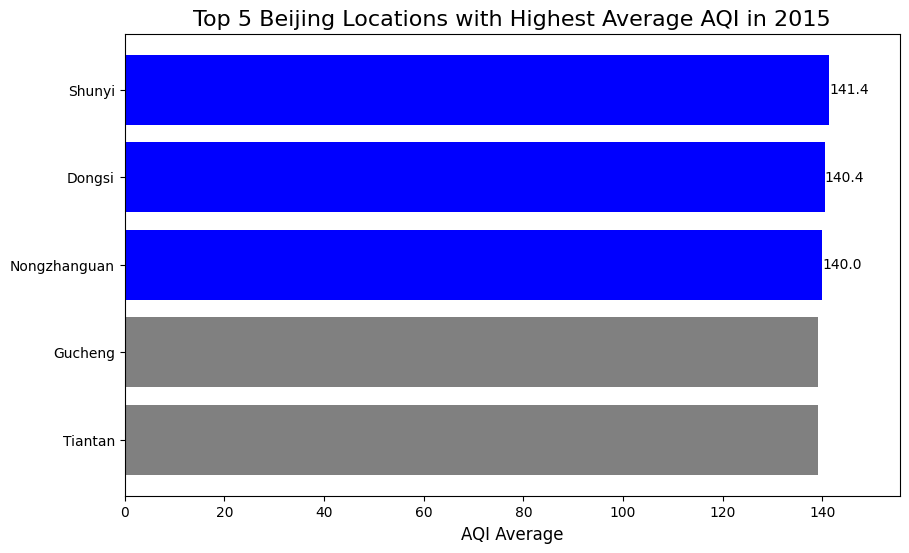

In [49]:
# Define colors: top 3 in blue, others in gray
colors = ['blue' if i >= 2 else 'gray' for i in range(5)]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(avg_pm25_aqi_df['Location'], avg_pm25_aqi_df['Average PM2.5 AQI'], color=colors)

# Add title and labels
plt.title('Top 5 Beijing Locations with Highest Average AQI in 2015', fontsize=16)
plt.xlabel('AQI Average', fontsize=12)

# Optional: Customize tick parameters
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set x-axis limit to add padding (increase upper limit by 10% for example)
plt.xlim(0, avg_pm25_aqi_df['Average PM2.5 AQI'].max() * 1.1)

# Display values on bars
for i, bar in enumerate(bars):
    if i >= 2:  # Display values for top 3 bars only
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1f}', va='center', fontsize=10)

# Show plot
plt.show()

Dari grafik tersebut, didapatkan informasi bahwa:
- 3 lokasi di Kota Beijing dengan rata-rata kualitas udara terburuk pada tahun 2015 ada pada Shunyi, Dongsi, dan Nongzhanguan.
- Shunyi merupakan lokasi di Kota Beijing dengan rata-rata kualitas udara terburuk pada tahun 2015 dengan nilai 141.4. Nilai ini masuk pada katagori 'Unhealthy for Sensitive Groups'
- 2 Nilai setelah shunyi berada pada angka 140.4 dan 140

Selanjutnya akan dilakukan geoanalysis agar lebih terlihat pada peta. Saya menggunakan library Geopandas untuk membuat visualisasi ini. Visualisasi juga dibuat beradasarkan titik latitude dan longitude dengan nilai air qualitynya agar bisa dilihat dan dibedakan. Nilai air quality sengaja tidak mulai dari 0 karena saya fokus untuk menunjukkan perbedaannya dan bukan untuk melihat dari 0. Berikut adalah implementasinya:

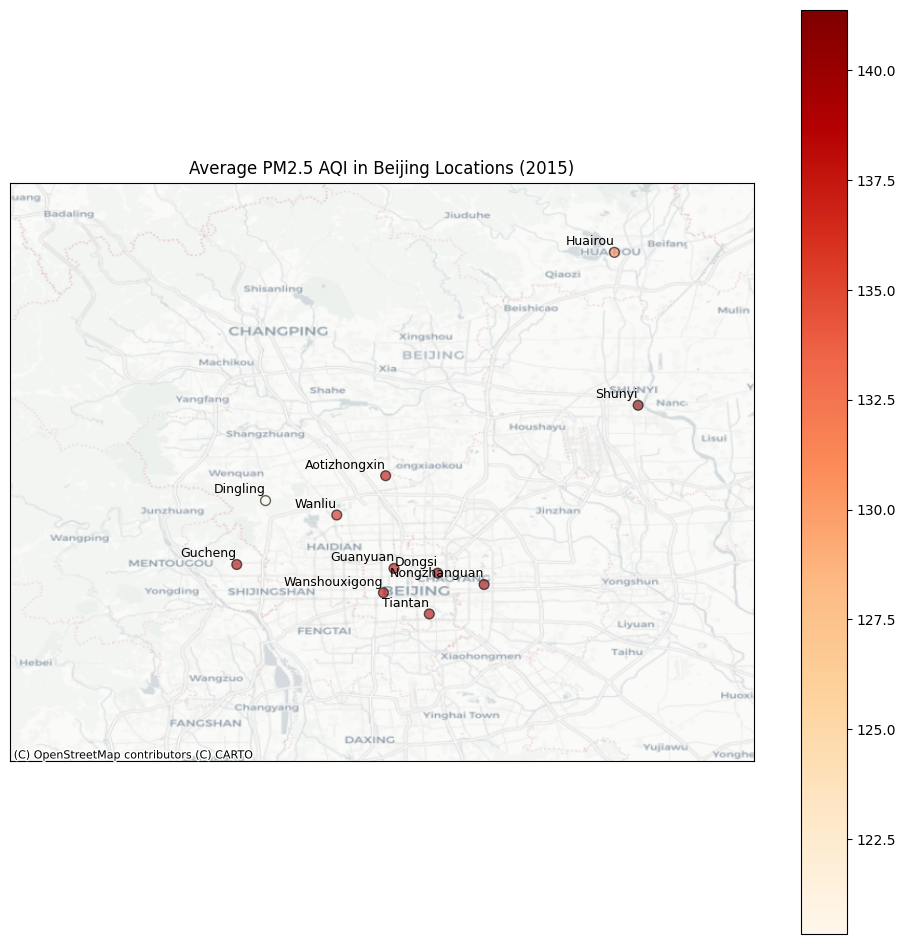

In [50]:
data = {
    'Location': ['Aotizhongxin', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng',
                 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'],
    'Latitude': [40.0455, 40.0154, 39.9276, 39.9334, 39.9381,
                 40.3157, 39.9139, 40.1307, 39.8783, 39.9980, 39.9040],
    'Longitude': [116.3544, 116.2091, 116.4173, 116.3645, 116.1743,
                  116.6311, 116.4735, 116.6598, 116.4072, 116.2953, 116.3517],
}

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(
    data, geometry=[Point(xy) for xy in zip(data['Longitude'], data['Latitude'])],
    crs="EPSG:4326"  # WGS 84
)

# Add Avg_PM2.5_AQI from the dictionary
avg_pm25_aqi = {
    'Aotizhongxin': 138.51130418032733,
    'Dingling': 120.33864616577146,
    'Dongsi': 140.44826363472154,
    'Guanyuan': 138.46879329790914,
    'Gucheng': 139.13677174454645,
    'Huairou': 131.0200885635793,
    'Nongzhanguan': 139.9759534542078,
    'Shunyi': 141.3750785245978,
    'Tiantan': 139.02574095457804,
    'Wanliu': 137.02572872265483,
    'Wanshouxigong': 138.3050734726849
}

# Map the Avg_PM2.5_AQI values to the GeoDataFrame
gdf['Avg_PM2.5_AQI'] = gdf['Location'].map(avg_pm25_aqi)

# Define color map
cmap = plt.get_cmap('OrRd')
norm = plt.Normalize(gdf['Avg_PM2.5_AQI'].min(), gdf['Avg_PM2.5_AQI'].max())

# Plot Beijing and the locations with Avg_PM2.5_AQI
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, marker='o', column='Avg_PM2.5_AQI', cmap=cmap, markersize=50, alpha=0.6, legend=False, edgecolor='k')

# Set axis limits with specific bounds
ax.set_xlim(115.9, 116.8)  # Longitude bounds
ax.set_ylim(39.7, 40.4)    # Latitude bounds

# Add labels for the locations with padding
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Location']):
    ax.text(x, y + 0.005, label, fontsize=9, ha='right', va='bottom')

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)

# Add a basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

plt.title('Average PM2.5 AQI in Beijing Locations (2015)')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.show()


Dari visualisasi ini, dapat didapatkan informasi bahwa:
- Dingling merupakan lokasi di Kota Beijing dengan rata-rata kualitas udara terbaik pada tahun 2015
- Shunyi merupakan lokasi di kota Beijing dengan rata-rata kualitas udara terburuk pada tahun 2015
- Semakin dekat lokasi dengan pusat kota, maka akan semakin buruk pula kualitas udaranya, kecuali untuk lokasi Shunyi

### Pertanyaan 2: Berapa besar perbedaan AQI PM2.5 antara lokasi dengan AQI tertinggi dengan lokasi dengan AQI terendah di kota Beijing pada tahun 2015?

Untuk menjawab pertanyaan ini, dapat menggunakan dataset walaupun terdapat outlier karena fokusnya untuk menunjukkan perbedaan walaupun mungkin saja termasuk outlier. Dimulai dengan mencari lokasi dan value untuk maksimal dan minimal. Setelah itu, saya print untuk melihatnya seperti berikut:

In [51]:
# Initialize variables to store the highest and lowest PM2.5 AQI values and their corresponding locations
max_aqi_value = float('-inf')
min_aqi_value = float('inf')
location_max_aqi = None
location_min_aqi = None

# Iterate through each dataframe in the daily_dataframes dictionary
for location, df in daily_dataframes.items():
    # Find the maximum and minimum PM2.5 AQI values in the current dataframe
    max_value = df['PM2.5 AQI'].max()
    min_value = df['PM2.5 AQI'].min()

    # Update the overall max and min if the current location's values are higher/lower
    if max_value > max_aqi_value:
        max_aqi_value = max_value
        location_max_aqi = location

    if min_value < min_aqi_value:
        min_aqi_value = min_value
        location_min_aqi = location

# Text visualization for highest and lowest PM2.5 AQI locations
print(f"The location with the highest PM2.5 AQI value is {location_max_aqi} with a value of {max_aqi_value:.2f}.")
print(f"The location with the lowest PM2.5 AQI value is {location_min_aqi} with a value of {min_aqi_value:.2f}.")

The location with the highest PM2.5 AQI value is Tiantan with a value of 499.30.
The location with the lowest PM2.5 AQI value is Nongzhanguan with a value of 15.63.


Hasilnya sudah cukup untuk dijadikan informasi, tetapi saya ingin agar lebih mudah dibaca dan tidak membosankan. Oleh karena itu, saya membuat card visualization seperti berikut:

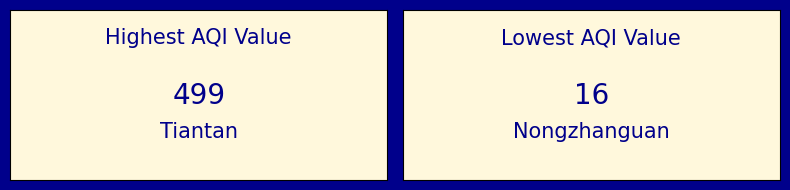

In [52]:
# Define the titles and values
plot_title_Highest_AQI_Value = 'Highest AQI Value'
plot_title_Lowest_AQI_Value = 'Lowest AQI Value'

# Create subplots with 1 row and 2 columns, sharing y-axis ticks and labels
fig, axs = plt.subplots(1, 2, figsize=(8, 2), facecolor='#00008B')

# Plot for the highest AQI value
axs[0].set_facecolor("#FFF8DC")
axs[0].text(x=0.5, y=0.8, s=plot_title_Highest_AQI_Value, fontdict={'fontsize': 15, 'color': '#00008B', 'fontfamily': 'sans-serif'}, horizontalalignment='center')
axs[0].text(x=0.5, y=0.45, s=int(max_aqi_value.round(0)), fontdict={'fontsize': 20, 'color': '#00008B', 'fontfamily': 'sans-serif'}, horizontalalignment='center')
axs[0].text(x=0.5, y=0.25, s=location_max_aqi, fontdict={'fontsize': 15, 'color': '#00008B', 'fontfamily': 'sans-serif'}, horizontalalignment='center')
axs[0].set_xticks([])
axs[0].set_yticks([])

# Plot for the lowest AQI value
axs[1].set_facecolor("#FFF8DC")
axs[1].text(x=0.5, y=0.8, s=plot_title_Lowest_AQI_Value, fontdict={'fontsize': 15, 'color': '#00008B', 'fontfamily': 'sans-serif'}, horizontalalignment='center')
axs[1].text(x=0.5, y=0.45, s=int(min_aqi_value.round(0)), fontdict={'fontsize': 20, 'color': '#00008B', 'fontfamily': 'sans-serif'}, horizontalalignment='center')
axs[1].text(x=0.5, y=0.25, s=location_min_aqi, fontdict={'fontsize': 15, 'color': '#00008B', 'fontfamily': 'sans-serif'}, horizontalalignment='center')
axs[1].set_xticks([])
axs[1].set_yticks([])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

Dari visualiasi tersebut didapatkan informasi, yaitu:
- Lokasi di Kota Beijing dengan kualitas udara terburuk pada tahun 2015 ada pada Tiantan dengan nilai 499. Nilai ini berada pada status 'Hazardous'.
- Lokasi di Kota Beijing dengan kualitas udara terbaik pada tahun 2015 ada pada Nongzhanguan dengan nilai 16. Nilai ini berada pada status 'Good'.

### Pertanyaan 3: Bulan kapan terjadi AQI PM2.5 tertinggi di kota Beijing pada tahun 2015?

Untuk menjawab pertanyaan ini, dapat menggunakan dataset walaupun terdapat outlier karena fokusnya untuk menunjukkan fluktuasi dan nilainya. Dimulai dengan mencari lokasi dan value untuk maksimal pada data. Setelah itu, saya plot/visualkan ke beberapa visual dibawah seperti berikut:

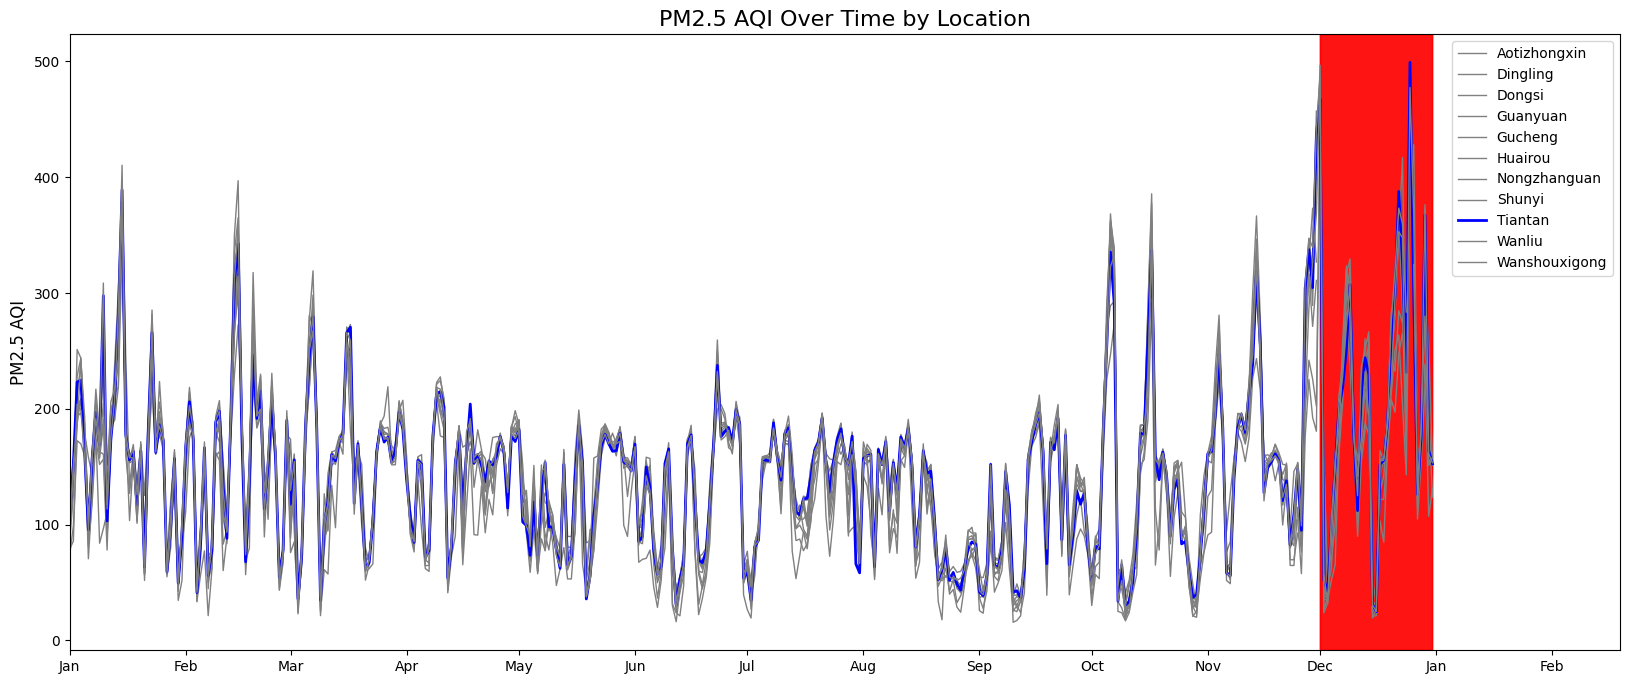

In [53]:
# Initialize the figure
plt.figure(figsize=(20, 8))

# Find the location with the highest overall AQI
max_aqi = -1
max_location = None

for location, df in daily_dataframes.items():
    # Determine the maximum AQI value and corresponding location
    max_aqi_location = df['PM2.5 AQI'].max()
    if max_aqi_location > max_aqi:
        max_aqi = max_aqi_location
        max_location = location

# Loop through each dataframe in the dictionary
for location, df in daily_dataframes.items():
    # Determine color: blue for the highest AQI location, gray for others
    color = 'blue' if location == max_location else 'gray'

    # Plot the PM2.5 AQI over time
    plt.plot(df['date'], df['PM2.5 AQI'], label=location, color=color, linewidth=2 if location == max_location else 1)

    # Find the month with the highest AQI for each location
    df['month'] = df['date'].dt.month
    monthly_avg = df.groupby('month')['PM2.5 AQI'].mean()
    highest_month = monthly_avg.idxmax()

    # Highlight the highest AQI month for each location
    highest_month_data = df[df['month'] == highest_month]
    plt.axvspan(highest_month_data['date'].min(), highest_month_data['date'].max(), color='red', alpha=0.2)

# Format x-axis with month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Extend the x-axis limit (optional: add some padding to the time range)
plt.xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2015-12-31') + pd.DateOffset(days=50))

# Add labels and title
plt.ylabel('PM2.5 AQI', fontsize=12)
plt.title('PM2.5 AQI Over Time by Location', fontsize=16)

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

Jika visualisasi diatas terlalu noisy dan membingungkan, dapat melihat visualisasi dibawah ini. Visualisasi ini menggunakan data yang telah diagregasi beradasarkan bulan agar lebih sedikit noisenya. Berikut adalah visualisasinya:

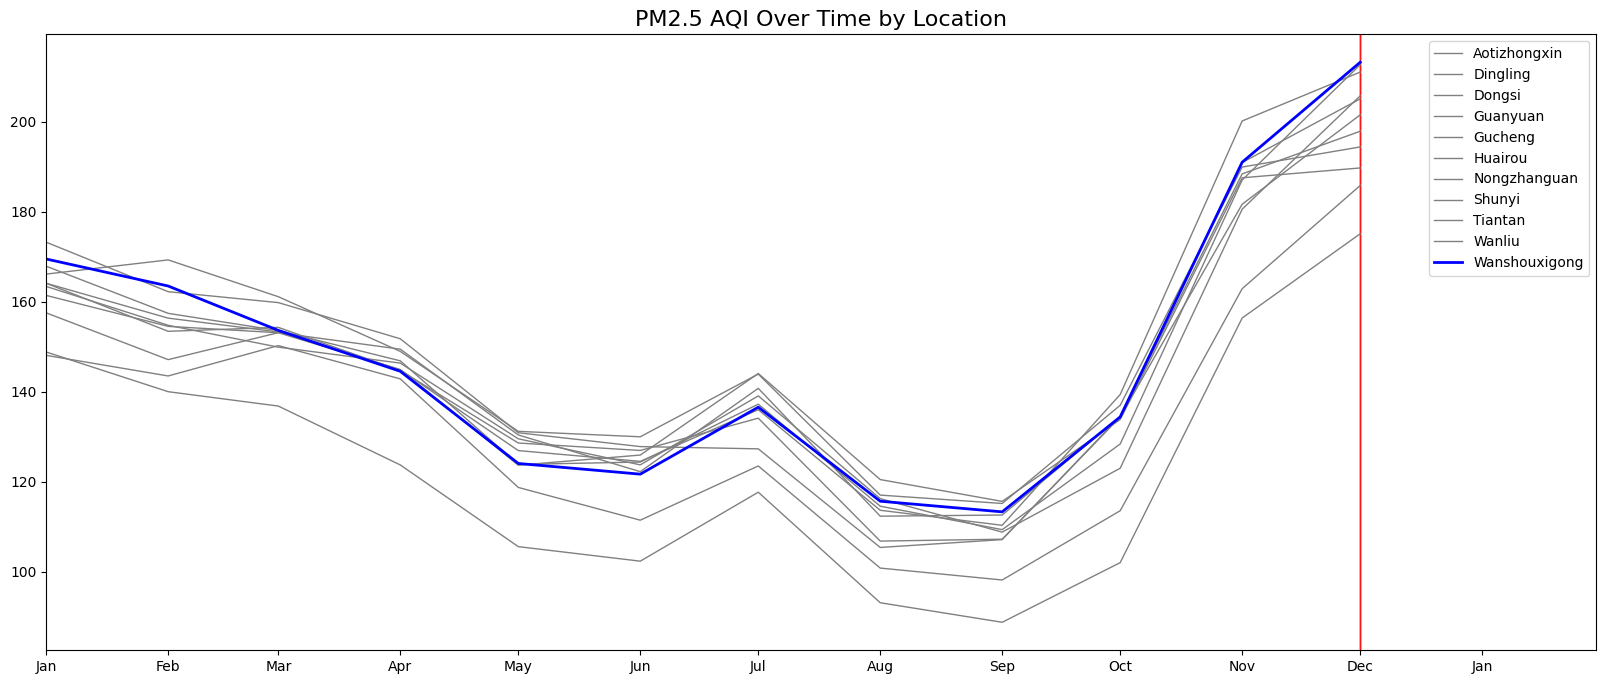

In [54]:
# Initialize the figure
plt.figure(figsize=(20, 8))

# Find the location with the highest overall AQI after monthly aggregation
max_aqi = -1
max_location = None

# Dictionary to store the monthly aggregated data
monthly_aggregated_data = {}

# Loop through each dataframe in the dictionary to aggregate by month
for location, df in daily_dataframes.items():
    # Aggregate by month (calculate monthly mean)
    df['month'] = df['date'].dt.to_period('M')
    monthly_avg = df.groupby('month')['PM2.5 AQI'].mean().reset_index()
    monthly_avg['month'] = monthly_avg['month'].dt.to_timestamp()

    # Store the aggregated data
    monthly_aggregated_data[location] = monthly_avg

    # Determine the maximum AQI value and corresponding location
    max_aqi_location = monthly_avg['PM2.5 AQI'].max()
    if max_aqi_location > max_aqi:
        max_aqi = max_aqi_location
        max_location = location

# Loop through the monthly aggregated data for plotting
for location, monthly_df in monthly_aggregated_data.items():
    # Determine color: blue for the highest AQI location, gray for others
    color = 'blue' if location == max_location else 'gray'

    # Plot the PM2.5 AQI aggregated by month
    plt.plot(monthly_df['month'], monthly_df['PM2.5 AQI'], label=location, color=color, linewidth=2 if location == max_location else 1)

    # Highlight the highest AQI month for each location
    highest_month = monthly_df.loc[monthly_df['PM2.5 AQI'].idxmax()]
    plt.axvspan(highest_month['month'], highest_month['month'] + pd.DateOffset(days=0), color='red', alpha=0.2)

# Format x-axis with month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Extend the x-axis limit (optional: add some padding to the time range)
plt.xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2015-12-31') + pd.DateOffset(days=30))

# Add labels and title
plt.title('PM2.5 AQI Over Time by Location', fontsize=16)

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

Dari Kedua visualisasi tersebut, didapatkan informasi di Kota Beijing bahwa:
- Pada tahun 2015, Bulan Desember memilki kualitas udara terburuk dengan nilai yang hampir menyentuh 500. Hal ini kemungkinan terjadi karena adanya liburan natal dan juga libur sekolah yang menyebabkan tingginya mobilitas rakyat.
- Pada tahun 2015, Bulan September memiliki kualitas udara terbaik dengan nilai dibawah 100. Hal ini belum saya dapatkan kemungkinan korelasinya, tetapi mungkin karena merupakan akhir liburan semester ganjil dan masuk ke waktu sekolah semester genap.

### Unused

In [55]:
# # Create a figure and axis
# plt.figure(figsize=(14, 8))

# # Loop through each dataframe in the dictionary
# for location, df in daily_dataframes.items():
#     # Plot the PM2.5 AQI over time
#     plt.plot(df['date'], df['PM2.5 AQI'], label=location)

#     # Find the month with the highest AQI
#     df['month'] = df['date'].dt.month
#     monthly_avg = df.groupby('month')['PM2.5 AQI'].mean()
#     highest_month = monthly_avg.idxmax()

#     # Highlight the highest AQI month
#     highest_month_data = df[df['month'] == highest_month]
#     plt.axvspan(highest_month_data['date'].min(), highest_month_data['date'].max(), color='red', alpha=0.2)

# # Add labels and title
# plt.xlabel('Date', fontsize=12)
# plt.ylabel('PM2.5 AQI', fontsize=12)
# plt.title('PM2.5 AQI Over Time by Location with Highest Month Highlighted', fontsize=16)

# # Add a legend
# plt.legend(loc='upper right')

# # Show the plot
# plt.show()

### Pertanyaan 4: Apa rata-rata status kualitas udara di Kota Beijing?

Untuk menjawab pertanyaan ini, dapat menggunakan dataset walaupun terdapat outlier karena fokusnya untuk menunjukkan jumlah status kualitas udara yang sebenarnya. Dimulai dengan menjumlahkan semua status pada dataset sebelumnya. Lalu, hasil penjumlahan tersebut saya buat visualisasi dengan horizontal bar plot karena label dari data tersebut ada yang panjang. Agar dapat memusatkan perhatian, saya hanya memberikan warna biru pada status dengan jumlah terbanyak. Berikut adalah visualisasinya:

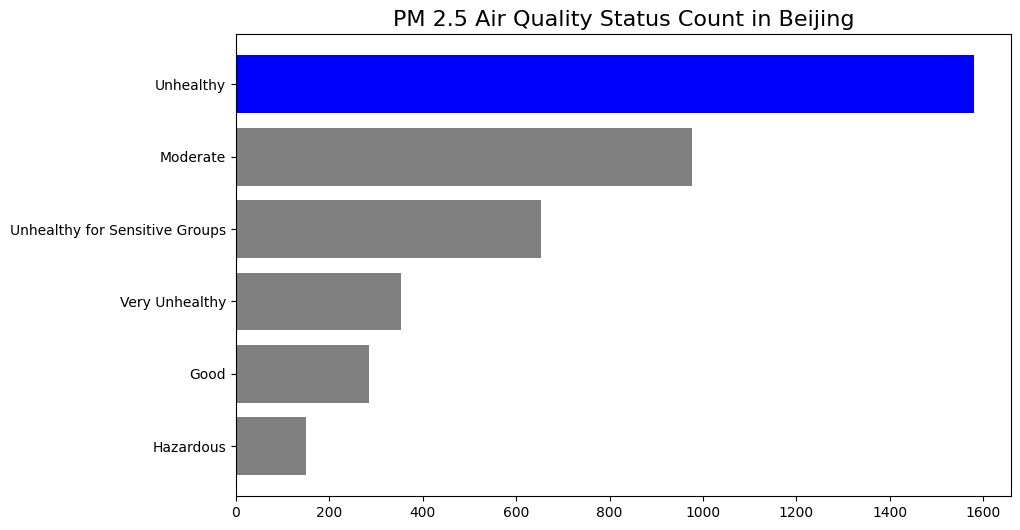

In [56]:
status_columns = ['Good', 'Hazardous', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups', 'Very Unhealthy']

# Sum across all locations for each air quality status
aggregated_values = all_status_df_pivot[status_columns].sum()

# Sort the aggregated values in ascending order
aggregated_values_sorted = aggregated_values.sort_values(ascending=True)

# Determine the color: blue for the max value, gray for others
colors = ['blue' if v == aggregated_values_sorted.max() else 'gray' for v in aggregated_values_sorted]

# Create a vertical bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(aggregated_values_sorted.index, aggregated_values_sorted.values, color=colors)

# Add a title and labels
plt.title('PM 2.5 Air Quality Status Count in Beijing', fontsize=16)

# Show the plot
plt.show()

Dari visualisasi tersebut, didapatkan informasi di Kota Beijing bahwa:

- status 'Unhealthy' atau tidak sehat merupakan status terbanyak yang ada di kota Beijing pada tahun 2015. Hal ini tidak baik secara terus menerus karena dapat berdampak buruk ke semua orang seperti penyakit pernapasan, infeksi, dll.
- status 'healthy' atau sehat berada hampir di posisi terakhir sehingga perlu dilakukan aksi agar dapat mengembalikan kota Beijing menjadi sehat kembali.
- 3 status teratas merupakan status yang kurang sehat sehingga perlu diadakan kegiatan untuk menormalisasi dan memperbaiki kualitas udara di Kota Beijing.

## Conclusion

- Conclusion Pertanyaan 1: 3 lokasi di Kota Beijing dengan rata-rata kualitas udara terburuk pada tahun 2015 ada di Shunyi, Dongsi, dan Nongzhanguan. Shunyi merupakan lokasi di Kota Beijing dengan rata-rata kualitas udara terburuk pada tahun 2015 dengan nilai 141.4. Nilai ini masuk pada katagori 'Unhealthy for Sensitive Groups'. Selain itu, 2 lokasi setelahnya memiliki nilai 140.4 dan 140. Jika dilihat berdasarkan peta, semakin dekat lokasi dengan pusat kota, maka akan semakin buruk pula kualitas udaranya, kecuali untuk lokasi Shunyi. Semua Kondisi ini perlu diubah agar dampak buruknya tidak terjadi pada populasi yang tinggal di Kota Beijing.

- Lokasi di Kota Beijing dengan kualitas udara terburuk pada tahun 2015 ada pada Tiantan dengan nilai 499 dengan status 'Hazardous' sedangkan lokasi kualitas udara terbaik ada pada Nongzhanguan dengan nilai 16 dengan status 'Good'

- Pada tahun 2015, Bulan Desember memilki kualitas udara terburuk dengan nilai yang hampir menyentuh 500. Hal ini kemungkinan terjadi karena adanya liburan natal dan juga libur sekolah yang menyebabkan tingginya mobilitas rakyat dan emisinya

- status 'Unhealthy' atau tidak sehat merupakan status terbanyak yang ada di kota Beijing pada tahun 2015. Hal ini tidak baik secara terus menerus karena dapat berdampak buruk ke semua orang seperti penyakit pernapasan, infeksi, dll.
status 'healthy' atau sehat berada hampir di posisi terakhir sehingga perlu dilakukan aksi agar dapat mengembalikan kota Beijing menjadi sehat kembali.

# Exporting & Others

In [57]:
# Create a directory named 'status_dataframes' if it doesn't exist
output_dir = 'daily_dataframes'
os.makedirs(output_dir, exist_ok=True)

# Loop through the dictionary and save each DataFrame as a CSV file
for location, df in daily_dataframes.items():
    # Construct the file path
    file_path = os.path.join(output_dir, f'{location}.csv')
    
    # Export the DataFrame to a CSV file
    df.to_csv(file_path, index=False)

    print(f"Exported {location}.csv to {output_dir}")

Exported Aotizhongxin.csv to daily_dataframes
Exported Dingling.csv to daily_dataframes
Exported Dongsi.csv to daily_dataframes
Exported Guanyuan.csv to daily_dataframes
Exported Gucheng.csv to daily_dataframes
Exported Huairou.csv to daily_dataframes
Exported Nongzhanguan.csv to daily_dataframes
Exported Shunyi.csv to daily_dataframes
Exported Tiantan.csv to daily_dataframes
Exported Wanliu.csv to daily_dataframes
Exported Wanshouxigong.csv to daily_dataframes


In [58]:
# Create a directory named 'status_dataframes' if it doesn't exist
output_dir = 'daily_dataframes_without_outlier'
os.makedirs(output_dir, exist_ok=True)

# Loop through the dictionary and save each DataFrame as a CSV file
for location, df in daily_dataframes_without_outlier.items():
    # Construct the file path
    file_path = os.path.join(output_dir, f'{location}.csv')
    
    # Export the DataFrame to a CSV file
    df.to_csv(file_path, index=False)

    print(f"Exported {location}.csv to {output_dir}")

Exported Aotizhongxin.csv to daily_dataframes_without_outlier
Exported Dingling.csv to daily_dataframes_without_outlier
Exported Dongsi.csv to daily_dataframes_without_outlier
Exported Guanyuan.csv to daily_dataframes_without_outlier
Exported Gucheng.csv to daily_dataframes_without_outlier
Exported Huairou.csv to daily_dataframes_without_outlier
Exported Nongzhanguan.csv to daily_dataframes_without_outlier
Exported Shunyi.csv to daily_dataframes_without_outlier
Exported Tiantan.csv to daily_dataframes_without_outlier
Exported Wanliu.csv to daily_dataframes_without_outlier
Exported Wanshouxigong.csv to daily_dataframes_without_outlier


In [59]:
# Create a directory named 'status_dataframes' if it doesn't exist
output_dir = 'status_dataframes'
os.makedirs(output_dir, exist_ok=True)

# Loop through the dictionary and save each DataFrame as a CSV file
for location, df in status_dataframes.items():
    # Construct the file path
    file_path = os.path.join(output_dir, f'{location}.csv')
    
    # Export the DataFrame to a CSV file
    df.to_csv(file_path, index=False)

    print(f"Exported {location}.csv to {output_dir}")

Exported Aotizhongxin.csv to status_dataframes
Exported Dingling.csv to status_dataframes
Exported Dongsi.csv to status_dataframes
Exported Guanyuan.csv to status_dataframes
Exported Gucheng.csv to status_dataframes
Exported Huairou.csv to status_dataframes
Exported Nongzhanguan.csv to status_dataframes
Exported Shunyi.csv to status_dataframes
Exported Tiantan.csv to status_dataframes
Exported Wanliu.csv to status_dataframes
Exported Wanshouxigong.csv to status_dataframes


In [60]:
all_status_df_pivot.to_csv('All_status.csv', index=False)

In [61]:
print("Pandas version: " + pd.__version__)
print("Request version: " + requests.__version__)
print("Matplotlib version: " + matplotlib.__version__)
print("Seaborn version: " + sns.__version__)
print("Geopandas version: " + gpd.__version__)
print("Shapely version: " + shapely.__version__)
print("Contextily version: " + ctx.__version__)
print("Numpy version: " + np.__version__)


Pandas version: 2.1.4
Request version: 2.32.3
Matplotlib version: 3.8.2
Seaborn version: 0.13.0
Geopandas version: 1.0.1
Shapely version: 2.0.5
Contextily version: 1.6.1
Numpy version: 1.26.2
